# Package Installation 

In [ ]:
%%capture
def inst():
        !pip install -U sentence-transformers
        !pip install sentence_transformers
        !pip install transformers
        !pip install datasets
        !pip install stop_words
        #!pip install flair 
        !pip install scipy 
        !pip install https://github.com/scikit-learn-contrib/scikit-learn-extra/archive/master.zip
        !pip install git+https://github.com/PrithivirajDamodaran/Alt-ZSC.git
        !pip install git+https://github.com/neuml/txtai
inst()

# Data Pre-Processing 

In [ ]:
#len(rttext_tag2)

In [ ]:
#map the category name with classes
type_cat={}
type_cat[0]="Society & Culture"
type_cat[1]="Science & Mathematics"
type_cat[2]="Health"
type_cat[3]="Education & Reference"
type_cat[4]="Computers & Internet"
type_cat[5]="Sports"
type_cat[6]="Business & Finance"
type_cat[7]="Entertainment & Music"
type_cat[8]="Family & Relationships"
type_cat[9]="Politics & Government"

type_cat1={}
type_cat1["Society & Culture"]=0
type_cat1["Science & Mathematics"]=1
type_cat1["Health"]=2
type_cat1["Education & Reference"]=3
type_cat1["Computers & Internet"]=4
type_cat1["Sports"]=5
type_cat1["Business & Finance"]=6
type_cat1["Entertainment & Music"]=7
type_cat1["Family & Relationships"]=8
type_cat1["Politics & Government"]=9


# Data Preprocessing to retieve the texts with the multiple labels
from datasets import load_dataset
from collections import defaultdict
import re
import random
import numpy as np
import operator
import matplotlib.pyplot as plt
#from transformers import pipeline
from pylab import rcParams
import sys 
import nltk
import re
nltk.download('punkt')
import csv
import pandas as pd
import sys
samelocation=defaultdict(list)
reuters= load_dataset('yahoo_answers_topics')

random.seed(1)

def clean(label):
    label = re.sub("([a-z])([A-Z])", "\\1 \\2", label)
    label = label.replace("_", " ")
    return label


def sample_test_data(texts,  labels, title, size):
    data = list(zip(texts, labels,title))
    data = [item for item in data if len(item[0]) > 0]
    random.shuffle(data)
    texts, labels,title = zip(*data)
    return texts[:size], labels[:size], title[:size],texts[size:], labels[size:]
reuters_train_texts,reuters_train_labels1,title, _, _ = sample_test_data(reuters['train']['best_answer'], reuters['train']['topic'],reuters['train']['question_title'],300000)
#reuters_train_texts, reuters_train_labels,labels, _ = sample_test_data(reuters['train'], reuters['train']['topics'],reuters['train']['places'], 50000)
#labels,_ = sample_test_data( reuters['train']['places'], 50000)
txt_place={}
place_tx=[]
for t in title:
    for kk in t:
        place_tx.append(kk)
same_tp=[]
reuters_train_labels=[]


for hh in reuters_train_labels1:
    reuters_train_labels.append(type_cat[hh])

sm_topic=defaultdict(list)
txt=[]

import nltk
nltk.download('wordnet')
import nltk
from stop_words import get_stop_words
from nltk.corpus import stopwords
nltk.download('stopwords')
stop_words = list(get_stop_words('en'))         #Have around 900 stopwords
nltk_words = list(stopwords.words('english'))   #Have around 150 stopwords
stop_words.extend(nltk_words)
rttext_tag={}
label_class=[]
WORDS_ev={}
sintag={}
eid_maps={}
eid_mapm={}
rid=0
rd_txt={}
txt_rd={}
#
rttext_tags={}
label_classs=[]
WORDS_evs={}
sintags={}
eid_mapss={}
eid_mapms={}
rids=0
rd_txts={}
txt_rds={}

for hh in range(len(reuters_train_labels)):
  #if len(reuters_train_labels[hh])>0 and len(reuters_train_texts[hh]['text'].split())>0:
                  zz=[reuters_train_labels[hh]]
                  #print(title[hh])
                  #sys.exit()
                  #print("text"+"\n")
                  if len(zz)>=1:#and len(zz)<=3:
                          vcc=0
                          jj=re.sub('\s+(a|an|and|the)(\s+)', '\2',reuters_train_texts[hh])
                          from nltk.tokenize import word_tokenize
                          tokens = word_tokenize(jj)
                          # convert to lower case
                          tokens = [w.lower() for w in tokens]
                          # remove punctuation from each word
                          import string
                          table = str.maketrans('', '', string.punctuation)
                          stripped = [w.translate(table) for w in tokens]
                          # remove remaining tokens that are not alphabetic
                          words = [word for word in stripped if word.isalpha()]
                          # filter out stop words
                          from nltk.corpus import stopwords
                          stop_words = set(stopwords.words('english'))
                          words = [w for w in words if not w in stop_words and len(w)>=3]
                          wrd=[]
                          sz=''
                          for k in words:
                             # if vcc<150:
                                wrd.append(k)
                                vcc=vcc+1
                          #rttext_tag[wrd]=zz[0]
                          if len(wrd)>=2:
                              WORDS_ev[rid]=wrd
                              #rid=rid+1
                              for vv in wrd:
                                if vv!='reuter':
                                    sz=sz+vv+" "
                            #print(zz,sz)
                              for kk in zz:
                                if kk not in label_class:
                                    label_class.append(kk)
                              rttext_tag[sz]=zz
                              txt_place[sz]=title[hh]
                             # samelocation[place_tx[hh]].append(sz)
                              #sm_topic[same_tp[hh]].append(rid)
                              sintag[sz]=zz[0:1]
                              eid_maps[rid]=zz[0:1]
                              eid_mapm[rid]=zz
                              rd_txt[rid]=sz
                              txt_rd[sz]=rid
                              rid=rid+1
                          #print(reuters_train_texts[hh]['text'].split())
                          #txt.append(reuters_train_texts[hh]['text'])
                          #print("\n\n")
                  elif len(zz)==1:
                                        vcc=0
                                        jj=re.sub('\s+(a|an|and|the)(\s+)', '\2',reuters_train_texts[hh]['text'])
                                        from nltk.tokenize import word_tokenize
                                        tokens = word_tokenize(jj)
                                        # convert to lower case
                                        tokens = [w.lower() for w in tokens]
                                        # remove punctuation from each word
                                        import string
                                        table = str.maketrans('', '', string.punctuation)
                                        stripped = [w.translate(table) for w in tokens]
                                        # remove remaining tokens that are not alphabetic
                                        words = [word for word in stripped if word.isalpha()]
                                        # filter out stop words
                                        from nltk.corpus import stopwords
                                        stop_words = set(stopwords.words('english'))
                                        words = [w for w in words if not w in stop_words and len(w)>=4]
                                        wrd=[]
                                        sz=''
                                        for k in words:
                                            if vcc<150:
                                                wrd.append(k)
                                                vcc=vcc+1
                                        #rttext_tag[wrd]=zz[0]
                                        if len(wrd)>=5:
                                            WORDS_evs[rid]=wrd
                                            #rid=rid+1
                                            for vv in wrd:
                                                if vv!='reuter':
                                                    sz=sz+vv+" "
                                            #print(zz,sz)
                                            for kk in zz:
                                                if kk not in label_classs:
                                                    label_classs.append(kk)
                                            rttext_tags[sz]=zz
                                            sintags[sz]=zz#[0:1]
                                            eid_mapss[rid]=zz#[0:1]
                                            eid_mapms[rid]=zz
                                            rd_txts[rid]=sz
                                            txt_rds[sz]=rid
                                            rids=rids+1





#for tt in txt_place:
    #pass#print
rttext_tag2=rttext_tag
#rttext_tagh1=rttext_tag

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


Generating train split:   0%|          | 0/1400000 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/60000 [00:00<?, ? examples/s]

Dataset yahoo_answers_topics downloaded and prepared to /root/.cache/huggingface/datasets/yahoo_answers_topics/yahoo_answers_topics/1.0.0/0edb353eefe79d9245d7bd7cac5ae6af19530439da520d6dde1c206ee38f4439. Subsequent calls will reuse this data.


  0%|          | 0/2 [00:00<?, ?it/s]

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
# Balanced Data for Clustering
rttext_tag3={}
for tt in rttext_tag2:
     if type_cat1[rttext_tag2[tt][0]]==0:
         cc=0
         if cc<1000: 
            if len(rttext_tag3)<10000:
                rttext_tag3[tt]=rttext_tag2[tt]
                cc=cc+1
     elif type_cat1[rttext_tag2[tt][0]]==1:
         cc=0
         if cc<1000: 
             if len(rttext_tag3)<10000:
                rttext_tag3[tt]=rttext_tag2[tt]
                cc=cc+1
     elif type_cat1[rttext_tag2[tt][0]]==2:
         cc=0
         if cc<1000:
           if len(rttext_tag3)<10000:
             rttext_tag3[tt]=rttext_tag2[tt]
             cc=cc+1
     elif type_cat1[rttext_tag2[tt][0]]==3:
         cc=0
         if cc<1000:
            if len(rttext_tag3)<10000:
                rttext_tag3[tt]=rttext_tag2[tt]
                cc=cc+1
     elif type_cat1[rttext_tag2[tt][0]]==4:
         cc=0
         if cc<1000:# and len(rttext_tag3)<10000:
             if len(rttext_tag3)<10000:
                rttext_tag3[tt]=rttext_tag2[tt]
                cc=cc+1
     elif type_cat1[rttext_tag2[tt][0]]==5:
         cc=0
         if cc<1000:# and len(rttext_tag3)<10000:
            if len(rttext_tag3)<10000:
                rttext_tag3[tt]=rttext_tag2[tt]
                cc=cc+1
     elif type_cat1[rttext_tag2[tt][0]]==6:
         cc=0
         if cc<1000:# and len(rttext_tag3)<10000:
             if len(rttext_tag3)<10000:
                rttext_tag3[tt]=rttext_tag2[tt]
                cc=cc+1
     elif type_cat1[rttext_tag2[tt][0]]==7:
         cc=0
         if cc<1000:#and len(rttext_tag3)<10000:
             if len(rttext_tag3)<10000:
                rttext_tag3[tt]=rttext_tag2[tt]
                cc=cc+1
     elif type_cat1[rttext_tag2[tt][0]]==8:
         cc=0
         if cc<1000:# and len(rttext_tag3)<10000:
             if len(rttext_tag3)<10000:
                rttext_tag3[tt]=rttext_tag2[tt]
                cc=cc+1
     elif type_cat1[rttext_tag2[tt][0]]==9:
         cc=0
         if cc<1000:#and len(rttext_tag3)<10000:
             if len(rttext_tag3)<10000:
                rttext_tag3[tt]=rttext_tag2[tt]
                cc=cc+1


10000

In [ ]:
# Unique Tag list Filtering: Here we get the list of the unique classes
tagu=[]
tagu1=[]
stt=[]
sent=[]
relation_sent=[]
for  sz in rttext_tag2:
           s=''
           gh=[]
           for vb in rttext_tag2[sz]:
               #if vb not in stt:
                  # s=str(vb)+" "+sz
                   #if vb not in tagu1:
                       #gh.append(vb)
                       #tagu1.append(vb)
                   #gh.append(sz)
                   s=s+str(vb)+" "+str(sz)+" "
                   relation_sent.append(s)
                   if vb not in gh:
                        gh.append(vb)
                   if vb not in stt:
                        stt.append(vb)
                   vb1=sz.split()
                   for zx in vb1:
                        if zx not in gh:
                            gh.append(zx)
                   sent.append(gh)
                   
ds=set(stt)
for kk in ds:
    tagu.append(kk)
print(len(tagu))
for tt in tagu:
    pass

10


# Random Approach where we choose 100 texts randomly

276192 10


No model was supplied, defaulted to facebook/bart-large-mnli (https://huggingface.co/facebook/bart-large-mnli)


100 10
Number of texts where the position of the original labels preserved after prediction
37
Percentage of texts where the position of the original labels preserved after prediction
0.37
Number of non-original labels have higher prediction acores than original labels after prediction
57
Top_1 Prediction Score: 
0.37
Top_2 Prediction Score: 
0.46
Top_3 Prediction Score: 
0.57





No model was supplied, defaulted to facebook/bart-large-mnli (https://huggingface.co/facebook/bart-large-mnli)


100 10
Number of texts where the position of the original labels preserved after prediction
52
Percentage of texts where the position of the original labels preserved after prediction
0.52
Number of non-original labels have higher prediction acores than original labels after prediction
41
Top_1 Prediction Score: 
0.52
Top_2 Prediction Score: 
0.62
Top_3 Prediction Score: 
0.71





No model was supplied, defaulted to facebook/bart-large-mnli (https://huggingface.co/facebook/bart-large-mnli)


100 10
Number of texts where the position of the original labels preserved after prediction
46
Percentage of texts where the position of the original labels preserved after prediction
0.46
Number of non-original labels have higher prediction acores than original labels after prediction
43
Top_1 Prediction Score: 
0.46
Top_2 Prediction Score: 
0.58
Top_3 Prediction Score: 
0.62





No model was supplied, defaulted to facebook/bart-large-mnli (https://huggingface.co/facebook/bart-large-mnli)


100 10
Number of texts where the position of the original labels preserved after prediction
51
Percentage of texts where the position of the original labels preserved after prediction
0.51
Number of non-original labels have higher prediction acores than original labels after prediction
43
Top_1 Prediction Score: 
0.51
Top_2 Prediction Score: 
0.6
Top_3 Prediction Score: 
0.68


No model was supplied, defaulted to facebook/bart-large-mnli (https://huggingface.co/facebook/bart-large-mnli)





100 10
Number of texts where the position of the original labels preserved after prediction
27
Percentage of texts where the position of the original labels preserved after prediction
0.27
Number of non-original labels have higher prediction acores than original labels after prediction
63
Top_1 Prediction Score: 
0.27
Top_2 Prediction Score: 
0.41
Top_3 Prediction Score: 
0.55





No model was supplied, defaulted to facebook/bart-large-mnli (https://huggingface.co/facebook/bart-large-mnli)


100 10
Number of texts where the position of the original labels preserved after prediction
44
Percentage of texts where the position of the original labels preserved after prediction
0.44
Number of non-original labels have higher prediction acores than original labels after prediction
49
Top_1 Prediction Score: 
0.44
Top_2 Prediction Score: 
0.58
Top_3 Prediction Score: 
0.67





No model was supplied, defaulted to facebook/bart-large-mnli (https://huggingface.co/facebook/bart-large-mnli)


100 10
Number of texts where the position of the original labels preserved after prediction
40
Percentage of texts where the position of the original labels preserved after prediction
0.4
Number of non-original labels have higher prediction acores than original labels after prediction
49
Top_1 Prediction Score: 
0.4
Top_2 Prediction Score: 
0.56
Top_3 Prediction Score: 
0.64





No model was supplied, defaulted to facebook/bart-large-mnli (https://huggingface.co/facebook/bart-large-mnli)


100 10
Number of texts where the position of the original labels preserved after prediction
36
Percentage of texts where the position of the original labels preserved after prediction
0.36
Number of non-original labels have higher prediction acores than original labels after prediction
55
Top_1 Prediction Score: 
0.36
Top_2 Prediction Score: 
0.5
Top_3 Prediction Score: 
0.6





No model was supplied, defaulted to facebook/bart-large-mnli (https://huggingface.co/facebook/bart-large-mnli)


100 10
Number of texts where the position of the original labels preserved after prediction
39
Percentage of texts where the position of the original labels preserved after prediction
0.39
Number of non-original labels have higher prediction acores than original labels after prediction
50
Top_1 Prediction Score: 
0.39
Top_2 Prediction Score: 
0.53
Top_3 Prediction Score: 
0.63





No model was supplied, defaulted to facebook/bart-large-mnli (https://huggingface.co/facebook/bart-large-mnli)


100 10
Number of texts where the position of the original labels preserved after prediction
38
Percentage of texts where the position of the original labels preserved after prediction
0.38
Number of non-original labels have higher prediction acores than original labels after prediction
55
Top_1 Prediction Score: 
0.38
Top_2 Prediction Score: 
0.49
Top_3 Prediction Score: 
0.65



[0.37, 0.52, 0.46, 0.51, 0.27, 0.44, 0.4, 0.36, 0.39, 0.38]
[0.46, 0.62, 0.58, 0.6, 0.41, 0.58, 0.56, 0.5, 0.53, 0.49]
[0.57, 0.71, 0.62, 0.68, 0.55, 0.67, 0.64, 0.6, 0.63, 0.65]
10


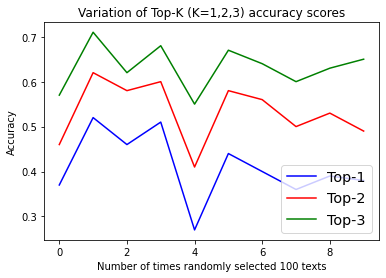

[0.10607535640398662, 0.3935402532418569, 0.008117816100517908, 0.00043537834426388144, 0.10200087477763493, 0.260124109685421, 0.5812001625696818, 0.049711658308903374, 0.6271716256936392, 0.6281394759813944, 0.6554155548413595, 0.07633327941099803, 0.5467841525872549, 0.8196398417154948, 0.08066773973405361, 0.39615246653556824, 0.3593783477942149, 0.3638634979724884, 0.002266454859636724, 0.00026442365682063, 0.32604379455248517, 0.0039545340308298664, 0.1322131579120954, 0.15513209501902261, 0.316038586878373, 0.07985867063204448, 0.49778438607851666, 0.18955220406254134, 0.0022320428203480938, 0.408075491587321, 0.009657096583396196, 0.07072173555692036, 0.6266942620277405, 0.5740901430447897, 0.2851966967185338, 0.04525628685951233, 0.33533162375291187, 0.38008665045102435, 0.17900308718283972, 0.48939113815625507, 0.6091446677843729, 0.262752225001653, 0.012195675323406855, 0.7154343922932943, 0.21763917803764343, 0.4230177005132039, 0.2858319977919261, 0.6290197273095449, 0.492

<Figure size 432x288 with 0 Axes>

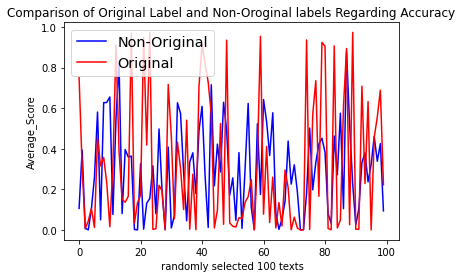

[0.5232308109601339, 0.34446582198143005, 0.26082492371400195, 0.3230447669823964, 0.4388645589351654, 0.35130633413791656, 0.7255704005559286, 0.1353060652812322, 0.23497052987416586, 0.5253523190816244, 0.002394111865820984, 0.010877518759419521, 0.3705149292945862, 0.28499929265429574, 0.020582428202033043, 0.02304360703177129, 0.5600850582122803, 0.41225549415685236, 0.1181415319442749, 0.23708149790763855, 0.3042297977954149, 0.009650848204425225, 0.1953582800924778, 0.629955013593038, 0.32131534814834595, 0.5608654220898946, 0.3534853756427765, 0.2437052478392919, 0.525365968545278, 0.13624273240566254, 0.15981392065684, 0.3844209909439087, 0.009720162954181433, 0.8503445188204447, 0.14764412492513657, 0.6586755414803823, 0.20063567658265433, 0.2840338150660197, 0.21849855470160642, 0.3715449968973796, 0.4343695044517517, 0.4619173804918925, 0.21485945582389832, 0.549006054798762, 0.24887355665365854, 0.16544102629025778, 0.3089751998583476, 0.1318529893954595, 0.0880421915402015

<Figure size 432x288 with 0 Axes>

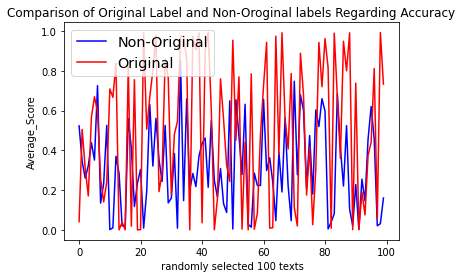

[0.21491020917892456, 0.38946402072906494, 0.44452662269274396, 0.37992316484451294, 0.007512751268222928, 0.11786925699561834, 0.07246450272699197, 0.11524473611886303, 0.23028473556041718, 0.11055991053581238, 0.49605123202006024, 0.243117179411153, 0.5377172629038492, 0.3653033673763275, 0.5045728931824366, 0.1367266612748305, 0.8763640920321146, 0.012622965538563827, 0.11496083810925484, 0.445539911588033, 0.22809302310148874, 0.013490105979144573, 0.10814340164264043, 0.22137570629517236, 0.341701219479243, 0.016261936553443473, 0.4183301329612732, 0.6452850103378296, 0.3812853544950485, 0.24731979767481485, 0.4503905574480693, 0.0003155793043940018, 0.2472795695066452, 0.510092576344808, 0.4182273745536804, 0.09179491301377614, 0.19648592919111252, 0.3011133074760437, 0.001424918242264539, 0.055397448518003024, 0.007269236259162426, 0.4728938142458598, 0.16486858576536179, 0.032318319814900555, 0.10415183007717133, 0.2386182894309362, 0.7846844792366028, 0.15259367848436037, 0.35

<Figure size 432x288 with 0 Axes>

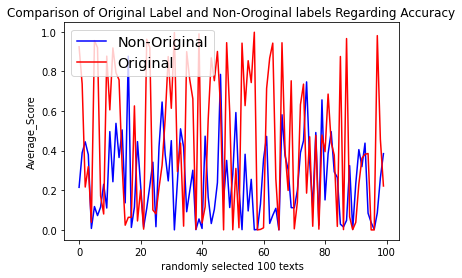

[0.5534394482771555, 0.9555529753367106, 0.17850988071101406, 0.39041923483212787, 0.10561551029483478, 0.2930018405119578, 0.02425987017340958, 0.40587979555130005, 0.10499125346541405, 0.2893048822879791, 0.42678335557381314, 0.5933816234270731, 0.05564315430819988, 0.2547432730595271, 0.3819146653016408, 0.5681957602500916, 0.1815717079055806, 0.08381676922241847, 0.5409178038438162, 0.4010866582393646, 0.23128126561641693, 0.0026275579972813525, 0.36000364025433856, 0.18678383777538934, 0.10626078397035599, 0.0891345739364624, 0.6551523804664612, 0.428136666615804, 0.2507710140198469, 0.0004526266420725733, 0.0003341714133663724, 0.08578888451059659, 0.08289599418640137, 0.049615965535243355, 0.012257977544019619, 0.15516228725512823, 0.4865422149499257, 0.25122477610905963, 0.6402968739469846, 0.866617222627004, 0.5738437076409658, 0.03493375703692436, 0.43585139513015747, 0.3661067684491475, 0.14446643988291422, 0.16055272271235785, 0.3390673100948334, 0.07745962341626485, 0.3020

<Figure size 432x288 with 0 Axes>

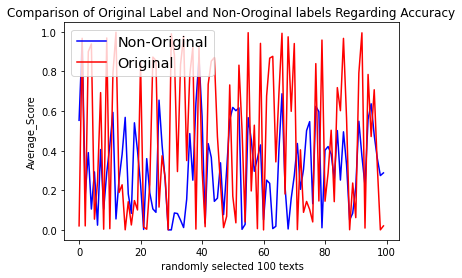

[0.6940156022707621, 0.2695272316535314, 0.09466926877697308, 0.5635118186473846, 0.490334411462148, 0.3861009230216344, 0.028001884774615366, 0.3650996685028076, 0.5799245138963064, 0.540646473566691, 0.09891172032803297, 0.05358820160230001, 0.05247331162293752, 0.14225087811549506, 0.044786481807629265, 0.06749831601822127, 0.3196859061717987, 0.2728527958194415, 0.10431114460031192, 0.48066556453704834, 0.761883000532786, 0.4162885695695877, 0.5548503597577413, 0.26881276071071625, 0.3667917350927989, 0.6309388081232706, 0.03260184762378534, 0.33794543193653226, 0.35031984746456146, 0.17661896844704947, 0.6418584585189819, 0.4083973566691081, 0.4176851660013199, 0.546203205982844, 0.26757435019438464, 0.5802794794241587, 0.3547962158918381, 0.17177343865235647, 0.5766816586256027, 0.44579161206881207, 0.22982156525055566, 0.35341063141822815, 0.5028251310189565, 0.3228435218334198, 0.37666462051371735, 0.0733435358852148, 0.20537788172562918, 0.1342428450783094, 0.15694850186506906

<Figure size 432x288 with 0 Axes>

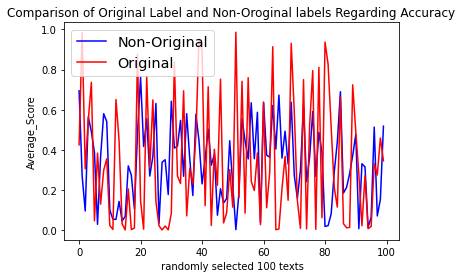

[0.2771872381369273, 0.1262611597776413, 0.03807268384844065, 0.2384059876203537, 0.018358514391972374, 0.2611232893541455, 0.6033137639363607, 0.3189133207003276, 0.24943895637989044, 0.0890370359023412, 0.17441822898884615, 0.00477157230488956, 0.1749256650606791, 0.005680332193151116, 0.016490510635776445, 0.4181893865267436, 0.4198341816663742, 0.2392451266447703, 0.17643028994401297, 0.18037247440467277, 0.32138266166051227, 0.018103449294964474, 0.08909456649174292, 0.45468781888484955, 0.4235569437344869, 0.3211986894408862, 0.6772242784500122, 0.030154069264729817, 0.041199663653969765, 0.5211171309153239, 0.7700193723042806, 0.5225623746713003, 0.22417190174261728, 0.6846906344095866, 0.7808260718981425, 0.16122287511825562, 0.5379173755645752, 0.017913085408508778, 0.36936352650324505, 0.0795930406699578, 0.19645636280377707, 0.11545343324542046, 0.31593817472457886, 0.27258318247428787, 0.4304416278998057, 0.04363944738482436, 0.19773570696512857, 0.3659097154935201, 0.29545

<Figure size 432x288 with 0 Axes>

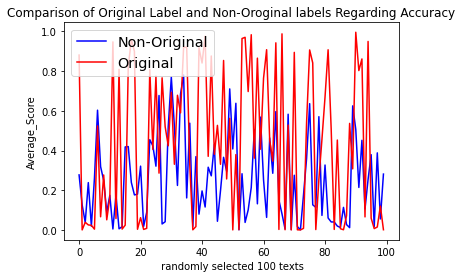

[0.2047637291252613, 0.5693854292233785, 0.08597832048932712, 0.6697934667269388, 0.4450024167696635, 0.30994366109371185, 0.41747896869977313, 0.0004224067379254848, 0.08594031135241191, 0.1703260267774264, 0.13809949780503908, 0.005772267099625121, 0.14105952344834805, 0.0003064521636891489, 0.19666171073913574, 0.2206012705961863, 0.45424821724494296, 0.09261306002736092, 0.14586996287107468, 0.15855018297831217, 0.005835720881198843, 0.023916341209163267, 0.003561704943422228, 0.6611959338188171, 0.1675617347160975, 0.12093710030118625, 0.3378339260816574, 0.28771508981784183, 0.7921633919080099, 0.3863981266816457, 0.189492949595054, 0.6004995405673981, 0.5696494281291962, 0.474193274974823, 0.24432512124379477, 0.0005857283346510181, 0.23949276407559714, 0.3264581883947055, 0.1025045985976855, 0.22927941381931305, 0.11136106277505557, 0.503575990597407, 0.5181428045034409, 0.00025040122272912413, 0.16842241088549295, 0.46373283366362256, 0.026193298089007538, 0.33275532722473145,

<Figure size 432x288 with 0 Axes>

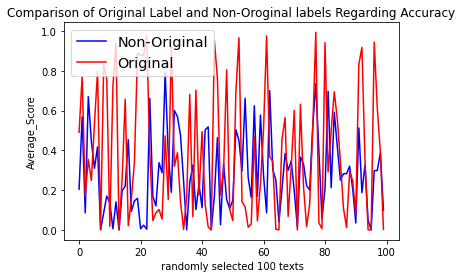

[0.43201545129219693, 0.004373356467112899, 0.4487716058890025, 0.37623830636342365, 0.14753713086247444, 0.05724886556466421, 0.639106551806132, 0.36187055706977844, 0.00021640806032034257, 0.09777974337339401, 0.3746806929508845, 0.5547857284545898, 0.19550993790229163, 0.5299082398414612, 0.41816290964682895, 0.5311692158381144, 0.6426942944526672, 0.3516504839062691, 0.1809264545639356, 0.1064302884042263, 0.33672022819519043, 0.43249718348185223, 0.1963923176129659, 0.24660074214140573, 0.17105720968296131, 0.37056564291318256, 0.6044700940450033, 0.43316258986790973, 0.3214009539806284, 0.16822662701209387, 0.27329621215661365, 0.17266278713941574, 0.10283828775087993, 0.39811404546101886, 0.06340077271064122, 0.05401134801407655, 0.00519019706795613, 0.3110350047548612, 0.31460049251715344, 0.3300688664118449, 0.6036860942840576, 0.7566782633463541, 0.09685833503802617, 0.4841514527797699, 0.2962253491083781, 0.31228042642275494, 0.013647049975891909, 0.2028890624642372, 0.43106

<Figure size 432x288 with 0 Axes>

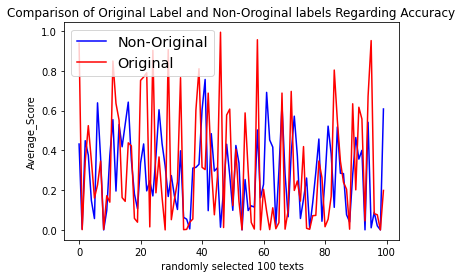

[0.051592553655306496, 0.03246609137083093, 0.5982803801695505, 0.28039660056432086, 0.0011026961728930473, 0.3647433618704478, 0.2998692529896895, 0.20820205410321554, 0.43675267696380615, 0.37281832098960876, 0.9066237608591715, 0.1551229109366735, 0.6285731395085653, 0.023927593254484236, 0.00824856370066603, 0.08907370766003926, 0.030690028332173824, 0.007117862037072579, 0.3350558091575901, 0.0001885653230904912, 0.3140658140182495, 0.4839714268843333, 0.4087086220582326, 0.2212787022193273, 0.17185199509064356, 0.39765224357446033, 0.00023603329221562794, 0.35555120309193927, 0.1339475984374682, 0.022849006733546656, 0.41273027658462524, 0.28606924414634705, 0.18282453964153925, 0.30751751114924747, 0.04765511552492777, 0.11069897313912709, 0.44656622409820557, 0.4070339898268382, 0.3507527510325114, 0.19294845312833786, 0.53415114680926, 0.07396610577901204, 0.04583406075835228, 0.3125474378466606, 0.5202743113040924, 0.4050759623448054, 0.03746242852260669, 0.04763665795326233,

<Figure size 432x288 with 0 Axes>

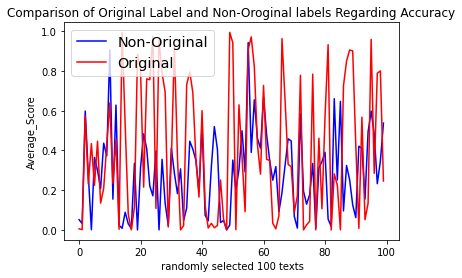

[0.09502579209705193, 0.011244770605117083, 0.312615305185318, 0.38523199657599133, 0.49312793215115863, 0.37622638543446857, 0.2762032945950826, 0.03372673193613688, 0.30000197887420654, 0.21690315504868826, 0.21211479355891547, 0.45272037386894226, 0.24583167831103006, 0.5696725348631541, 0.3139747033516566, 0.7496606111526489, 0.6080857515335083, 0.13843875067929426, 0.36560964584350586, 0.7597350279490153, 0.43989335497220355, 0.5086308916409811, 0.23975909252961478, 0.09177846740931273, 0.038180462550371885, 0.3367116451263428, 0.05519076933463415, 0.42531860371430713, 0.7816636562347412, 0.23715258141358694, 0.01353352959267795, 0.1608648163576921, 0.026678312259415787, 0.4242668555428584, 0.01823320301870505, 0.66242516040802, 0.2532830437024434, 0.020028708968311548, 0.341044157743454, 0.5679617325464884, 0.12034614756703377, 0.10770701865355174, 0.0009552819828968495, 0.1815474033355713, 0.06127764595051607, 0.011054778005927801, 0.02938998645792405, 0.3281089166800181, 0.2569

<Figure size 432x288 with 0 Axes>

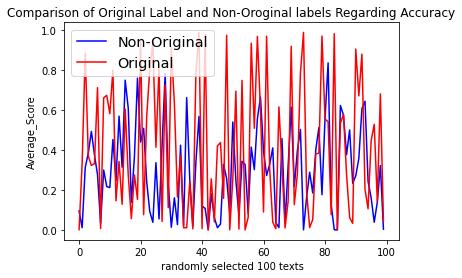

<Figure size 432x288 with 0 Axes>

In [ ]:
#
# Assigning original tags and texts
rttext_tagh1=rttext_tag2
truhh=tagu
print(len(rttext_tagh1),len(truhh))
#RANDOM SELECTION of 100 texts
def tagcls_only():  
                    rttext_tagh={}
                    mptxt={}
                    rttag={}
                    allid=[]
                    truhh=[]
                    vbb=[]
                    for kk in rttext_tagh1:
                        if txt_rd[str(kk)] not in allid:
                            allid.append(txt_rd[str(kk)])

                    vz=0
                    for jj in range(0,115):
                        bb=random.choice(allid)
                        if (bb):
                            vz=vz+1
                            if  len(rttext_tagh)<100:
                                rttext_tagh[rd_txt[bb]]=rttext_tagh1[rd_txt[bb]]

             
                    for tt in rttext_tagh:
                        for kkk in rttext_tagh[tt]:
                            if kkk not in  vbb:
                                vbb.append(kkk)

                    ss=set(vbb)
                    #truhh=[]
                    #rttext_tagh={}

                    for vv in ss:
                        truhh.append( vv)

                    print(len(rttext_tagh),len(truhh))
                    
                    #Accuracy Computation

                    #multi tag

                    from transformers import AutoModelForSequenceClassification, AutoTokenizer
                    import numpy as np
                    import operator
                    import matplotlib.pyplot as plt
                    from transformers import pipeline
                    from pylab import rcParams
                    import sys 
                    import nltk
                    import re
                    import operator
                    #from AltZSC import ZeroShotTextClassification

                    #zstc = ZeroShotTextClassification()
                    #from transformers_interpret import ZeroShotClassificationExplainer
                    zero_shot_classifier = pipeline("zero-shot-classification")#,model='facebook/bart-large-mnli')#,model='roberta-large-mnli')#model='facebook/bart-large-mnli')#,model='Recognai/zeroshot_selectra_medium')#,model='facebook/bart-large-mnli')
                    #tokenizer = AutoTokenizer.from_pretrained("Recognai/zeroshot_selectra_medium")#("facebook/bart-base-mnli")#("Recognai/zeroshot_selectra_medium")
                    #model = AutoModelForSequenceClassification.from_pretrained("Recognai/zeroshot_selectra_medium")#("facebook/bart-base-mnli")#("Recognai/zeroshot_selectra_medium")
                    #zero_shot_explainer = ZeroShotClassificationExplainer(model, tokenizer)
                    # creating embedding of the relational texts
                    from sentence_transformers import SentenceTransformer
                    from sklearn.cluster import KMeans
                    import sys
                    from sentence_transformers import SentenceTransformer
                    from sklearn.cluster import AgglomerativeClustering
                    import numpy as np
                    from sentence_transformers import SentenceTransformer
                    from sklearn.cluster import KMeans
                    from sentence_transformers import SentenceTransformer
                    from sklearn.cluster import AgglomerativeClustering
                    import numpy as np
                    import operator
                    from sklearn.metrics.pairwise import cosine_similarity,cosine_distances
                    import sys
                    from scipy import spatial
                    from sklearn_extra.cluster import KMedoids
                    import numpy as np
                    from sklearn.feature_extraction.text import TfidfVectorizer
                    from sklearn.metrics.pairwise import cosine_similarity,cosine_distances

                    cn=0
                    txt_lbp={}
                    ocl_di={}
                    pred_l={}
                    ocl_dia={}
                    pred_lnk={}
                    ocl_dnk={}
                    pred_tk={}
                    ocl_tk={}
                    all_txt_label_score={}
                    all_txt_label_rank={}
                    def get_relational_embedding(s):
                            corpus=[]
                            s1=''
                            for kk in samelocation:
                                cc=0
                                #for kj in samelocation[kk]:
                                if s in samelocation[kk]: 
                                    for kj in samelocation[kk]:
                                        corpus.append(kj)
                                        s1=s1+kj+" "
                                    # cc=cc+1
                            embedder = SentenceTransformer('all-MiniLM-L12-v2')
                            corpus_embeddings = embedder.encode(corpus)
                            return corpus_embeddings,corpus,s1

                    # Zero-shot Classification
                    #from AltZSC import ZeroShotTextClassification

                    #zstc = ZeroShotTextClassification()
                    def review_explain(text):
                           # corpus_embeddings,corpus,s1=get_relational_embedding(text)
                            #zero_shot_classifier = pipeline("zero-shot-classification")#.preprocess(corpus)#.transform(corpus)#.save_pretrained(corpus_embeddings)#,corpus_embeddings)
                        
                            result = zero_shot_classifier(sequences =text,candidate_labels =truhh,multi_label=True)
                            #zero_shot_classifier(sequences =t,candidate_labels =truhh,multi_label=False)
                            #preds = zstc(text=text,candidate_labels=truhh, multi_label=True,)
                            return result['labels'],result['scores']
                            #return list(preds['labels']),list(preds['scores'])

                    
                    for tt in rttext_tagh:
                       # import sys
                        #print(len(rttext_tagh[tt]))
                        #sys.exit()
                        mpd={}
                        nlb=[]
                        mpd_nk={}
                        mpd_tk={}
                        nlb_tk=[]
                        nlb_nk=[]
                        rn={}
                        rsc={}
                        try:
                            clas,score= review_explain(tt)
                        except:
                            continue
                    
                        for bb in range(0,len(clas)):
                            rsc[clas[bb]]=score[bb]
                        for bb in range(0,len(clas)):
                            rn[clas[bb]]=bb+1
                        all_txt_label_score[tt]=rsc
                        all_txt_label_rank[tt]=rn
                        for k1 in rttext_tagh[tt]:
                                for t3 in range(0,len(clas)):
                                    if str(clas[t3])==str(k1):
                                        mpd[k1]=score[t3]
                        for k1 in rttext_tagh[tt]:
                                for t3 in range(0,len(clas)):
                                    if str(clas[t3])!=str(k1):
                                        if score[t3]>0.5:
                                            mpd_nk[k1]=score[t3]
                        for k1 in rttext_tagh[tt]:
                                for t3 in range(0,len(clas)):
                                    if str(clas[t3])==str(k1):
                                        if score[t3]>0.5:
                                            mpd_tk[k1]=score[t3]
                        
                        dd=sorted(mpd.items(), key=operator.itemgetter(1),reverse=True)
                        dd1=sorted(mpd_nk.items(), key=operator.itemgetter(1),reverse=True)
                        dd2=sorted(mpd_tk.items(), key=operator.itemgetter(1),reverse=True)
                        
                        for zz in dd:
                            nlb.append(zz[0])
                        for zz1 in dd1:
                            nlb_nk.append(zz1[0])
                        for zz2 in dd2:
                            nlb_tk.append(zz2[0])
                        
                        pred_lnk[tt]=nlb_nk #ranked list of the non-original labels has pribability greater than 50%
                        pred_tk[tt]=nlb_tk#ranked list of the original labels has pribability greater than and equal 90% and appear in top N labels
                        ocl_di[tt]=nlb[0:1]#single label with the highest score of the original label
                        ocl_dia[tt]=nlb#ranked list of the original label
                        

                        txt_lbp[tt]=clas[0:10]
                        pred_l[tt]=clas
                    

                    '''
                    Comparing average rank of the predicted original labels with that of it ideal rank positon
                    Coounting the number of non-original labels that have higher probability scores than that of original labels per text

                    '''
                    # average rank
                    ccc=0
                    KK=3 # number of top predicted non-original labels

                    per_txt_ori_rank_cmp={}
                    per_txt_ori_score_avg={}
                    per_txt_nonori_rank_cmp={}
                    per_txt_nonori_pred_rank_avg={}
                    per_txt_nonori_ori_rank_avg={}
                    per_txt_nonori_score_avg={}
                    per_txt_ori_pred_rank_avg={}
                    per_txt_ori_ori_rank_avg={}
                    per_txt_nonori_top_n={}

                    #import sys
                    #print(len(all_txt_label_score))
                   # sys.exit()
                    for v in all_txt_label_score:
                      if v in rttext_tagh:
                        #import sys
                        #print(len(rttext_tagh[v]))
                        #sys.exit()
                        orn=(len(rttext_tagh[v])+1)/2 # Ideal average rank position
                        s=0
                        sc=0
                        cz=0
                        nr=[]
                        sno=0
                        snosc=0
                        for kz in all_txt_label_rank[v]:
                            if kz not in rttext_tagh[v]:
                                if cz<KK:
                                        if kz not in nr:
                                                nr.append(kz)
                                                #print(kz,rttext_tagu[v],all_txt_label_rank[v][kz],all_txt_label_score[v][kz])
                                                sno=sno+float(all_txt_label_rank[v][kz])
                                                snosc=snosc+float(all_txt_label_score[v][kz])
                                                cz=cz+1
                        #print("\n")
                        per_txt_nonori_top_n[v]=nr
                        per_txt_nonori_rank_cmp[v]=sno/KK
                        per_txt_nonori_score_avg[v]=snosc/KK

                        for kz in all_txt_label_rank[v]:
                            if kz in rttext_tagh[v]:
                                s=s+float(all_txt_label_rank[v][kz])
                                sc=sc+float(all_txt_label_score[v][kz])
                        #import sys
                        #print(len(rttext_tagh[v]))
                        #sys.exit()
                       # try:
                        prn=s/len(rttext_tagh[v])
                        per_txt_ori_score_avg[v]=sc/len(rttext_tagh[v])
                        per_txt_ori_pred_rank_avg[v]=prn
                        per_txt_ori_ori_rank_avg[v]=orn
                        # print(prn)
                        dif=abs(prn-orn)
                        per_txt_ori_rank_cmp[v]=dif
                        #except:
                            #continue
                        if dif<=0.0:
                            ccc=ccc+1
                    print("Number of texts where the position of the original labels preserved after prediction")
                    print(ccc)
                    print("Percentage of texts where the position of the original labels preserved after prediction")
                    print(ccc/len(txt_lbp))


                    # average scores

                    vvv=0
                    for jj in per_txt_ori_score_avg:
                        if per_txt_nonori_score_avg[jj]>per_txt_ori_score_avg[jj]:
                                    vvv=vvv+1

                    print("Number of non-original labels have higher prediction acores than original labels after prediction")
                                
                    print(vvv)

                    '''
                    Accuracy for the clustered labels
                    '''
                    #accuracy of multi-level classification with k-means clustering
                    correct_txt_true_pred=[]
                    def topps(n):
                                cc=0
                                vb1=0
                                for tt in txt_lbp:
                                        #if vb1 < 1000:
                                                #vb1=vb1+1 
                                                try:
                                                    for vb in txt_lbp[tt][0:n]:
                                                            #print(rttext_tagh[tt][0],vb)
                                                            if vb in rttext_tagh[tt][0:n]:
                                                            #if str(vb) ==str(rttext_tagh[tt][0]):
                                                                cc=cc+1
                                                                if tt not in correct_txt_true_pred:
                                                                            correct_txt_true_pred.append(tt)
                                                                break
                                                            else:
                                                                continue

                                                except:
                                                    continue
                                                
                                #txt_lbp
                                print("Top_"+str(n)+ " Prediction Score: ")
                                print(cc/len(txt_lbp))
                                ac=cc/len(txt_lbp)
                                return ac
                    top=3
                    scc=[]
                    for zz in range(1,top+1):
                        ac=topps(zz)
                        scc.append(ac)
                    return scc,per_txt_nonori_score_avg,per_txt_ori_score_avg,correct_txt_true_pred
                    

rand_acc={}
rand_pscr_nonlb={}
rand_pscr_orlb={}
correct_txt_true_p={}
for vv in range(0,10):
    scc,per_txt_nonori_score_avg,per_txt_ori_score_avg,correct_txt_true_pred=tagcls_only()
    rand_acc[vv]=scc
    rand_pscr_nonlb[vv]=per_txt_nonori_score_avg
    rand_pscr_orlb[vv]=per_txt_ori_score_avg
    correct_txt_true_p[vv]=correct_txt_true_pred
    print("\n\n")
# Drawing accuracy for the random 100 texts selction

# 



# Score rand_acc
import sys
import matplotlib.pyplot as plt
vr_t1=[]
vr_t2=[]
vr_t3=[]
for kk in rand_acc:
    vr_t1.append(rand_acc[kk][0])
    vr_t2.append(rand_acc[kk][1])
    vr_t3.append(rand_acc[kk][2])
print(vr_t1)
print(vr_t2)
print(vr_t3)

'''
nri=[]
ori=[]
for jj in per_txt_ori_score_avg:
     #print(per_txt_ori_ori_rank_avg[jj],per_txt_ori_pred_rank_avg[jj])
     nri.append(per_txt_nonori_score_avg[jj])
     ori.append(per_txt_ori_score_avg[jj])
'''


#Geb_b30 = nri#[11, 10, 12, 14, 16, 19, 17, 14, 18, 17]
#years_b30 = range(0,len(nri))
#Geb_a30 = ori#[12, 10, 13, 14, 12, 13, 18, 16,0,0]
#years_a30 = range(0,len(ori))
print(len(vr_t1))
years_a31 = range(0,len(vr_t1))

fig, ax = plt.subplots()
ax.plot(years_a31, vr_t1, label='Top-1', color='blue')
ax.plot(years_a31,vr_t2, label='Top-2', color = 'red')
ax.plot(years_a31,vr_t3, label='Top-3', color = 'green')
legend = ax.legend(loc='lower right', fontsize='x-large')
plt.xlabel('Number of times randomly selected 100 texts')
plt.ylabel('Accuracy')
plt.title('Variation of Top-K (K=1,2,3) accuracy scores')
plt.show()
plt.savefig("Variation_cluster_10.pdf")




# Drawing graphs for the average scores of the original and non-original class labels for raandom 100 text selection


import sys
import matplotlib.pyplot as plt

def draw(kk):
            vr_t1=[]
            vr_t2=[]
            #vr_t3=[]
            #rand_pscr_nonlb={}
            #rand_pscr_orlb={}
            for vv in rand_pscr_nonlb[kk]:
                vr_t1.append(rand_pscr_nonlb[kk][vv])
                vr_t2.append(rand_pscr_orlb[kk][vv])
            print(vr_t1)
            print(vr_t2)
            #print(vr_t3)

            '''
            nri=[]
            ori=[]
            for jj in per_txt_ori_score_avg:
                #print(per_txt_ori_ori_rank_avg[jj],per_txt_ori_pred_rank_avg[jj])
                nri.append(per_txt_nonori_score_avg[jj])
                ori.append(per_txt_ori_score_avg[jj])
            '''


            #Geb_b30 = nri#[11, 10, 12, 14, 16, 19, 17, 14, 18, 17]
            #years_b30 = range(0,len(nri))
            #Geb_a30 = ori#[12, 10, 13, 14, 12, 13, 18, 16,0,0]
            #years_a30 = range(0,len(ori))
            years_a30 = range(0,len(vr_t1))

            fig, ax = plt.subplots()
            ax.plot(years_a30, vr_t1, label='Non-Original', color='blue')
            ax.plot(years_a30,vr_t2, label='Original', color = 'red')
            #ax.plot(years_a30,vr_t3, label='Top-3', color = 'green')
            legend = ax.legend(loc='upper left', fontsize='x-large')
            plt.xlabel(' randomly selected 100 texts')
            plt.ylabel('Average_Score')
            plt.title('Comparison of Original Label and Non-Oroginal labels Regarding Accuracy')
            plt.show()
            plt.savefig("Accuracy_cluster_5_"+str(kk)+".pdf")
for kk in rand_acc:
     draw(kk)













In [ ]:
# zero random 100 texts acc
top1=[0.42, 0.42, 0.45, 0.41, 0.4, 0.32, 0.43, 0.37, 0.47, 0.47]
top2=[0.56, 0.58, 0.58, 0.57, 0.58, 0.46, 0.53, 0.53, 0.61, 0.62]
tp3=[0.65, 0.67, 0.65, 0.67, 0.65, 0.58, 0.61, 0.63, 0.7, 0.73]

# zero random 100 texts avg probability score
noc=[0.06078189487258593, 0.29510629177093506, 0.22600447138150534, 0.015076501605411371, 0.18188710735800365, 0.04520147992298007, 0.7532949447631836, 0.05359316493074099, 0.3637553850809733, 0.5096400181452433, 0.0923335396995147, 0.38281409939130145, 0.3729359209537506, 0.512466679016749, 0.5336024562517802, 0.3402573801577091, 0.18317720293998718, 0.2562154332796733, 0.9984559814135233, 0.6152069965998331, 0.37944182256857556, 0.43281734983126324, 0.05389462411403656, 0.5606347620487213, 0.2556530435880025, 0.012830781983211637, 0.0005428368846575419, 0.04601136532922586, 0.41274956862131756, 0.0004361051202674086, 0.4117935796578725, 0.7237579425175985, 0.6307631532351176, 0.3910842736562093, 0.4632592797279358, 0.4419616063435872, 0.006960372285296519, 0.5206393400828043, 0.2969206819931666, 0.26087707995126647, 0.21543427140568383, 0.31093811988830566, 0.3574356933434804, 0.03907041810452938, 0.6377254525820414, 0.20132177819808325, 0.15413547803958258, 0.08661007694900036, 0.2230436580721289, 0.15215299379390976, 0.29557112356026966, 0.02255986537784338, 0.11326222742597263, 0.602680524190267, 0.15843157966931662, 0.0005864093642837057, 0.4111475149790446, 0.5088740487893423, 0.38919874529043835, 0.3665347397327423, 0.20154907802740732, 0.3166710178678234, 0.48153966665267944, 0.0004009021940873936, 0.36882198850313824, 0.3434438755114873, 0.3389239211877187, 0.14445345848798752, 0.1874699592590332, 0.15212597822149596, 0.6175069610277811, 0.4345365862051646, 0.32093430558840436, 0.3308773736159007, 0.24470753967761993, 0.0003773425705730915, 0.19499273101488748, 0.0938119317094485, 0.5932133197784424, 0.20621162156263986, 0.43152984976768494, 0.4706658323605855, 0.01277997282644113, 0.029619192083676655, 0.4687032202879588, 0.5054220060507456, 0.5809544722239176, 0.22610658407211304, 0.2716718167066574, 0.22369649509588876, 0.4023773670196533, 0.35403112570444745, 0.041457982112964, 0.5009367366631826, 0.261507381995519, 0.13311109924688935, 0.042580767845114074, 0.5757880806922913, 0.5252460539340973, 0.23763192196687064]
oc=[0.7878825664520264, 0.10345219820737839, 0.9407181739807129, 0.34267309308052063, 0.0005873386980965734, 0.0011697891168296337, 0.9580057859420776, 0.21403451263904572, 0.9737874269485474, 0.23750263452529907, 0.9295438528060913, 0.6450753211975098, 0.9802581071853638, 0.227191761136055, 0.6922780871391296, 0.23701365292072296, 0.00559120811522007, 0.940963089466095, 0.9986612200737, 0.7763230800628662, 0.029806867241859436, 0.5423402786254883, 0.35026630759239197, 0.5903623700141907, 0.42346933484077454, 0.9938536286354065, 0.0012068606447428465, 0.8513152599334717, 0.2642022967338562, 9.425021562492475e-05, 0.031569816172122955, 0.11470154672861099, 0.5381909608840942, 0.8765538334846497, 0.6845735907554626, 0.8399257659912109, 0.007282130420207977, 0.03489416837692261, 0.8390173316001892, 0.010154565796256065, 0.0917130783200264, 0.5958127379417419, 0.19950877130031586, 0.08050446957349777, 0.6529779434204102, 0.09172940254211426, 0.1557951420545578, 0.02321859449148178, 0.0006344988942146301, 0.13558411598205566, 0.9414244890213013, 0.04115012660622597, 0.13916397094726562, 0.6988757252693176, 0.7018886804580688, 0.6607770323753357, 0.48596861958503723, 0.8276824951171875, 0.15536996722221375, 0.9581418633460999, 0.06975185126066208, 0.0007835165597498417, 0.7457046508789062, 0.0027689917478710413, 0.3154802918434143, 0.0018713711760938168, 0.14283967018127441, 0.972848117351532, 0.4097636938095093, 0.8849021792411804, 0.5070016980171204, 0.8964825868606567, 0.38046327233314514, 0.004670730791985989, 0.6687949895858765, 0.0002770845894701779, 0.9663289785385132, 0.780265212059021, 0.7930397391319275, 0.48536786437034607, 0.9154020547866821, 0.18543528020381927, 0.764803409576416, 0.09063686430454254, 0.38325604796409607, 0.17771613597869873, 0.42450615763664246, 0.7274932265281677, 0.9177429676055908, 0.2660285532474518, 0.2616579532623291, 0.6213961839675903, 0.002333692740648985, 0.17873336374759674, 0.9343318939208984, 0.006815622095018625, 0.8134890794754028, 0.6648609638214111, 0.12950050830841064, 0.11616776883602142]


# Randomly selecting the texts by varying the number of the number of texts from 25 to 125 to observe how zero-shot performs.

Random 25
25 9


No model was supplied, defaulted to facebook/bart-large-mnli (https://huggingface.co/facebook/bart-large-mnli)


Downloading:   0%|          | 0.00/1.13k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/1.52G [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/26.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/878k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/446k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/1.29M [00:00<?, ?B/s]

Number of texts where the position of the original labels preserved after prediction
11
Percentage of texts where the position of the original labels preserved after prediction
0.44
Number of non-original labels have higher prediction acores than original labels after prediction
12
Top_1 Prediction Score: 
0.44
Top_2 Prediction Score: 
0.52
Top_3 Prediction Score: 
0.68





No model was supplied, defaulted to facebook/bart-large-mnli (https://huggingface.co/facebook/bart-large-mnli)


25 10
Number of texts where the position of the original labels preserved after prediction
8
Percentage of texts where the position of the original labels preserved after prediction
0.32
Number of non-original labels have higher prediction acores than original labels after prediction
15
Top_1 Prediction Score: 
0.32
Top_2 Prediction Score: 
0.44
Top_3 Prediction Score: 
0.56





No model was supplied, defaulted to facebook/bart-large-mnli (https://huggingface.co/facebook/bart-large-mnli)


25 9
Number of texts where the position of the original labels preserved after prediction
9
Percentage of texts where the position of the original labels preserved after prediction
0.36
Number of non-original labels have higher prediction acores than original labels after prediction
13
Top_1 Prediction Score: 
0.36
Top_2 Prediction Score: 
0.44
Top_3 Prediction Score: 
0.6





No model was supplied, defaulted to facebook/bart-large-mnli (https://huggingface.co/facebook/bart-large-mnli)


25 10
Number of texts where the position of the original labels preserved after prediction
6
Percentage of texts where the position of the original labels preserved after prediction
0.24
Number of non-original labels have higher prediction acores than original labels after prediction
17
Top_1 Prediction Score: 
0.24
Top_2 Prediction Score: 
0.44
Top_3 Prediction Score: 
0.64





No model was supplied, defaulted to facebook/bart-large-mnli (https://huggingface.co/facebook/bart-large-mnli)


25 10
Number of texts where the position of the original labels preserved after prediction
13
Percentage of texts where the position of the original labels preserved after prediction
0.52
Number of non-original labels have higher prediction acores than original labels after prediction
12
Top_1 Prediction Score: 
0.52
Top_2 Prediction Score: 
0.52
Top_3 Prediction Score: 
0.68



[0.376] [0.472] [0.6320000000000001]
Random 50


No model was supplied, defaulted to facebook/bart-large-mnli (https://huggingface.co/facebook/bart-large-mnli)


50 9
Number of texts where the position of the original labels preserved after prediction
19
Percentage of texts where the position of the original labels preserved after prediction
0.38
Number of non-original labels have higher prediction acores than original labels after prediction
28
Top_1 Prediction Score: 
0.38
Top_2 Prediction Score: 
0.54
Top_3 Prediction Score: 
0.7





No model was supplied, defaulted to facebook/bart-large-mnli (https://huggingface.co/facebook/bart-large-mnli)


50 10
Number of texts where the position of the original labels preserved after prediction
24
Percentage of texts where the position of the original labels preserved after prediction
0.48
Number of non-original labels have higher prediction acores than original labels after prediction
23
Top_1 Prediction Score: 
0.48
Top_2 Prediction Score: 
0.56
Top_3 Prediction Score: 
0.68





No model was supplied, defaulted to facebook/bart-large-mnli (https://huggingface.co/facebook/bart-large-mnli)


50 10
Number of texts where the position of the original labels preserved after prediction
9
Percentage of texts where the position of the original labels preserved after prediction
0.18
Number of non-original labels have higher prediction acores than original labels after prediction
34
Top_1 Prediction Score: 
0.18
Top_2 Prediction Score: 
0.36
Top_3 Prediction Score: 
0.58





No model was supplied, defaulted to facebook/bart-large-mnli (https://huggingface.co/facebook/bart-large-mnli)


50 10
Number of texts where the position of the original labels preserved after prediction
18
Percentage of texts where the position of the original labels preserved after prediction
0.36
Number of non-original labels have higher prediction acores than original labels after prediction
29
Top_1 Prediction Score: 
0.36
Top_2 Prediction Score: 
0.48
Top_3 Prediction Score: 
0.6





No model was supplied, defaulted to facebook/bart-large-mnli (https://huggingface.co/facebook/bart-large-mnli)


50 10
Number of texts where the position of the original labels preserved after prediction
23
Percentage of texts where the position of the original labels preserved after prediction
0.46
Number of non-original labels have higher prediction acores than original labels after prediction
21
Top_1 Prediction Score: 
0.46
Top_2 Prediction Score: 
0.6
Top_3 Prediction Score: 
0.7



[0.376, 0.372] [0.472, 0.508] [0.6320000000000001, 0.6519999999999999]
Random 75


No model was supplied, defaulted to facebook/bart-large-mnli (https://huggingface.co/facebook/bart-large-mnli)


75 10
Number of texts where the position of the original labels preserved after prediction
24
Percentage of texts where the position of the original labels preserved after prediction
0.32
Number of non-original labels have higher prediction acores than original labels after prediction
44
Top_1 Prediction Score: 
0.32
Top_2 Prediction Score: 
0.4
Top_3 Prediction Score: 
0.5333333333333333





No model was supplied, defaulted to facebook/bart-large-mnli (https://huggingface.co/facebook/bart-large-mnli)


75 10
Number of texts where the position of the original labels preserved after prediction
29
Percentage of texts where the position of the original labels preserved after prediction
0.38666666666666666
Number of non-original labels have higher prediction acores than original labels after prediction
41
Top_1 Prediction Score: 
0.38666666666666666
Top_2 Prediction Score: 
0.5333333333333333
Top_3 Prediction Score: 
0.6533333333333333





No model was supplied, defaulted to facebook/bart-large-mnli (https://huggingface.co/facebook/bart-large-mnli)


75 10
Number of texts where the position of the original labels preserved after prediction
35
Percentage of texts where the position of the original labels preserved after prediction
0.4666666666666667
Number of non-original labels have higher prediction acores than original labels after prediction
34
Top_1 Prediction Score: 
0.4666666666666667
Top_2 Prediction Score: 
0.5866666666666667
Top_3 Prediction Score: 
0.6533333333333333





No model was supplied, defaulted to facebook/bart-large-mnli (https://huggingface.co/facebook/bart-large-mnli)


75 10
Number of texts where the position of the original labels preserved after prediction
37
Percentage of texts where the position of the original labels preserved after prediction
0.49333333333333335
Number of non-original labels have higher prediction acores than original labels after prediction
32
Top_1 Prediction Score: 
0.49333333333333335
Top_2 Prediction Score: 
0.64
Top_3 Prediction Score: 
0.68





No model was supplied, defaulted to facebook/bart-large-mnli (https://huggingface.co/facebook/bart-large-mnli)


75 10
Number of texts where the position of the original labels preserved after prediction
32
Percentage of texts where the position of the original labels preserved after prediction
0.4266666666666667
Number of non-original labels have higher prediction acores than original labels after prediction
39
Top_1 Prediction Score: 
0.4266666666666667
Top_2 Prediction Score: 
0.5333333333333333
Top_3 Prediction Score: 
0.6266666666666667



[0.376, 0.372, 0.41866666666666663] [0.472, 0.508, 0.5386666666666666] [0.6320000000000001, 0.6519999999999999, 0.6293333333333333]
Random 100


No model was supplied, defaulted to facebook/bart-large-mnli (https://huggingface.co/facebook/bart-large-mnli)


100 10
Number of texts where the position of the original labels preserved after prediction
39
Percentage of texts where the position of the original labels preserved after prediction
0.39
Number of non-original labels have higher prediction acores than original labels after prediction
55
Top_1 Prediction Score: 
0.39
Top_2 Prediction Score: 
0.47
Top_3 Prediction Score: 
0.6





No model was supplied, defaulted to facebook/bart-large-mnli (https://huggingface.co/facebook/bart-large-mnli)


100 10
Number of texts where the position of the original labels preserved after prediction
41
Percentage of texts where the position of the original labels preserved after prediction
0.41
Number of non-original labels have higher prediction acores than original labels after prediction
48
Top_1 Prediction Score: 
0.41
Top_2 Prediction Score: 
0.57
Top_3 Prediction Score: 
0.65





No model was supplied, defaulted to facebook/bart-large-mnli (https://huggingface.co/facebook/bart-large-mnli)


100 10
Number of texts where the position of the original labels preserved after prediction
40
Percentage of texts where the position of the original labels preserved after prediction
0.4
Number of non-original labels have higher prediction acores than original labels after prediction
52
Top_1 Prediction Score: 
0.4
Top_2 Prediction Score: 
0.49
Top_3 Prediction Score: 
0.58





No model was supplied, defaulted to facebook/bart-large-mnli (https://huggingface.co/facebook/bart-large-mnli)


100 10
Number of texts where the position of the original labels preserved after prediction
47
Percentage of texts where the position of the original labels preserved after prediction
0.47
Number of non-original labels have higher prediction acores than original labels after prediction
47
Top_1 Prediction Score: 
0.47
Top_2 Prediction Score: 
0.59
Top_3 Prediction Score: 
0.68





No model was supplied, defaulted to facebook/bart-large-mnli (https://huggingface.co/facebook/bart-large-mnli)


100 10
Number of texts where the position of the original labels preserved after prediction
44
Percentage of texts where the position of the original labels preserved after prediction
0.44
Number of non-original labels have higher prediction acores than original labels after prediction
44
Top_1 Prediction Score: 
0.44
Top_2 Prediction Score: 
0.6
Top_3 Prediction Score: 
0.74



[0.376, 0.372, 0.41866666666666663, 0.42200000000000004] [0.472, 0.508, 0.5386666666666666, 0.544] [0.6320000000000001, 0.6519999999999999, 0.6293333333333333, 0.65]
Random 125


No model was supplied, defaulted to facebook/bart-large-mnli (https://huggingface.co/facebook/bart-large-mnli)


125 10
Number of texts where the position of the original labels preserved after prediction
48
Percentage of texts where the position of the original labels preserved after prediction
0.384
Number of non-original labels have higher prediction acores than original labels after prediction
72
Top_1 Prediction Score: 
0.384
Top_2 Prediction Score: 
0.44
Top_3 Prediction Score: 
0.592





No model was supplied, defaulted to facebook/bart-large-mnli (https://huggingface.co/facebook/bart-large-mnli)


125 10
Number of texts where the position of the original labels preserved after prediction
57
Percentage of texts where the position of the original labels preserved after prediction
0.456
Number of non-original labels have higher prediction acores than original labels after prediction
56
Top_1 Prediction Score: 
0.456
Top_2 Prediction Score: 
0.552
Top_3 Prediction Score: 
0.68





No model was supplied, defaulted to facebook/bart-large-mnli (https://huggingface.co/facebook/bart-large-mnli)


125 10
Number of texts where the position of the original labels preserved after prediction
38
Percentage of texts where the position of the original labels preserved after prediction
0.304
Number of non-original labels have higher prediction acores than original labels after prediction
72
Top_1 Prediction Score: 
0.304
Top_2 Prediction Score: 
0.432
Top_3 Prediction Score: 
0.56





No model was supplied, defaulted to facebook/bart-large-mnli (https://huggingface.co/facebook/bart-large-mnli)


125 10
Number of texts where the position of the original labels preserved after prediction
54
Percentage of texts where the position of the original labels preserved after prediction
0.432
Number of non-original labels have higher prediction acores than original labels after prediction
63
Top_1 Prediction Score: 
0.432
Top_2 Prediction Score: 
0.528
Top_3 Prediction Score: 
0.624





No model was supplied, defaulted to facebook/bart-large-mnli (https://huggingface.co/facebook/bart-large-mnli)


125 10
Number of texts where the position of the original labels preserved after prediction
46
Percentage of texts where the position of the original labels preserved after prediction
0.368
Number of non-original labels have higher prediction acores than original labels after prediction
65
Top_1 Prediction Score: 
0.368
Top_2 Prediction Score: 
0.52
Top_3 Prediction Score: 
0.6



[0.376, 0.372, 0.41866666666666663, 0.42200000000000004, 0.3888] [0.472, 0.508, 0.5386666666666666, 0.544, 0.4944] [0.6320000000000001, 0.6519999999999999, 0.6293333333333333, 0.65, 0.6112]


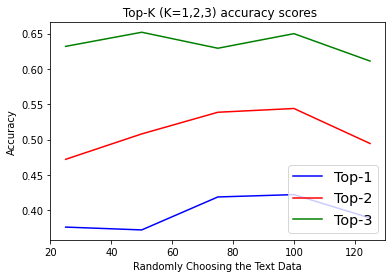

<Figure size 432x288 with 0 Axes>

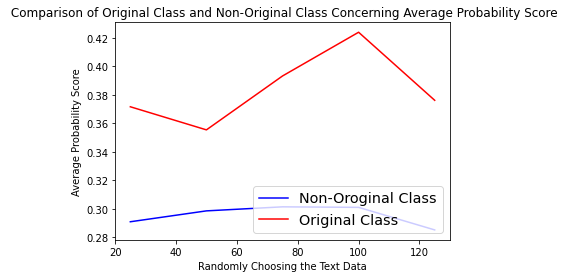

<Figure size 432x288 with 0 Axes>

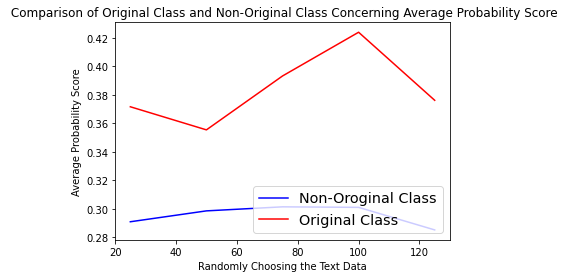

<Figure size 432x288 with 0 Axes>

In [ ]:
#
# Assigning original tags and texts
rttext_tagh1=rttext_tag2
truhh=tagu
#RANDOM SELECTION of the texts by varying the number of texts
import sys
import matplotlib.pyplot as plt
from numpy.ma.core import mean
from sentence_transformers import SentenceTransformer
from sklearn.cluster import KMeans
import sys
from sentence_transformers import SentenceTransformer
from sklearn.cluster import AgglomerativeClustering
import numpy as np
from sentence_transformers import SentenceTransformer
from sklearn.cluster import KMeans
from sentence_transformers import SentenceTransformer
from sklearn.cluster import AgglomerativeClustering
import numpy as np
import operator
from sklearn.metrics.pairwise import cosine_similarity,cosine_distances
import sys
from scipy import spatial
from sklearn_extra.cluster import KMedoids
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity,cosine_distances

import math
import sys
import random
import operator
from sentence_transformers import SentenceTransformer
from sklearn.cluster import KMeans
from sentence_transformers import SentenceTransformer
from sklearn.cluster import AgglomerativeClustering
import numpy as np
from sentence_transformers import SentenceTransformer
from sklearn.cluster import KMeans
from sentence_transformers import SentenceTransformer
from sklearn.cluster import AgglomerativeClustering
import numpy as np
from scipy import spatial

def tagcls_only(bb22):  
                    rttext_tagh={}
                    mptxt={}
                    rttag={}
                    allid=[]
                    truhh=[]
                    bv=100
                    vbb=[]
                    for kk in rttext_tagh1:
                        if txt_rd[str(kk)] not in allid:
                            allid.append(txt_rd[str(kk)])

                    vz=0
                    lm=bb22+100
                    for jj in range(0,lm):
                        bb1=random.choice(allid)
                        if (bb1):
                            vz=vz+1
                            #if (bb):
                            if  len(rttext_tagh)<bb22:
                                    rttext_tagh[rd_txt[bb1]]=rttext_tagh1[rd_txt[bb1]]

             
                    for tt in rttext_tagh:
                        for kkk in rttext_tagh[tt]:
                            if kkk not in  vbb:
                                vbb.append(kkk)

                    ss=set(vbb)
                    #truhh=[]
                    #rttext_tagh={}

                    for vv in ss:
                        truhh.append( vv)

                    print(len(rttext_tagh),len(truhh))
                    
                    #Accuracy Computation

                    #multi tag

                    from transformers import AutoModelForSequenceClassification, AutoTokenizer
                    import numpy as np
                    import operator
                    import matplotlib.pyplot as plt
                    from transformers import pipeline
                    from pylab import rcParams
                    import sys 
                    import nltk
                    import re
                    import operator
                    #from transformers_interpret import ZeroShotClassificationExplainer
                    zero_shot_classifier = pipeline("zero-shot-classification")#,model='facebook/bart-large-mnli')#,model='roberta-large-mnli')#model='facebook/bart-large-mnli')#,model='Recognai/zeroshot_selectra_medium')#,model='facebook/bart-large-mnli')
                    #tokenizer = AutoTokenizer.from_pretrained("Recognai/zeroshot_selectra_medium")#("facebook/bart-base-mnli")#("Recognai/zeroshot_selectra_medium")
                    #model = AutoModelForSequenceClassification.from_pretrained("Recognai/zeroshot_selectra_medium")#("facebook/bart-base-mnli")#("Recognai/zeroshot_selectra_medium")
                    #zero_shot_explainer = ZeroShotClassificationExplainer(model, tokenizer)
                    # creating embedding of the relational texts
                    from sentence_transformers import SentenceTransformer
                    from sklearn.cluster import KMeans
                    import sys
                    from sentence_transformers import SentenceTransformer
                    from sklearn.cluster import AgglomerativeClustering
                    import numpy as np
                    from sentence_transformers import SentenceTransformer
                    from sklearn.cluster import KMeans
                    from sentence_transformers import SentenceTransformer
                    from sklearn.cluster import AgglomerativeClustering
                    import numpy as np
                    import operator
                    from sklearn.metrics.pairwise import cosine_similarity,cosine_distances
                    import sys
                    from scipy import spatial
                    from sklearn_extra.cluster import KMedoids
                    import numpy as np
                    from sklearn.feature_extraction.text import TfidfVectorizer
                    from sklearn.metrics.pairwise import cosine_similarity,cosine_distances

                    cn=0
                    txt_lbp={}
                    ocl_di={}
                    pred_l={}
                    ocl_dia={}
                    pred_lnk={}
                    ocl_dnk={}
                    pred_tk={}
                    ocl_tk={}
                    all_txt_label_score={}
                    all_txt_label_rank={}
                    def get_relational_embedding(s):
                            corpus=[]
                            s1=''
                            for kk in samelocation:
                                cc=0
                                #for kj in samelocation[kk]:
                                if s in samelocation[kk]: 
                                    for kj in samelocation[kk]:
                                        corpus.append(kj)
                                        s1=s1+kj+" "
                                    # cc=cc+1
                            embedder = SentenceTransformer('all-MiniLM-L12-v2')
                            corpus_embeddings = embedder.encode(corpus)
                            return corpus_embeddings,corpus,s1

                    # Zero-shot Classification
                    def review_explain(text):
                           # corpus_embeddings,corpus,s1=get_relational_embedding(text)
                            #zero_shot_classifier = pipeline("zero-shot-classification")#.preprocess(corpus)#.transform(corpus)#.save_pretrained(corpus_embeddings)#,corpus_embeddings)
                        
                            result = zero_shot_classifier(sequences =text,candidate_labels =truhh,multi_label=True)
                            #zero_shot_classifier(sequences =t,candidate_labels =truhh,multi_label=False)
                            return result['labels'],result['scores']

                    
                    for tt in rttext_tagh:
                       # import sys
                        #print(len(rttext_tagh[tt]))
                        #sys.exit()
                        mpd={}
                        nlb=[]
                        mpd_nk={}
                        mpd_tk={}
                        nlb_tk=[]
                        nlb_nk=[]
                        rn={}
                        rsc={}
                        clas,score= review_explain(tt)
                    
                        for bb in range(0,len(clas)):
                            rsc[clas[bb]]=score[bb]
                        for bb in range(0,len(clas)):
                            rn[clas[bb]]=bb+1
                        all_txt_label_score[tt]=rsc
                        all_txt_label_rank[tt]=rn
                        for k1 in rttext_tagh[tt]:
                                for t3 in range(0,len(clas)):
                                    if str(clas[t3])==str(k1):
                                        mpd[k1]=score[t3]
                        for k1 in rttext_tagh[tt]:
                                for t3 in range(0,len(clas)):
                                    if str(clas[t3])!=str(k1):
                                        if score[t3]>0.5:
                                            mpd_nk[k1]=score[t3]
                        for k1 in rttext_tagh[tt]:
                                for t3 in range(0,len(clas)):
                                    if str(clas[t3])==str(k1):
                                        if score[t3]>0.5:
                                            mpd_tk[k1]=score[t3]
                        
                        dd=sorted(mpd.items(), key=operator.itemgetter(1),reverse=True)
                        dd1=sorted(mpd_nk.items(), key=operator.itemgetter(1),reverse=True)
                        dd2=sorted(mpd_tk.items(), key=operator.itemgetter(1),reverse=True)
                        
                        for zz in dd:
                            nlb.append(zz[0])
                        for zz1 in dd1:
                            nlb_nk.append(zz1[0])
                        for zz2 in dd2:
                            nlb_tk.append(zz2[0])
                        
                        pred_lnk[tt]=nlb_nk #ranked list of the non-original labels has pribability greater than 50%
                        pred_tk[tt]=nlb_tk#ranked list of the original labels has pribability greater than and equal 90% and appear in top N labels
                        ocl_di[tt]=nlb[0:1]#single label with the highest score of the original label
                        ocl_dia[tt]=nlb#ranked list of the original label
                        

                        txt_lbp[tt]=clas[0:10]
                        pred_l[tt]=clas
                    

                    '''
                    Comparing average rank of the predicted original labels with that of it ideal rank positon
                    Coounting the number of non-original labels that have higher probability scores than that of original labels per text

                    '''
                    # average rank
                    ccc=0
                    KK=3 # number of top predicted non-original labels

                    per_txt_ori_rank_cmp={}
                    per_txt_ori_score_avg={}
                    per_txt_nonori_rank_cmp={}
                    per_txt_nonori_pred_rank_avg={}
                    per_txt_nonori_ori_rank_avg={}
                    per_txt_nonori_score_avg={}
                    per_txt_ori_pred_rank_avg={}
                    per_txt_ori_ori_rank_avg={}
                    per_txt_nonori_top_n={}

                    #import sys
                    #print(len(all_txt_label_score))
                   # sys.exit()
                    for v in all_txt_label_score:
                      if v in rttext_tagh:
                        #import sys
                        #print(len(rttext_tagh[v]))
                        #sys.exit()
                        orn=(len(rttext_tagh[v])+1)/2 # Ideal average rank position
                        s=0
                        sc=0
                        cz=0
                        nr=[]
                        sno=0
                        snosc=0
                        for kz in all_txt_label_rank[v]:
                            if kz not in rttext_tagh[v]:
                                if cz<KK:
                                        if kz not in nr:
                                                nr.append(kz)
                                                #print(kz,rttext_tagu[v],all_txt_label_rank[v][kz],all_txt_label_score[v][kz])
                                                sno=sno+float(all_txt_label_rank[v][kz])
                                                snosc=snosc+float(all_txt_label_score[v][kz])
                                                cz=cz+1
                        #print("\n")
                        per_txt_nonori_top_n[v]=nr
                        per_txt_nonori_rank_cmp[v]=sno/KK
                        per_txt_nonori_score_avg[v]=snosc/KK

                        for kz in all_txt_label_rank[v]:
                            if kz in rttext_tagh[v]:
                                s=s+float(all_txt_label_rank[v][kz])
                                sc=sc+float(all_txt_label_score[v][kz])
                        #import sys
                        #print(len(rttext_tagh[v]))
                        #sys.exit()
                       # try:
                        prn=s/len(rttext_tagh[v])
                        per_txt_ori_score_avg[v]=sc/len(rttext_tagh[v])
                        per_txt_ori_pred_rank_avg[v]=prn
                        per_txt_ori_ori_rank_avg[v]=orn
                        # print(prn)
                        dif=abs(prn-orn)
                        per_txt_ori_rank_cmp[v]=dif
                        #except:
                            #continue
                        if dif<=0.0:
                            ccc=ccc+1
                    print("Number of texts where the position of the original labels preserved after prediction")
                    print(ccc)
                    print("Percentage of texts where the position of the original labels preserved after prediction")
                    print(ccc/len(txt_lbp))


                    # average scores

                    vvv=0
                    for jj in per_txt_ori_score_avg:
                        if per_txt_nonori_score_avg[jj]>per_txt_ori_score_avg[jj]:
                                    vvv=vvv+1

                    print("Number of non-original labels have higher prediction acores than original labels after prediction")
                                
                    print(vvv)

                    '''
                    Accuracy for the clustered labels
                    '''
                    #accuracy of multi-level classification with k-means clustering
                    correct_txt_true_pred=[]
                    def topps(n):
                                cc=0
                                vb1=0
                                for tt in txt_lbp:
                                        #if vb1 < 1000:
                                                #vb1=vb1+1 
                                                try:
                                                    for vb in txt_lbp[tt][0:n]:
                                                            #print(rttext_tagh[tt][0],vb)
                                                            if vb in rttext_tagh[tt][0:n]:
                                                            #if str(vb) ==str(rttext_tagh[tt][0]):
                                                                cc=cc+1
                                                                if tt not in correct_txt_true_pred:
                                                                            correct_txt_true_pred.append(tt)
                                                                break
                                                            else:
                                                                continue

                                                except:
                                                    continue
                                                
                                #txt_lbp
                                print("Top_"+str(n)+ " Prediction Score: ")
                                print(cc/len(txt_lbp))
                                ac=cc/len(txt_lbp)
                                return ac
                    top=3
                    scc=[]
                    for zz in range(1,top+1):
                        ac=topps(zz)
                        scc.append(ac)
                    return scc,per_txt_nonori_score_avg,per_txt_ori_score_avg,correct_txt_true_pred,per_txt_ori_pred_rank_avg,per_txt_ori_ori_rank_avg
                    

rand_acc={}
rand_pscr_nonlb={}
rand_pscr_orlb={}
rand_predi_rank_orlb={}
rand_ori_rank_orlb={}
correct_txt_true_p={}
count_percl_hosctxt={}
count_percl_txt={}
def rand_size(bb):
    for vv in range(0,5):
        scc,per_txt_nonori_score_avg,per_txt_ori_score_avg,correct_txt_true_pred,per_txt_ori_pred_rank_avg,per_txt_ori_ori_rank_avg=tagcls_only(bb)
        rand_acc[vv]=scc
        rand_pscr_nonlb[vv]=per_txt_nonori_score_avg
        rand_pscr_orlb[vv]=per_txt_ori_score_avg
        correct_txt_true_p[vv]=correct_txt_true_pred
        rand_predi_rank_orlb[vv]=per_txt_ori_pred_rank_avg
        rand_ori_rank_orlb[vv]=per_txt_ori_ori_rank_avg
        #count_percl_hosctxt[vv]=nmmm
        #count_percl_txt[vv]=len(final_clut2[tt11])
        print("\n\n")
    return rand_acc,rand_pscr_nonlb,rand_pscr_orlb,rand_predi_rank_orlb,rand_ori_rank_orlb,count_percl_hosctxt,count_percl_txt



s1=[]
b1=[]
sb1=[]
noc1=[]
oc1=[]
clsize=[]

for bn in range(25,126,25):
      print("Random "+ str(bn))
      rand_acc,rand_pscr_nonlb,rand_pscr_orlb,rand_predi_rank_orlb,rand_ori_rank_orlb,count_percl_hosctxt,count_percl_txt=rand_size(bn)
      vr_t1=[]
      vr_t2=[]
      vr_t3=[]
      for kk in rand_acc:
            vr_t1.append(rand_acc[kk][0])
            vr_t2.append(rand_acc[kk][1])
            vr_t3.append(rand_acc[kk][2])
      non=[]
      for vv in rand_pscr_nonlb:
          s11=0
          for kk in rand_pscr_nonlb[vv]:
              #s1=0
              #for tx in rand_pscr_nonlb[vv][kk]:
              s11=s11+rand_pscr_nonlb[vv][kk]
          sv=s11/len(rand_pscr_nonlb[vv])
          non.append(sv)
      sv1=mean(non)
      noc1.append(sv1)
      on=[]
      for vv in rand_pscr_orlb:
          s5=0
          for kk in rand_pscr_orlb[vv]:
              #s11=0
              #for tx in rand_pscr_orlb[vv][kk]:
                  s5=s5+rand_pscr_orlb[vv][kk]
          sv2=s5/len(rand_pscr_orlb[vv])
          on.append(sv2)
      sv3=mean(on)
      oc1.append(sv3)


      vb1=mean(vr_t1)
      s1.append(vb1)
      vb2=mean(vr_t2)
      b1.append(vb2)
      vb3=mean(vr_t3)
      sb1.append(vb3)
      print(s1,b1,sb1)
     # clsize.append(len(final_clut2))
        

# Drawing Varying the number of texts randomly



'''
Accuracy
'''


#Geb_b30 = nri#[11, 10, 12, 14, 16, 19, 17, 14, 18, 17]
#years_b30 = range(0,len(nri))
#Geb_a30 = ori#[12, 10, 13, 14, 12, 13, 18, 16,0,0]
#years_a30 = range(0,len(ori))
#print(len(vr_t1))
#Drawing the average acuuracy with the increament of the text size
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.dates import date2num
import sys
import pylab 

#s1=[0.2, 0.296, 0.21600000000000003, 0.21600000000000003, 0.2624]
#b1=[0.728, 0.78, 0.7066666666666667, 0.7300000000000001, 0.6704000000000001]
#sb1=[0.8640000000000001, 0.844, 0.7706666666666666, 0.804, 0.7647999999999999]
years_a31 = range(25,126,25)

fig, ax = plt.subplots()
ax.plot(years_a31, s1, label='Top-1', color='blue')
ax.plot(years_a31,b1, label='Top-2', color = 'red')
ax.plot(years_a31,sb1, label='Top-3', color = 'green')
legend = ax.legend(loc='lower right', fontsize='x-large')
plt.xlabel('Randomly Choosing the Text Data')
plt.ylabel('Accuracy')
plt.title(' Top-K (K=1,2,3) accuracy scores')
plt.show()
plt.savefig("vt_txt_size_acc_zero.pdf")
pylab.show()

# Average score of non-original and original  varying cluster  (Random)
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.dates import date2num
import sys
import pylab 

years_a31 = range(25,126,25)
#noc1=[0.8057282710870106, 0.8258386753797531, 0.8569131283760072, 0.8452732372283933, 0.8594713402748109]
#oc1=[0.7554763378689533, 0.7521192745907562, 0.7499143993404642, 0.7511222235150612, 0.7439288047549906]
fig, ax = plt.subplots()
ax.plot(years_a31,noc1, label='Non-Oroginal Class', color='blue')
ax.plot(years_a31,oc1, label='Original Class', color = 'red')
#ax.plot(years_a31,vr_t3, label='Top-3', color = 'green')
legend = ax.legend(loc='lower right', fontsize='x-large')
plt.xlabel('Randomly Choosing the Text Data')
plt.ylabel('Average Probability Score')
plt.title(' Comparison of Original Class and Non-Original Class Concerning Average Probability Score')
plt.show()
plt.savefig("vt_txt_size_avg_score_zero.pdf")
pylab.show()

'''
#Drawing the average acuuracy with the increament of the text size
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.dates import date2num
import sys
import pylab 

s1=[0.2, 0.296, 0.21600000000000003, 0.21600000000000003, 0.2624]
b1=[0.728, 0.78, 0.7066666666666667, 0.7300000000000001, 0.6704000000000001]
sb1=[0.8640000000000001, 0.844, 0.7706666666666666, 0.804, 0.7647999999999999]
years_a31 = range(25,126,25)

fig, ax = plt.subplots()
ax.plot(years_a31, s1, label='Top-1', color='blue')
ax.plot(years_a31,b1, label='Top-2', color = 'red')
ax.plot(years_a31,sb1, label='Top-3', color = 'green')
legend = ax.legend(loc='lower right', fontsize='x-large')
plt.xlabel('Randomly Choosing the Text Data')
plt.ylabel('Accuracy')
plt.title(' Top-K (K=1,2,3) accuracy scores')
plt.show()
plt.savefig("vt_txt_size_acc_zero.pdf")
pylab.show()







'''
# Average score of non-original and original  varying the number of texts  (Random)
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.dates import date2num
import sys
import pylab 

years_a31 = range(25,126,25)
#noc1=[0.8057282710870106, 0.8258386753797531, 0.8569131283760072, 0.8452732372283933, 0.8594713402748109]
#oc1=[0.7554763378689533, 0.7521192745907562, 0.7499143993404642, 0.7511222235150612, 0.7439288047549906]
fig, ax = plt.subplots()
ax.plot(years_a31,noc1, label='Non-Oroginal Class', color='blue')
ax.plot(years_a31,oc1, label='Original Class', color = 'red')
#ax.plot(years_a31,vr_t3, label='Top-3', color = 'green')
legend = ax.legend(loc='lower right', fontsize='x-large')
plt.xlabel('Randomly Choosing the Text Data')
plt.ylabel('Average Probability Score')
plt.title(' Comparison of Original Class and Non-Original Class Concerning Average Probability Score')
plt.show()
plt.savefig("vt_txt_size_avg_score_zero.pdf")







In [ ]:
# Varying the number of texts randomly 25 to 125
top1=[0.376, 0.372, 0.41866666666666663, 0.42200000000000004, 0.3888] 
top2=[0.472, 0.508, 0.5386666666666666, 0.544, 0.4944] 
tp3=[0.6320000000000001, 0.6519999999999999, 0.6293333333333333, 0.65, 0.6112]

# PSC
noc1=[0.29085109447043694, 0.29849178070041427, 0.3013276883310431, 0.3009570142276642, 0.28511994763379916]
oc=[0.3716065704069042, 0.3553788973555202, 0.39322497994281, 0.42393879212701, 0.37614539028056315]

In [ ]:
# Top 3 accuracy score varying the the number of texts randomly
Top1 [0.44799999999999995, 0.4, 0.39733333333333337, 0.366, 0.376] 
Top2[0.536, 0.54, 0.544, 0.518, 0.5024]
 Top3[0.6160000000000001, 0.624, 0.6186666666666667, 0.616, 0.6064]

In [ ]:
print(noc1)
print(oc1)

[0.29085109447043694, 0.29849178070041427, 0.3013276883310431, 0.3009570142276642, 0.28511994763379916]
[0.3716065704069042, 0.3553788973555202, 0.39322497994281, 0.42393879212701, 0.37614539028056315]


# Here we observe the performance of the zero-shot for the cluster based approach. In this regard, here we kept the the number of cluster of the texts fixed and we vary the number of cluster of the classes.

cluster2



Downloading:   0%|          | 0.00/1.18k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/190 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/10.6k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/573 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/116 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/39.3k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/134M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/112 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/466k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/352 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/13.2k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/232k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/349 [00:00<?, ?B/s]

46
Cluster: 0
1 100


No model was supplied, defaulted to facebook/bart-large-mnli and revision c626438 (https://huggingface.co/facebook/bart-large-mnli).
Using a pipeline without specifying a model name and revision in production is not recommended.


Number of texts where the position of the original labels preserved after prediction
100 100
Percentage of texts where the position of the original labels preserved after prediction
1.0
Number of non-original labels have higher prediction acores than original labels after prediction
0
Top_1 Prediction Score: 
1.0
Top_2 Prediction Score: 
1.0
Top_3 Prediction Score: 
1.0


No model was supplied, defaulted to facebook/bart-large-mnli and revision c626438 (https://huggingface.co/facebook/bart-large-mnli).
Using a pipeline without specifying a model name and revision in production is not recommended.





Cluster: 1
1 100
Number of texts where the position of the original labels preserved after prediction
100 100
Percentage of texts where the position of the original labels preserved after prediction
1.0
Number of non-original labels have higher prediction acores than original labels after prediction
0
Top_1 Prediction Score: 
1.0
Top_2 Prediction Score: 
1.0
Top_3 Prediction Score: 
1.0


No model was supplied, defaulted to facebook/bart-large-mnli and revision c626438 (https://huggingface.co/facebook/bart-large-mnli).
Using a pipeline without specifying a model name and revision in production is not recommended.





Cluster: 2
1 100
Number of texts where the position of the original labels preserved after prediction
100 100
Percentage of texts where the position of the original labels preserved after prediction
1.0
Number of non-original labels have higher prediction acores than original labels after prediction
0
Top_1 Prediction Score: 
1.0
Top_2 Prediction Score: 
1.0
Top_3 Prediction Score: 
1.0


No model was supplied, defaulted to facebook/bart-large-mnli and revision c626438 (https://huggingface.co/facebook/bart-large-mnli).
Using a pipeline without specifying a model name and revision in production is not recommended.





Cluster: 3
2 72
Number of texts where the position of the original labels preserved after prediction
32 72
Percentage of texts where the position of the original labels preserved after prediction
0.4444444444444444
Number of non-original labels have higher prediction acores than original labels after prediction
24
Top_1 Prediction Score: 
0.4444444444444444
Top_2 Prediction Score: 
1.0
Top_3 Prediction Score: 
1.0


No model was supplied, defaulted to facebook/bart-large-mnli and revision c626438 (https://huggingface.co/facebook/bart-large-mnli).
Using a pipeline without specifying a model name and revision in production is not recommended.





Cluster: 4
1 100
Number of texts where the position of the original labels preserved after prediction
100 100
Percentage of texts where the position of the original labels preserved after prediction
1.0
Number of non-original labels have higher prediction acores than original labels after prediction
0
Top_1 Prediction Score: 
1.0
Top_2 Prediction Score: 
1.0
Top_3 Prediction Score: 
1.0


No model was supplied, defaulted to facebook/bart-large-mnli and revision c626438 (https://huggingface.co/facebook/bart-large-mnli).
Using a pipeline without specifying a model name and revision in production is not recommended.





Cluster: 5
1 100


No model was supplied, defaulted to facebook/bart-large-mnli and revision c626438 (https://huggingface.co/facebook/bart-large-mnli).
Using a pipeline without specifying a model name and revision in production is not recommended.


Number of texts where the position of the original labels preserved after prediction
100 100
Percentage of texts where the position of the original labels preserved after prediction
1.0
Number of non-original labels have higher prediction acores than original labels after prediction
0
Top_1 Prediction Score: 
1.0
Top_2 Prediction Score: 
1.0
Top_3 Prediction Score: 
1.0



Cluster: 6
1 100
Number of texts where the position of the original labels preserved after prediction
100 100
Percentage of texts where the position of the original labels preserved after prediction
1.0
Number of non-original labels have higher prediction acores than original labels after prediction
0
Top_1 Prediction Score: 
1.0
Top_2 Prediction Score: 
1.0
Top_3 Prediction Score: 
1.0


No model was supplied, defaulted to facebook/bart-large-mnli and revision c626438 (https://huggingface.co/facebook/bart-large-mnli).
Using a pipeline without specifying a model name and revision in production is not recommended.





Cluster: 7
1 100
Number of texts where the position of the original labels preserved after prediction
100 100
Percentage of texts where the position of the original labels preserved after prediction
1.0
Number of non-original labels have higher prediction acores than original labels after prediction
0
Top_1 Prediction Score: 
1.0
Top_2 Prediction Score: 
1.0
Top_3 Prediction Score: 
1.0


No model was supplied, defaulted to facebook/bart-large-mnli and revision c626438 (https://huggingface.co/facebook/bart-large-mnli).
Using a pipeline without specifying a model name and revision in production is not recommended.
No model was supplied, defaulted to facebook/bart-large-mnli and revision c626438 (https://huggingface.co/facebook/bart-large-mnli).
Using a pipeline without specifying a model name and revision in production is not recommended.





Cluster: 8
1 100
Number of texts where the position of the original labels preserved after prediction
100 100
Percentage of texts where the position of the original labels preserved after prediction
1.0
Number of non-original labels have higher prediction acores than original labels after prediction
0
Top_1 Prediction Score: 
1.0
Top_2 Prediction Score: 
1.0
Top_3 Prediction Score: 
1.0



Cluster: 9
1 100
Number of texts where the position of the original labels preserved after prediction
100 100
Percentage of texts where the position of the original labels preserved after prediction
1.0
Number of non-original labels have higher prediction acores than original labels after prediction
0
Top_1 Prediction Score: 
1.0
Top_2 Prediction Score: 
1.0
Top_3 Prediction Score: 
1.0


No model was supplied, defaulted to facebook/bart-large-mnli and revision c626438 (https://huggingface.co/facebook/bart-large-mnli).
Using a pipeline without specifying a model name and revision in production is not recommended.





Cluster: 10
1 100
Number of texts where the position of the original labels preserved after prediction
100 100
Percentage of texts where the position of the original labels preserved after prediction
1.0
Number of non-original labels have higher prediction acores than original labels after prediction
0
Top_1 Prediction Score: 
1.0
Top_2 Prediction Score: 
1.0
Top_3 Prediction Score: 
1.0


No model was supplied, defaulted to facebook/bart-large-mnli and revision c626438 (https://huggingface.co/facebook/bart-large-mnli).
Using a pipeline without specifying a model name and revision in production is not recommended.





Cluster: 11
1 100
Number of texts where the position of the original labels preserved after prediction
100 100
Percentage of texts where the position of the original labels preserved after prediction
1.0
Number of non-original labels have higher prediction acores than original labels after prediction
0
Top_1 Prediction Score: 
1.0
Top_2 Prediction Score: 
1.0
Top_3 Prediction Score: 
1.0


No model was supplied, defaulted to facebook/bart-large-mnli and revision c626438 (https://huggingface.co/facebook/bart-large-mnli).
Using a pipeline without specifying a model name and revision in production is not recommended.





Cluster: 12
1 100
Number of texts where the position of the original labels preserved after prediction
100 100
Percentage of texts where the position of the original labels preserved after prediction
1.0
Number of non-original labels have higher prediction acores than original labels after prediction
0
Top_1 Prediction Score: 
1.0
Top_2 Prediction Score: 
1.0
Top_3 Prediction Score: 
1.0


No model was supplied, defaulted to facebook/bart-large-mnli and revision c626438 (https://huggingface.co/facebook/bart-large-mnli).
Using a pipeline without specifying a model name and revision in production is not recommended.





Cluster: 13
1 100
Number of texts where the position of the original labels preserved after prediction
100 100
Percentage of texts where the position of the original labels preserved after prediction
1.0
Number of non-original labels have higher prediction acores than original labels after prediction
0
Top_1 Prediction Score: 
1.0
Top_2 Prediction Score: 
1.0
Top_3 Prediction Score: 
1.0


No model was supplied, defaulted to facebook/bart-large-mnli and revision c626438 (https://huggingface.co/facebook/bart-large-mnli).
Using a pipeline without specifying a model name and revision in production is not recommended.





Cluster: 14
2 50
Number of texts where the position of the original labels preserved after prediction
41 50
Percentage of texts where the position of the original labels preserved after prediction
0.82
Number of non-original labels have higher prediction acores than original labels after prediction
4
Top_1 Prediction Score: 
0.82
Top_2 Prediction Score: 
1.0
Top_3 Prediction Score: 
1.0


No model was supplied, defaulted to facebook/bart-large-mnli and revision c626438 (https://huggingface.co/facebook/bart-large-mnli).
Using a pipeline without specifying a model name and revision in production is not recommended.





Cluster: 15
1 100
Number of texts where the position of the original labels preserved after prediction
100 100
Percentage of texts where the position of the original labels preserved after prediction
1.0
Number of non-original labels have higher prediction acores than original labels after prediction
0
Top_1 Prediction Score: 
1.0
Top_2 Prediction Score: 
1.0
Top_3 Prediction Score: 
1.0




No model was supplied, defaulted to facebook/bart-large-mnli and revision c626438 (https://huggingface.co/facebook/bart-large-mnli).
Using a pipeline without specifying a model name and revision in production is not recommended.



Cluster: 16
1 100
Number of texts where the position of the original labels preserved after prediction
100 100
Percentage of texts where the position of the original labels preserved after prediction
1.0
Number of non-original labels have higher prediction acores than original labels after prediction
0
Top_1 Prediction Score: 
1.0
Top_2 Prediction Score: 
1.0
Top_3 Prediction Score: 
1.0


No model was supplied, defaulted to facebook/bart-large-mnli and revision c626438 (https://huggingface.co/facebook/bart-large-mnli).
Using a pipeline without specifying a model name and revision in production is not recommended.





Cluster: 17
1 100


No model was supplied, defaulted to facebook/bart-large-mnli and revision c626438 (https://huggingface.co/facebook/bart-large-mnli).
Using a pipeline without specifying a model name and revision in production is not recommended.


Number of texts where the position of the original labels preserved after prediction
100 100
Percentage of texts where the position of the original labels preserved after prediction
1.0
Number of non-original labels have higher prediction acores than original labels after prediction
0
Top_1 Prediction Score: 
1.0
Top_2 Prediction Score: 
1.0
Top_3 Prediction Score: 
1.0



Cluster: 18
1 100
Number of texts where the position of the original labels preserved after prediction
100 100
Percentage of texts where the position of the original labels preserved after prediction
1.0
Number of non-original labels have higher prediction acores than original labels after prediction
0
Top_1 Prediction Score: 
1.0
Top_2 Prediction Score: 
1.0
Top_3 Prediction Score: 
1.0


No model was supplied, defaulted to facebook/bart-large-mnli and revision c626438 (https://huggingface.co/facebook/bart-large-mnli).
Using a pipeline without specifying a model name and revision in production is not recommended.





Cluster: 19
1 100
Number of texts where the position of the original labels preserved after prediction
100 100
Percentage of texts where the position of the original labels preserved after prediction
1.0
Number of non-original labels have higher prediction acores than original labels after prediction
0
Top_1 Prediction Score: 
1.0
Top_2 Prediction Score: 
1.0
Top_3 Prediction Score: 
1.0


No model was supplied, defaulted to facebook/bart-large-mnli and revision c626438 (https://huggingface.co/facebook/bart-large-mnli).
Using a pipeline without specifying a model name and revision in production is not recommended.





Cluster: 20
1 100
Number of texts where the position of the original labels preserved after prediction
100 100
Percentage of texts where the position of the original labels preserved after prediction
1.0
Number of non-original labels have higher prediction acores than original labels after prediction
0
Top_1 Prediction Score: 
1.0
Top_2 Prediction Score: 
1.0
Top_3 Prediction Score: 
1.0


No model was supplied, defaulted to facebook/bart-large-mnli and revision c626438 (https://huggingface.co/facebook/bart-large-mnli).
Using a pipeline without specifying a model name and revision in production is not recommended.





Cluster: 21
1 100
Number of texts where the position of the original labels preserved after prediction
100 100
Percentage of texts where the position of the original labels preserved after prediction
1.0
Number of non-original labels have higher prediction acores than original labels after prediction
0
Top_1 Prediction Score: 
1.0
Top_2 Prediction Score: 
1.0
Top_3 Prediction Score: 
1.0


No model was supplied, defaulted to facebook/bart-large-mnli and revision c626438 (https://huggingface.co/facebook/bart-large-mnli).
Using a pipeline without specifying a model name and revision in production is not recommended.





Cluster: 22
1 100
Number of texts where the position of the original labels preserved after prediction
100 100
Percentage of texts where the position of the original labels preserved after prediction
1.0
Number of non-original labels have higher prediction acores than original labels after prediction
0
Top_1 Prediction Score: 
1.0
Top_2 Prediction Score: 
1.0
Top_3 Prediction Score: 
1.0


No model was supplied, defaulted to facebook/bart-large-mnli and revision c626438 (https://huggingface.co/facebook/bart-large-mnli).
Using a pipeline without specifying a model name and revision in production is not recommended.





Cluster: 23
1 100
Number of texts where the position of the original labels preserved after prediction
100 100
Percentage of texts where the position of the original labels preserved after prediction
1.0
Number of non-original labels have higher prediction acores than original labels after prediction
0
Top_1 Prediction Score: 
1.0
Top_2 Prediction Score: 
1.0
Top_3 Prediction Score: 
1.0


No model was supplied, defaulted to facebook/bart-large-mnli and revision c626438 (https://huggingface.co/facebook/bart-large-mnli).
Using a pipeline without specifying a model name and revision in production is not recommended.





Cluster: 24
1 100
Number of texts where the position of the original labels preserved after prediction
100 100
Percentage of texts where the position of the original labels preserved after prediction
1.0
Number of non-original labels have higher prediction acores than original labels after prediction
0
Top_1 Prediction Score: 
1.0
Top_2 Prediction Score: 
1.0
Top_3 Prediction Score: 
1.0


No model was supplied, defaulted to facebook/bart-large-mnli and revision c626438 (https://huggingface.co/facebook/bart-large-mnli).
Using a pipeline without specifying a model name and revision in production is not recommended.





Cluster: 25
2 84


No model was supplied, defaulted to facebook/bart-large-mnli and revision c626438 (https://huggingface.co/facebook/bart-large-mnli).
Using a pipeline without specifying a model name and revision in production is not recommended.


Number of texts where the position of the original labels preserved after prediction
59 84
Percentage of texts where the position of the original labels preserved after prediction
0.7023809523809523
Number of non-original labels have higher prediction acores than original labels after prediction
16
Top_1 Prediction Score: 
0.7023809523809523
Top_2 Prediction Score: 
1.0
Top_3 Prediction Score: 
1.0



Cluster: 26
1 100
Number of texts where the position of the original labels preserved after prediction
100 100
Percentage of texts where the position of the original labels preserved after prediction
1.0
Number of non-original labels have higher prediction acores than original labels after prediction
0
Top_1 Prediction Score: 
1.0
Top_2 Prediction Score: 
1.0
Top_3 Prediction Score: 
1.0


No model was supplied, defaulted to facebook/bart-large-mnli and revision c626438 (https://huggingface.co/facebook/bart-large-mnli).
Using a pipeline without specifying a model name and revision in production is not recommended.





Cluster: 27
1 100
Number of texts where the position of the original labels preserved after prediction
100 100
Percentage of texts where the position of the original labels preserved after prediction
1.0
Number of non-original labels have higher prediction acores than original labels after prediction
0
Top_1 Prediction Score: 
1.0
Top_2 Prediction Score: 
1.0
Top_3 Prediction Score: 
1.0



Cluster: 28
1 100


No model was supplied, defaulted to facebook/bart-large-mnli and revision c626438 (https://huggingface.co/facebook/bart-large-mnli).
Using a pipeline without specifying a model name and revision in production is not recommended.
No model was supplied, defaulted to facebook/bart-large-mnli and revision c626438 (https://huggingface.co/facebook/bart-large-mnli).
Using a pipeline without specifying a model name and revision in production is not recommended.


Number of texts where the position of the original labels preserved after prediction
100 100
Percentage of texts where the position of the original labels preserved after prediction
1.0
Number of non-original labels have higher prediction acores than original labels after prediction
0
Top_1 Prediction Score: 
1.0
Top_2 Prediction Score: 
1.0
Top_3 Prediction Score: 
1.0



Cluster: 29
1 100


No model was supplied, defaulted to facebook/bart-large-mnli and revision c626438 (https://huggingface.co/facebook/bart-large-mnli).
Using a pipeline without specifying a model name and revision in production is not recommended.


Number of texts where the position of the original labels preserved after prediction
100 100
Percentage of texts where the position of the original labels preserved after prediction
1.0
Number of non-original labels have higher prediction acores than original labels after prediction
0
Top_1 Prediction Score: 
1.0
Top_2 Prediction Score: 
1.0
Top_3 Prediction Score: 
1.0



Cluster: 30
1 100


No model was supplied, defaulted to facebook/bart-large-mnli and revision c626438 (https://huggingface.co/facebook/bart-large-mnli).
Using a pipeline without specifying a model name and revision in production is not recommended.


Number of texts where the position of the original labels preserved after prediction
100 100
Percentage of texts where the position of the original labels preserved after prediction
1.0
Number of non-original labels have higher prediction acores than original labels after prediction
0
Top_1 Prediction Score: 
1.0
Top_2 Prediction Score: 
1.0
Top_3 Prediction Score: 
1.0



Cluster: 31
1 100
Number of texts where the position of the original labels preserved after prediction
100 100
Percentage of texts where the position of the original labels preserved after prediction
1.0
Number of non-original labels have higher prediction acores than original labels after prediction
0
Top_1 Prediction Score: 
1.0
Top_2 Prediction Score: 
1.0
Top_3 Prediction Score: 
1.0


No model was supplied, defaulted to facebook/bart-large-mnli and revision c626438 (https://huggingface.co/facebook/bart-large-mnli).
Using a pipeline without specifying a model name and revision in production is not recommended.





Cluster: 32
1 100
Number of texts where the position of the original labels preserved after prediction
100 100
Percentage of texts where the position of the original labels preserved after prediction
1.0
Number of non-original labels have higher prediction acores than original labels after prediction
0
Top_1 Prediction Score: 
1.0
Top_2 Prediction Score: 
1.0
Top_3 Prediction Score: 
1.0


No model was supplied, defaulted to facebook/bart-large-mnli and revision c626438 (https://huggingface.co/facebook/bart-large-mnli).
Using a pipeline without specifying a model name and revision in production is not recommended.





Cluster: 33
1 100


No model was supplied, defaulted to facebook/bart-large-mnli and revision c626438 (https://huggingface.co/facebook/bart-large-mnli).
Using a pipeline without specifying a model name and revision in production is not recommended.


Number of texts where the position of the original labels preserved after prediction
100 100
Percentage of texts where the position of the original labels preserved after prediction
1.0
Number of non-original labels have higher prediction acores than original labels after prediction
0
Top_1 Prediction Score: 
1.0
Top_2 Prediction Score: 
1.0
Top_3 Prediction Score: 
1.0



Cluster: 34
1 100
Number of texts where the position of the original labels preserved after prediction
100 100
Percentage of texts where the position of the original labels preserved after prediction
1.0
Number of non-original labels have higher prediction acores than original labels after prediction
0
Top_1 Prediction Score: 
1.0
Top_2 Prediction Score: 
1.0
Top_3 Prediction Score: 
1.0


No model was supplied, defaulted to facebook/bart-large-mnli and revision c626438 (https://huggingface.co/facebook/bart-large-mnli).
Using a pipeline without specifying a model name and revision in production is not recommended.





Cluster: 35
1 100
Number of texts where the position of the original labels preserved after prediction
100 100
Percentage of texts where the position of the original labels preserved after prediction
1.0
Number of non-original labels have higher prediction acores than original labels after prediction
0
Top_1 Prediction Score: 
1.0
Top_2 Prediction Score: 
1.0
Top_3 Prediction Score: 
1.0


No model was supplied, defaulted to facebook/bart-large-mnli and revision c626438 (https://huggingface.co/facebook/bart-large-mnli).
Using a pipeline without specifying a model name and revision in production is not recommended.





Cluster: 36
1 100
Number of texts where the position of the original labels preserved after prediction
100 100
Percentage of texts where the position of the original labels preserved after prediction
1.0
Number of non-original labels have higher prediction acores than original labels after prediction
0
Top_1 Prediction Score: 
1.0
Top_2 Prediction Score: 
1.0
Top_3 Prediction Score: 
1.0


No model was supplied, defaulted to facebook/bart-large-mnli and revision c626438 (https://huggingface.co/facebook/bart-large-mnli).
Using a pipeline without specifying a model name and revision in production is not recommended.





Cluster: 37
1 100
Number of texts where the position of the original labels preserved after prediction
100 100
Percentage of texts where the position of the original labels preserved after prediction
1.0
Number of non-original labels have higher prediction acores than original labels after prediction
0
Top_1 Prediction Score: 
1.0
Top_2 Prediction Score: 
1.0
Top_3 Prediction Score: 
1.0


No model was supplied, defaulted to facebook/bart-large-mnli and revision c626438 (https://huggingface.co/facebook/bart-large-mnli).
Using a pipeline without specifying a model name and revision in production is not recommended.





Cluster: 38
1 100
Number of texts where the position of the original labels preserved after prediction
100 100
Percentage of texts where the position of the original labels preserved after prediction
1.0
Number of non-original labels have higher prediction acores than original labels after prediction
0
Top_1 Prediction Score: 
1.0
Top_2 Prediction Score: 
1.0
Top_3 Prediction Score: 
1.0


No model was supplied, defaulted to facebook/bart-large-mnli and revision c626438 (https://huggingface.co/facebook/bart-large-mnli).
Using a pipeline without specifying a model name and revision in production is not recommended.





Cluster: 39
1 100


No model was supplied, defaulted to facebook/bart-large-mnli and revision c626438 (https://huggingface.co/facebook/bart-large-mnli).
Using a pipeline without specifying a model name and revision in production is not recommended.


Number of texts where the position of the original labels preserved after prediction
100 100
Percentage of texts where the position of the original labels preserved after prediction
1.0
Number of non-original labels have higher prediction acores than original labels after prediction
0
Top_1 Prediction Score: 
1.0
Top_2 Prediction Score: 
1.0
Top_3 Prediction Score: 
1.0



Cluster: 40
1 100


No model was supplied, defaulted to facebook/bart-large-mnli and revision c626438 (https://huggingface.co/facebook/bart-large-mnli).
Using a pipeline without specifying a model name and revision in production is not recommended.


Number of texts where the position of the original labels preserved after prediction
100 100
Percentage of texts where the position of the original labels preserved after prediction
1.0
Number of non-original labels have higher prediction acores than original labels after prediction
0
Top_1 Prediction Score: 
1.0
Top_2 Prediction Score: 
1.0
Top_3 Prediction Score: 
1.0



Cluster: 41
1 100
Number of texts where the position of the original labels preserved after prediction
100 100
Percentage of texts where the position of the original labels preserved after prediction
1.0
Number of non-original labels have higher prediction acores than original labels after prediction
0
Top_1 Prediction Score: 
1.0
Top_2 Prediction Score: 
1.0
Top_3 Prediction Score: 
1.0


No model was supplied, defaulted to facebook/bart-large-mnli and revision c626438 (https://huggingface.co/facebook/bart-large-mnli).
Using a pipeline without specifying a model name and revision in production is not recommended.





Cluster: 42
1 100
Number of texts where the position of the original labels preserved after prediction
100 100
Percentage of texts where the position of the original labels preserved after prediction
1.0
Number of non-original labels have higher prediction acores than original labels after prediction
0
Top_1 Prediction Score: 
1.0
Top_2 Prediction Score: 
1.0
Top_3 Prediction Score: 
1.0


No model was supplied, defaulted to facebook/bart-large-mnli and revision c626438 (https://huggingface.co/facebook/bart-large-mnli).
Using a pipeline without specifying a model name and revision in production is not recommended.





Cluster: 43
2 100
Number of texts where the position of the original labels preserved after prediction
54 100
Percentage of texts where the position of the original labels preserved after prediction
0.54
Number of non-original labels have higher prediction acores than original labels after prediction
30
Top_1 Prediction Score: 
0.54
Top_2 Prediction Score: 
1.0
Top_3 Prediction Score: 
1.0


No model was supplied, defaulted to facebook/bart-large-mnli and revision c626438 (https://huggingface.co/facebook/bart-large-mnli).
Using a pipeline without specifying a model name and revision in production is not recommended.





Cluster: 44
2 68


No model was supplied, defaulted to facebook/bart-large-mnli and revision c626438 (https://huggingface.co/facebook/bart-large-mnli).
Using a pipeline without specifying a model name and revision in production is not recommended.


Number of texts where the position of the original labels preserved after prediction
45 68
Percentage of texts where the position of the original labels preserved after prediction
0.6617647058823529
Number of non-original labels have higher prediction acores than original labels after prediction
10
Top_1 Prediction Score: 
0.6617647058823529
Top_2 Prediction Score: 
1.0
Top_3 Prediction Score: 
1.0



Cluster: 45
1 100
Number of texts where the position of the original labels preserved after prediction
100 100
Percentage of texts where the position of the original labels preserved after prediction
1.0
Number of non-original labels have higher prediction acores than original labels after prediction
0
Top_1 Prediction Score: 
1.0
Top_2 Prediction Score: 
1.0
Top_3 Prediction Score: 
1.0



cluster4



No model was supplied, defaulted to facebook/bart-large-mnli and revision c626438 (https://huggingface.co/facebook/bart-large-mnli).
Using a pipeline without specifying a model name and revision in production is not recommended.


46
Cluster: 0
1 100
Number of texts where the position of the original labels preserved after prediction
100 100
Percentage of texts where the position of the original labels preserved after prediction
1.0
Number of non-original labels have higher prediction acores than original labels after prediction
0
Top_1 Prediction Score: 
1.0
Top_2 Prediction Score: 
1.0
Top_3 Prediction Score: 
1.0


No model was supplied, defaulted to facebook/bart-large-mnli and revision c626438 (https://huggingface.co/facebook/bart-large-mnli).
Using a pipeline without specifying a model name and revision in production is not recommended.





Cluster: 1
1 100
Number of texts where the position of the original labels preserved after prediction
100 100
Percentage of texts where the position of the original labels preserved after prediction
1.0
Number of non-original labels have higher prediction acores than original labels after prediction
0
Top_1 Prediction Score: 
1.0
Top_2 Prediction Score: 
1.0
Top_3 Prediction Score: 
1.0


No model was supplied, defaulted to facebook/bart-large-mnli and revision c626438 (https://huggingface.co/facebook/bart-large-mnli).
Using a pipeline without specifying a model name and revision in production is not recommended.





Cluster: 2
4 72
Number of texts where the position of the original labels preserved after prediction
17 72
Percentage of texts where the position of the original labels preserved after prediction
0.2361111111111111
Number of non-original labels have higher prediction acores than original labels after prediction
38
Top_1 Prediction Score: 
0.2361111111111111
Top_2 Prediction Score: 
0.5
Top_3 Prediction Score: 
0.875


No model was supplied, defaulted to facebook/bart-large-mnli and revision c626438 (https://huggingface.co/facebook/bart-large-mnli).
Using a pipeline without specifying a model name and revision in production is not recommended.





Cluster: 3
3 100
Number of texts where the position of the original labels preserved after prediction
19 100
Percentage of texts where the position of the original labels preserved after prediction
0.19
Number of non-original labels have higher prediction acores than original labels after prediction
64
Top_1 Prediction Score: 
0.19
Top_2 Prediction Score: 
0.61
Top_3 Prediction Score: 
1.0


No model was supplied, defaulted to facebook/bart-large-mnli and revision c626438 (https://huggingface.co/facebook/bart-large-mnli).
Using a pipeline without specifying a model name and revision in production is not recommended.





Cluster: 4
1 100
Number of texts where the position of the original labels preserved after prediction
100 100
Percentage of texts where the position of the original labels preserved after prediction
1.0
Number of non-original labels have higher prediction acores than original labels after prediction
0
Top_1 Prediction Score: 
1.0
Top_2 Prediction Score: 
1.0
Top_3 Prediction Score: 
1.0


No model was supplied, defaulted to facebook/bart-large-mnli and revision c626438 (https://huggingface.co/facebook/bart-large-mnli).
Using a pipeline without specifying a model name and revision in production is not recommended.





Cluster: 5
1 100
Number of texts where the position of the original labels preserved after prediction
100 100
Percentage of texts where the position of the original labels preserved after prediction
1.0
Number of non-original labels have higher prediction acores than original labels after prediction
0
Top_1 Prediction Score: 
1.0
Top_2 Prediction Score: 
1.0
Top_3 Prediction Score: 
1.0


No model was supplied, defaulted to facebook/bart-large-mnli and revision c626438 (https://huggingface.co/facebook/bart-large-mnli).
Using a pipeline without specifying a model name and revision in production is not recommended.





Cluster: 6
1 100
Number of texts where the position of the original labels preserved after prediction
100 100
Percentage of texts where the position of the original labels preserved after prediction
1.0
Number of non-original labels have higher prediction acores than original labels after prediction
0
Top_1 Prediction Score: 
1.0
Top_2 Prediction Score: 
1.0
Top_3 Prediction Score: 
1.0


No model was supplied, defaulted to facebook/bart-large-mnli and revision c626438 (https://huggingface.co/facebook/bart-large-mnli).
Using a pipeline without specifying a model name and revision in production is not recommended.





Cluster: 7
1 100


No model was supplied, defaulted to facebook/bart-large-mnli and revision c626438 (https://huggingface.co/facebook/bart-large-mnli).
Using a pipeline without specifying a model name and revision in production is not recommended.


Number of texts where the position of the original labels preserved after prediction
100 100
Percentage of texts where the position of the original labels preserved after prediction
1.0
Number of non-original labels have higher prediction acores than original labels after prediction
0
Top_1 Prediction Score: 
1.0
Top_2 Prediction Score: 
1.0
Top_3 Prediction Score: 
1.0



Cluster: 8
1 100
Number of texts where the position of the original labels preserved after prediction
100 100
Percentage of texts where the position of the original labels preserved after prediction
1.0
Number of non-original labels have higher prediction acores than original labels after prediction
0
Top_1 Prediction Score: 
1.0
Top_2 Prediction Score: 
1.0
Top_3 Prediction Score: 
1.0


No model was supplied, defaulted to facebook/bart-large-mnli and revision c626438 (https://huggingface.co/facebook/bart-large-mnli).
Using a pipeline without specifying a model name and revision in production is not recommended.





Cluster: 9
1 100
Number of texts where the position of the original labels preserved after prediction
100 100
Percentage of texts where the position of the original labels preserved after prediction
1.0
Number of non-original labels have higher prediction acores than original labels after prediction
0
Top_1 Prediction Score: 
1.0
Top_2 Prediction Score: 
1.0
Top_3 Prediction Score: 
1.0


No model was supplied, defaulted to facebook/bart-large-mnli and revision c626438 (https://huggingface.co/facebook/bart-large-mnli).
Using a pipeline without specifying a model name and revision in production is not recommended.





Cluster: 10
1 100


No model was supplied, defaulted to facebook/bart-large-mnli and revision c626438 (https://huggingface.co/facebook/bart-large-mnli).
Using a pipeline without specifying a model name and revision in production is not recommended.


Number of texts where the position of the original labels preserved after prediction
100 100
Percentage of texts where the position of the original labels preserved after prediction
1.0
Number of non-original labels have higher prediction acores than original labels after prediction
0
Top_1 Prediction Score: 
1.0
Top_2 Prediction Score: 
1.0
Top_3 Prediction Score: 
1.0



Cluster: 11
1 100
Number of texts where the position of the original labels preserved after prediction
100 100
Percentage of texts where the position of the original labels preserved after prediction
1.0
Number of non-original labels have higher prediction acores than original labels after prediction
0
Top_1 Prediction Score: 
1.0
Top_2 Prediction Score: 
1.0
Top_3 Prediction Score: 
1.0



Cluster: 12
1 100

No model was supplied, defaulted to facebook/bart-large-mnli and revision c626438 (https://huggingface.co/facebook/bart-large-mnli).
Using a pipeline without specifying a model name and revision in production is not recommended.



Number of texts where the position of the original labels preserved after prediction
100 100
Percentage of texts where the position of the original labels preserved after prediction
1.0
Number of non-original labels have higher prediction acores than original labels after prediction
0
Top_1 Prediction Score: 
1.0
Top_2 Prediction Score: 
1.0
Top_3 Prediction Score: 
1.0


No model was supplied, defaulted to facebook/bart-large-mnli and revision c626438 (https://huggingface.co/facebook/bart-large-mnli).
Using a pipeline without specifying a model name and revision in production is not recommended.





Cluster: 13
4 50


No model was supplied, defaulted to facebook/bart-large-mnli and revision c626438 (https://huggingface.co/facebook/bart-large-mnli).
Using a pipeline without specifying a model name and revision in production is not recommended.


Number of texts where the position of the original labels preserved after prediction
11 50
Percentage of texts where the position of the original labels preserved after prediction
0.22
Number of non-original labels have higher prediction acores than original labels after prediction
27
Top_1 Prediction Score: 
0.22
Top_2 Prediction Score: 
0.74
Top_3 Prediction Score: 
0.92



Cluster: 14
1 100
Number of texts where the position of the original labels preserved after prediction
100 100
Percentage of texts where the position of the original labels preserved after prediction
1.0
Number of non-original labels have higher prediction acores than original labels after prediction
0
Top_1 Prediction Score: 
1.0
Top_2 Prediction Score: 
1.0
Top_3 Prediction Score: 
1.0



Cluster: 15
1 100


No model was supplied, defaulted to facebook/bart-large-mnli and revision c626438 (https://huggingface.co/facebook/bart-large-mnli).
Using a pipeline without specifying a model name and revision in production is not recommended.


Number of texts where the position of the original labels preserved after prediction
100 100
Percentage of texts where the position of the original labels preserved after prediction
1.0
Number of non-original labels have higher prediction acores than original labels after prediction
0
Top_1 Prediction Score: 
1.0
Top_2 Prediction Score: 
1.0
Top_3 Prediction Score: 
1.0


No model was supplied, defaulted to facebook/bart-large-mnli and revision c626438 (https://huggingface.co/facebook/bart-large-mnli).
Using a pipeline without specifying a model name and revision in production is not recommended.





Cluster: 16
1 100
Number of texts where the position of the original labels preserved after prediction
100 100
Percentage of texts where the position of the original labels preserved after prediction
1.0
Number of non-original labels have higher prediction acores than original labels after prediction
0
Top_1 Prediction Score: 
1.0
Top_2 Prediction Score: 
1.0
Top_3 Prediction Score: 
1.0


No model was supplied, defaulted to facebook/bart-large-mnli and revision c626438 (https://huggingface.co/facebook/bart-large-mnli).
Using a pipeline without specifying a model name and revision in production is not recommended.





Cluster: 17
1 100
Number of texts where the position of the original labels preserved after prediction
100 100
Percentage of texts where the position of the original labels preserved after prediction
1.0
Number of non-original labels have higher prediction acores than original labels after prediction
0
Top_1 Prediction Score: 
1.0
Top_2 Prediction Score: 
1.0
Top_3 Prediction Score: 
1.0


No model was supplied, defaulted to facebook/bart-large-mnli and revision c626438 (https://huggingface.co/facebook/bart-large-mnli).
Using a pipeline without specifying a model name and revision in production is not recommended.





Cluster: 18
1 100
Number of texts where the position of the original labels preserved after prediction
100 100
Percentage of texts where the position of the original labels preserved after prediction
1.0
Number of non-original labels have higher prediction acores than original labels after prediction
0
Top_1 Prediction Score: 
1.0
Top_2 Prediction Score: 
1.0
Top_3 Prediction Score: 
1.0


No model was supplied, defaulted to facebook/bart-large-mnli and revision c626438 (https://huggingface.co/facebook/bart-large-mnli).
Using a pipeline without specifying a model name and revision in production is not recommended.





Cluster: 19
1 100
Number of texts where the position of the original labels preserved after prediction
100 100
Percentage of texts where the position of the original labels preserved after prediction
1.0
Number of non-original labels have higher prediction acores than original labels after prediction
0
Top_1 Prediction Score: 
1.0
Top_2 Prediction Score: 
1.0
Top_3 Prediction Score: 
1.0


No model was supplied, defaulted to facebook/bart-large-mnli and revision c626438 (https://huggingface.co/facebook/bart-large-mnli).
Using a pipeline without specifying a model name and revision in production is not recommended.





Cluster: 20
2 100
Number of texts where the position of the original labels preserved after prediction
22 100
Percentage of texts where the position of the original labels preserved after prediction
0.22
Number of non-original labels have higher prediction acores than original labels after prediction
60
Top_1 Prediction Score: 
0.22
Top_2 Prediction Score: 
1.0
Top_3 Prediction Score: 
1.0


No model was supplied, defaulted to facebook/bart-large-mnli and revision c626438 (https://huggingface.co/facebook/bart-large-mnli).
Using a pipeline without specifying a model name and revision in production is not recommended.





Cluster: 21
1 100
Number of texts where the position of the original labels preserved after prediction
100 100
Percentage of texts where the position of the original labels preserved after prediction
1.0
Number of non-original labels have higher prediction acores than original labels after prediction
0
Top_1 Prediction Score: 
1.0
Top_2 Prediction Score: 
1.0
Top_3 Prediction Score: 
1.0


No model was supplied, defaulted to facebook/bart-large-mnli and revision c626438 (https://huggingface.co/facebook/bart-large-mnli).
Using a pipeline without specifying a model name and revision in production is not recommended.





Cluster: 22
1 100
Number of texts where the position of the original labels preserved after prediction
100 100
Percentage of texts where the position of the original labels preserved after prediction
1.0
Number of non-original labels have higher prediction acores than original labels after prediction
0
Top_1 Prediction Score: 
1.0
Top_2 Prediction Score: 
1.0
Top_3 Prediction Score: 
1.0



Cluster: 23
4 84


No model was supplied, defaulted to facebook/bart-large-mnli and revision c626438 (https://huggingface.co/facebook/bart-large-mnli).
Using a pipeline without specifying a model name and revision in production is not recommended.


Number of texts where the position of the original labels preserved after prediction
55 84
Percentage of texts where the position of the original labels preserved after prediction
0.6547619047619048
Number of non-original labels have higher prediction acores than original labels after prediction
23
Top_1 Prediction Score: 
0.6547619047619048
Top_2 Prediction Score: 
0.7380952380952381
Top_3 Prediction Score: 
0.8452380952380952


No model was supplied, defaulted to facebook/bart-large-mnli and revision c626438 (https://huggingface.co/facebook/bart-large-mnli).
Using a pipeline without specifying a model name and revision in production is not recommended.





Cluster: 24
1 100
Number of texts where the position of the original labels preserved after prediction
100 100
Percentage of texts where the position of the original labels preserved after prediction
1.0
Number of non-original labels have higher prediction acores than original labels after prediction
0
Top_1 Prediction Score: 
1.0
Top_2 Prediction Score: 
1.0
Top_3 Prediction Score: 
1.0


No model was supplied, defaulted to facebook/bart-large-mnli and revision c626438 (https://huggingface.co/facebook/bart-large-mnli).
Using a pipeline without specifying a model name and revision in production is not recommended.





Cluster: 25
1 100
Number of texts where the position of the original labels preserved after prediction
100 100
Percentage of texts where the position of the original labels preserved after prediction
1.0
Number of non-original labels have higher prediction acores than original labels after prediction
0
Top_1 Prediction Score: 
1.0
Top_2 Prediction Score: 
1.0
Top_3 Prediction Score: 
1.0


No model was supplied, defaulted to facebook/bart-large-mnli and revision c626438 (https://huggingface.co/facebook/bart-large-mnli).
Using a pipeline without specifying a model name and revision in production is not recommended.





Cluster: 26
2 100
Number of texts where the position of the original labels preserved after prediction
24 100
Percentage of texts where the position of the original labels preserved after prediction
0.24
Number of non-original labels have higher prediction acores than original labels after prediction
53
Top_1 Prediction Score: 
0.24
Top_2 Prediction Score: 
1.0
Top_3 Prediction Score: 
1.0


No model was supplied, defaulted to facebook/bart-large-mnli and revision c626438 (https://huggingface.co/facebook/bart-large-mnli).
Using a pipeline without specifying a model name and revision in production is not recommended.





Cluster: 27
1 100
Number of texts where the position of the original labels preserved after prediction
100 100
Percentage of texts where the position of the original labels preserved after prediction
1.0
Number of non-original labels have higher prediction acores than original labels after prediction
0
Top_1 Prediction Score: 
1.0
Top_2 Prediction Score: 
1.0
Top_3 Prediction Score: 
1.0


No model was supplied, defaulted to facebook/bart-large-mnli and revision c626438 (https://huggingface.co/facebook/bart-large-mnli).
Using a pipeline without specifying a model name and revision in production is not recommended.





Cluster: 28
1 100
Number of texts where the position of the original labels preserved after prediction
100 100
Percentage of texts where the position of the original labels preserved after prediction
1.0
Number of non-original labels have higher prediction acores than original labels after prediction
0
Top_1 Prediction Score: 
1.0
Top_2 Prediction Score: 
1.0
Top_3 Prediction Score: 
1.0


No model was supplied, defaulted to facebook/bart-large-mnli and revision c626438 (https://huggingface.co/facebook/bart-large-mnli).
Using a pipeline without specifying a model name and revision in production is not recommended.





Cluster: 29
1 100
Number of texts where the position of the original labels preserved after prediction
100 100
Percentage of texts where the position of the original labels preserved after prediction
1.0
Number of non-original labels have higher prediction acores than original labels after prediction
0
Top_1 Prediction Score: 
1.0
Top_2 Prediction Score: 
1.0
Top_3 Prediction Score: 
1.0


No model was supplied, defaulted to facebook/bart-large-mnli and revision c626438 (https://huggingface.co/facebook/bart-large-mnli).
Using a pipeline without specifying a model name and revision in production is not recommended.





Cluster: 30
1 100
Number of texts where the position of the original labels preserved after prediction
100 100
Percentage of texts where the position of the original labels preserved after prediction
1.0
Number of non-original labels have higher prediction acores than original labels after prediction
0
Top_1 Prediction Score: 
1.0
Top_2 Prediction Score: 
1.0
Top_3 Prediction Score: 
1.0


No model was supplied, defaulted to facebook/bart-large-mnli and revision c626438 (https://huggingface.co/facebook/bart-large-mnli).
Using a pipeline without specifying a model name and revision in production is not recommended.





Cluster: 31
3 100
Number of texts where the position of the original labels preserved after prediction
15 100
Percentage of texts where the position of the original labels preserved after prediction
0.15
Number of non-original labels have higher prediction acores than original labels after prediction
62
Top_1 Prediction Score: 
0.15
Top_2 Prediction Score: 
0.85
Top_3 Prediction Score: 
1.0


No model was supplied, defaulted to facebook/bart-large-mnli and revision c626438 (https://huggingface.co/facebook/bart-large-mnli).
Using a pipeline without specifying a model name and revision in production is not recommended.





Cluster: 32
2 100


No model was supplied, defaulted to facebook/bart-large-mnli and revision c626438 (https://huggingface.co/facebook/bart-large-mnli).
Using a pipeline without specifying a model name and revision in production is not recommended.


Number of texts where the position of the original labels preserved after prediction
68 100
Percentage of texts where the position of the original labels preserved after prediction
0.68
Number of non-original labels have higher prediction acores than original labels after prediction
13
Top_1 Prediction Score: 
0.68
Top_2 Prediction Score: 
1.0
Top_3 Prediction Score: 
1.0



Cluster: 33
1 100
Number of texts where the position of the original labels preserved after prediction
100 100
Percentage of texts where the position of the original labels preserved after prediction
1.0
Number of non-original labels have higher prediction acores than original labels after prediction
0
Top_1 Prediction Score: 
1.0
Top_2 Prediction Score: 
1.0
Top_3 Prediction Score: 
1.0


No model was supplied, defaulted to facebook/bart-large-mnli and revision c626438 (https://huggingface.co/facebook/bart-large-mnli).
Using a pipeline without specifying a model name and revision in production is not recommended.





Cluster: 34
1 100
Number of texts where the position of the original labels preserved after prediction
100 100
Percentage of texts where the position of the original labels preserved after prediction
1.0
Number of non-original labels have higher prediction acores than original labels after prediction
0
Top_1 Prediction Score: 
1.0
Top_2 Prediction Score: 
1.0
Top_3 Prediction Score: 
1.0


No model was supplied, defaulted to facebook/bart-large-mnli and revision c626438 (https://huggingface.co/facebook/bart-large-mnli).
Using a pipeline without specifying a model name and revision in production is not recommended.





Cluster: 35
1 100
Number of texts where the position of the original labels preserved after prediction
100 100
Percentage of texts where the position of the original labels preserved after prediction
1.0
Number of non-original labels have higher prediction acores than original labels after prediction
0
Top_1 Prediction Score: 
1.0
Top_2 Prediction Score: 
1.0
Top_3 Prediction Score: 
1.0


No model was supplied, defaulted to facebook/bart-large-mnli and revision c626438 (https://huggingface.co/facebook/bart-large-mnli).
Using a pipeline without specifying a model name and revision in production is not recommended.





Cluster: 36
1 100
Number of texts where the position of the original labels preserved after prediction
100 100
Percentage of texts where the position of the original labels preserved after prediction
1.0
Number of non-original labels have higher prediction acores than original labels after prediction
0
Top_1 Prediction Score: 
1.0
Top_2 Prediction Score: 
1.0
Top_3 Prediction Score: 
1.0




No model was supplied, defaulted to facebook/bart-large-mnli and revision c626438 (https://huggingface.co/facebook/bart-large-mnli).
Using a pipeline without specifying a model name and revision in production is not recommended.



Cluster: 37
2 100
Number of texts where the position of the original labels preserved after prediction
45 100
Percentage of texts where the position of the original labels preserved after prediction
0.45
Number of non-original labels have higher prediction acores than original labels after prediction
28
Top_1 Prediction Score: 
0.45
Top_2 Prediction Score: 
1.0
Top_3 Prediction Score: 
1.0




No model was supplied, defaulted to facebook/bart-large-mnli and revision c626438 (https://huggingface.co/facebook/bart-large-mnli).
Using a pipeline without specifying a model name and revision in production is not recommended.



Cluster: 38
1 100
Number of texts where the position of the original labels preserved after prediction
100 100
Percentage of texts where the position of the original labels preserved after prediction
1.0
Number of non-original labels have higher prediction acores than original labels after prediction
0
Top_1 Prediction Score: 
1.0
Top_2 Prediction Score: 
1.0
Top_3 Prediction Score: 
1.0


No model was supplied, defaulted to facebook/bart-large-mnli and revision c626438 (https://huggingface.co/facebook/bart-large-mnli).
Using a pipeline without specifying a model name and revision in production is not recommended.





Cluster: 39
4 100
Number of texts where the position of the original labels preserved after prediction
29 100
Percentage of texts where the position of the original labels preserved after prediction
0.29
Number of non-original labels have higher prediction acores than original labels after prediction
58
Top_1 Prediction Score: 
0.29
Top_2 Prediction Score: 
0.59
Top_3 Prediction Score: 
0.77


No model was supplied, defaulted to facebook/bart-large-mnli and revision c626438 (https://huggingface.co/facebook/bart-large-mnli).
Using a pipeline without specifying a model name and revision in production is not recommended.





Cluster: 40
1 100


No model was supplied, defaulted to facebook/bart-large-mnli and revision c626438 (https://huggingface.co/facebook/bart-large-mnli).
Using a pipeline without specifying a model name and revision in production is not recommended.


Number of texts where the position of the original labels preserved after prediction
100 100
Percentage of texts where the position of the original labels preserved after prediction
1.0
Number of non-original labels have higher prediction acores than original labels after prediction
0
Top_1 Prediction Score: 
1.0
Top_2 Prediction Score: 
1.0
Top_3 Prediction Score: 
1.0



Cluster: 41
1 100
Number of texts where the position of the original labels preserved after prediction
100 100
Percentage of texts where the position of the original labels preserved after prediction
1.0
Number of non-original labels have higher prediction acores than original labels after prediction
0
Top_1 Prediction Score: 
1.0
Top_2 Prediction Score: 
1.0
Top_3 Prediction Score: 
1.0


No model was supplied, defaulted to facebook/bart-large-mnli and revision c626438 (https://huggingface.co/facebook/bart-large-mnli).
Using a pipeline without specifying a model name and revision in production is not recommended.





Cluster: 42
3 68
Number of texts where the position of the original labels preserved after prediction
43 68
Percentage of texts where the position of the original labels preserved after prediction
0.6323529411764706
Number of non-original labels have higher prediction acores than original labels after prediction
14
Top_1 Prediction Score: 
0.6323529411764706
Top_2 Prediction Score: 
0.8970588235294118
Top_3 Prediction Score: 
1.0


No model was supplied, defaulted to facebook/bart-large-mnli and revision c626438 (https://huggingface.co/facebook/bart-large-mnli).
Using a pipeline without specifying a model name and revision in production is not recommended.





Cluster: 43
1 100


No model was supplied, defaulted to facebook/bart-large-mnli and revision c626438 (https://huggingface.co/facebook/bart-large-mnli).
Using a pipeline without specifying a model name and revision in production is not recommended.


Number of texts where the position of the original labels preserved after prediction
100 100
Percentage of texts where the position of the original labels preserved after prediction
1.0
Number of non-original labels have higher prediction acores than original labels after prediction
0
Top_1 Prediction Score: 
1.0
Top_2 Prediction Score: 
1.0
Top_3 Prediction Score: 
1.0



Cluster: 44
3 100


No model was supplied, defaulted to facebook/bart-large-mnli and revision c626438 (https://huggingface.co/facebook/bart-large-mnli).
Using a pipeline without specifying a model name and revision in production is not recommended.


Number of texts where the position of the original labels preserved after prediction
38 100
Percentage of texts where the position of the original labels preserved after prediction
0.38
Number of non-original labels have higher prediction acores than original labels after prediction
32
Top_1 Prediction Score: 
0.38
Top_2 Prediction Score: 
0.72
Top_3 Prediction Score: 
1.0



Cluster: 45
3 100
Number of texts where the position of the original labels preserved after prediction
34 100
Percentage of texts where the position of the original labels preserved after prediction
0.34
Number of non-original labels have higher prediction acores than original labels after prediction
52
Top_1 Prediction Score: 
0.34
Top_2 Prediction Score: 
0.58
Top_3 Prediction Score: 
1.0



cluster6



No model was supplied, defaulted to facebook/bart-large-mnli and revision c626438 (https://huggingface.co/facebook/bart-large-mnli).
Using a pipeline without specifying a model name and revision in production is not recommended.


46
Cluster: 0
1 100
Number of texts where the position of the original labels preserved after prediction
100 100
Percentage of texts where the position of the original labels preserved after prediction
1.0
Number of non-original labels have higher prediction acores than original labels after prediction
0
Top_1 Prediction Score: 
1.0
Top_2 Prediction Score: 
1.0
Top_3 Prediction Score: 
1.0


No model was supplied, defaulted to facebook/bart-large-mnli and revision c626438 (https://huggingface.co/facebook/bart-large-mnli).
Using a pipeline without specifying a model name and revision in production is not recommended.





Cluster: 1
2 100
Number of texts where the position of the original labels preserved after prediction
24 100
Percentage of texts where the position of the original labels preserved after prediction
0.24
Number of non-original labels have higher prediction acores than original labels after prediction
51
Top_1 Prediction Score: 
0.24
Top_2 Prediction Score: 
1.0
Top_3 Prediction Score: 
1.0


No model was supplied, defaulted to facebook/bart-large-mnli and revision c626438 (https://huggingface.co/facebook/bart-large-mnli).
Using a pipeline without specifying a model name and revision in production is not recommended.





Cluster: 2
6 72
Number of texts where the position of the original labels preserved after prediction
12 72
Percentage of texts where the position of the original labels preserved after prediction
0.16666666666666666
Number of non-original labels have higher prediction acores than original labels after prediction
54
Top_1 Prediction Score: 
0.16666666666666666
Top_2 Prediction Score: 
0.3194444444444444
Top_3 Prediction Score: 
0.5416666666666666


No model was supplied, defaulted to facebook/bart-large-mnli and revision c626438 (https://huggingface.co/facebook/bart-large-mnli).
Using a pipeline without specifying a model name and revision in production is not recommended.





Cluster: 3
5 100
Number of texts where the position of the original labels preserved after prediction
21 100
Percentage of texts where the position of the original labels preserved after prediction
0.21
Number of non-original labels have higher prediction acores than original labels after prediction
68
Top_1 Prediction Score: 
0.21
Top_2 Prediction Score: 
0.33
Top_3 Prediction Score: 
0.61


No model was supplied, defaulted to facebook/bart-large-mnli and revision c626438 (https://huggingface.co/facebook/bart-large-mnli).
Using a pipeline without specifying a model name and revision in production is not recommended.





Cluster: 4
1 100


No model was supplied, defaulted to facebook/bart-large-mnli and revision c626438 (https://huggingface.co/facebook/bart-large-mnli).
Using a pipeline without specifying a model name and revision in production is not recommended.


Number of texts where the position of the original labels preserved after prediction
100 100
Percentage of texts where the position of the original labels preserved after prediction
1.0
Number of non-original labels have higher prediction acores than original labels after prediction
0
Top_1 Prediction Score: 
1.0
Top_2 Prediction Score: 
1.0
Top_3 Prediction Score: 
1.0



Cluster: 5
1 100
Number of texts where the position of the original labels preserved after prediction
100 100
Percentage of texts where the position of the original labels preserved after prediction
1.0
Number of non-original labels have higher prediction acores than original labels after prediction
0
Top_1 Prediction Score: 
1.0
Top_2 Prediction Score: 
1.0
Top_3 Prediction Score: 
1.0


No model was supplied, defaulted to facebook/bart-large-mnli and revision c626438 (https://huggingface.co/facebook/bart-large-mnli).
Using a pipeline without specifying a model name and revision in production is not recommended.





Cluster: 6
1 100


No model was supplied, defaulted to facebook/bart-large-mnli and revision c626438 (https://huggingface.co/facebook/bart-large-mnli).
Using a pipeline without specifying a model name and revision in production is not recommended.


Number of texts where the position of the original labels preserved after prediction
100 100
Percentage of texts where the position of the original labels preserved after prediction
1.0
Number of non-original labels have higher prediction acores than original labels after prediction
0
Top_1 Prediction Score: 
1.0
Top_2 Prediction Score: 
1.0
Top_3 Prediction Score: 
1.0



Cluster: 7
1 100
Number of texts where the position of the original labels preserved after prediction
100 100
Percentage of texts where the position of the original labels preserved after prediction
1.0
Number of non-original labels have higher prediction acores than original labels after prediction
0
Top_1 Prediction Score: 
1.0
Top_2 Prediction Score: 
1.0
Top_3 Prediction Score: 
1.0


No model was supplied, defaulted to facebook/bart-large-mnli and revision c626438 (https://huggingface.co/facebook/bart-large-mnli).
Using a pipeline without specifying a model name and revision in production is not recommended.





Cluster: 8
2 100
Number of texts where the position of the original labels preserved after prediction
28 100
Percentage of texts where the position of the original labels preserved after prediction
0.28
Number of non-original labels have higher prediction acores than original labels after prediction
59
Top_1 Prediction Score: 
0.28
Top_2 Prediction Score: 
1.0
Top_3 Prediction Score: 
1.0



Cluster: 9
1

No model was supplied, defaulted to facebook/bart-large-mnli and revision c626438 (https://huggingface.co/facebook/bart-large-mnli).
Using a pipeline without specifying a model name and revision in production is not recommended.


 100
Number of texts where the position of the original labels preserved after prediction
100 100
Percentage of texts where the position of the original labels preserved after prediction
1.0
Number of non-original labels have higher prediction acores than original labels after prediction
0
Top_1 Prediction Score: 
1.0
Top_2 Prediction Score: 
1.0
Top_3 Prediction Score: 
1.0


No model was supplied, defaulted to facebook/bart-large-mnli and revision c626438 (https://huggingface.co/facebook/bart-large-mnli).
Using a pipeline without specifying a model name and revision in production is not recommended.





Cluster: 10
1 100


No model was supplied, defaulted to facebook/bart-large-mnli and revision c626438 (https://huggingface.co/facebook/bart-large-mnli).
Using a pipeline without specifying a model name and revision in production is not recommended.


Number of texts where the position of the original labels preserved after prediction
100 100
Percentage of texts where the position of the original labels preserved after prediction
1.0
Number of non-original labels have higher prediction acores than original labels after prediction
0
Top_1 Prediction Score: 
1.0
Top_2 Prediction Score: 
1.0
Top_3 Prediction Score: 
1.0



Cluster: 11
1 100
Number of texts where the position of the original labels preserved after prediction
100 100
Percentage of texts where the position of the original labels preserved after prediction
1.0
Number of non-original labels have higher prediction acores than original labels after prediction
0
Top_1 Prediction Score: 
1.0
Top_2 Prediction Score: 
1.0
Top_3 Prediction Score: 
1.0


No model was supplied, defaulted to facebook/bart-large-mnli and revision c626438 (https://huggingface.co/facebook/bart-large-mnli).
Using a pipeline without specifying a model name and revision in production is not recommended.





Cluster: 12
4 100
Number of texts where the position of the original labels preserved after prediction
23 100
Percentage of texts where the position of the original labels preserved after prediction
0.23
Number of non-original labels have higher prediction acores than original labels after prediction
52
Top_1 Prediction Score: 
0.23
Top_2 Prediction Score: 
0.52
Top_3 Prediction Score: 
0.89


No model was supplied, defaulted to facebook/bart-large-mnli and revision c626438 (https://huggingface.co/facebook/bart-large-mnli).
Using a pipeline without specifying a model name and revision in production is not recommended.





Cluster: 13
1 100
Number of texts where the position of the original labels preserved after prediction
100 100
Percentage of texts where the position of the original labels preserved after prediction
1.0
Number of non-original labels have higher prediction acores than original labels after prediction
0
Top_1 Prediction Score: 
1.0
Top_2 Prediction Score: 
1.0
Top_3 Prediction Score: 
1.0


No model was supplied, defaulted to facebook/bart-large-mnli and revision c626438 (https://huggingface.co/facebook/bart-large-mnli).
Using a pipeline without specifying a model name and revision in production is not recommended.





Cluster: 14
1 100
Number of texts where the position of the original labels preserved after prediction
100 100
Percentage of texts where the position of the original labels preserved after prediction
1.0
Number of non-original labels have higher prediction acores than original labels after prediction
0
Top_1 Prediction Score: 
1.0
Top_2 Prediction Score: 
1.0
Top_3 Prediction Score: 
1.0


No model was supplied, defaulted to facebook/bart-large-mnli and revision c626438 (https://huggingface.co/facebook/bart-large-mnli).
Using a pipeline without specifying a model name and revision in production is not recommended.





Cluster: 15
1 100
Number of texts where the position of the original labels preserved after prediction
100 100
Percentage of texts where the position of the original labels preserved after prediction
1.0
Number of non-original labels have higher prediction acores than original labels after prediction
0
Top_1 Prediction Score: 
1.0
Top_2 Prediction Score: 
1.0
Top_3 Prediction Score: 
1.0


No model was supplied, defaulted to facebook/bart-large-mnli and revision c626438 (https://huggingface.co/facebook/bart-large-mnli).
Using a pipeline without specifying a model name and revision in production is not recommended.





Cluster: 16
2 100
Number of texts where the position of the original labels preserved after prediction
34 100
Percentage of texts where the position of the original labels preserved after prediction
0.34
Number of non-original labels have higher prediction acores than original labels after prediction
26
Top_1 Prediction Score: 
0.34
Top_2 Prediction Score: 
1.0
Top_3 Prediction Score: 
1.0


No model was supplied, defaulted to facebook/bart-large-mnli and revision c626438 (https://huggingface.co/facebook/bart-large-mnli).
Using a pipeline without specifying a model name and revision in production is not recommended.





Cluster: 17
4 100
Number of texts where the position of the original labels preserved after prediction
20 100
Percentage of texts where the position of the original labels preserved after prediction
0.2
Number of non-original labels have higher prediction acores than original labels after prediction
70
Top_1 Prediction Score: 
0.2
Top_2 Prediction Score: 
0.34
Top_3 Prediction Score: 
0.7


No model was supplied, defaulted to facebook/bart-large-mnli and revision c626438 (https://huggingface.co/facebook/bart-large-mnli).
Using a pipeline without specifying a model name and revision in production is not recommended.





Cluster: 18
1 100
Number of texts where the position of the original labels preserved after prediction
100 100
Percentage of texts where the position of the original labels preserved after prediction
1.0
Number of non-original labels have higher prediction acores than original labels after prediction
0
Top_1 Prediction Score: 
1.0
Top_2 Prediction Score: 
1.0
Top_3 Prediction Score: 
1.0




No model was supplied, defaulted to facebook/bart-large-mnli and revision c626438 (https://huggingface.co/facebook/bart-large-mnli).
Using a pipeline without specifying a model name and revision in production is not recommended.



Cluster: 19
6 84
Number of texts where the position of the original labels preserved after prediction
51 84
Percentage of texts where the position of the original labels preserved after prediction
0.6071428571428571
Number of non-original labels have higher prediction acores than original labels after prediction
25
Top_1 Prediction Score: 
0.6071428571428571
Top_2 Prediction Score: 
0.75
Top_3 Prediction Score: 
0.7976190476190477


No model was supplied, defaulted to facebook/bart-large-mnli and revision c626438 (https://huggingface.co/facebook/bart-large-mnli).
Using a pipeline without specifying a model name and revision in production is not recommended.





Cluster: 20
1 100
Number of texts where the position of the original labels preserved after prediction
100 100
Percentage of texts where the position of the original labels preserved after prediction
1.0
Number of non-original labels have higher prediction acores than original labels after prediction
0
Top_1 Prediction Score: 
1.0
Top_2 Prediction Score: 
1.0
Top_3 Prediction Score: 
1.0


No model was supplied, defaulted to facebook/bart-large-mnli and revision c626438 (https://huggingface.co/facebook/bart-large-mnli).
Using a pipeline without specifying a model name and revision in production is not recommended.
No model was supplied, defaulted to facebook/bart-large-mnli and revision c626438 (https://huggingface.co/facebook/bart-large-mnli).
Using a pipeline without specifying a model name and revision in production is not recommended.





Cluster: 21
2 100
Number of texts where the position of the original labels preserved after prediction
28 100
Percentage of texts where the position of the original labels preserved after prediction
0.28
Number of non-original labels have higher prediction acores than original labels after prediction
49
Top_1 Prediction Score: 
0.28
Top_2 Prediction Score: 
1.0
Top_3 Prediction Score: 
1.0



Cluster: 22
1 100
Number of texts where the position of the original labels preserved after prediction
100 100
Percentage of texts where the position of the original labels preserved after prediction
1.0
Number of non-original labels have higher prediction acores than original labels after prediction
0
Top_1 Prediction Score: 
1.0
Top_2 Prediction Score: 
1.0
Top_3 Prediction Score: 
1.0


No model was supplied, defaulted to facebook/bart-large-mnli and revision c626438 (https://huggingface.co/facebook/bart-large-mnli).
Using a pipeline without specifying a model name and revision in production is not recommended.





Cluster: 23
1 100
Number of texts where the position of the original labels preserved after prediction
100 100
Percentage of texts where the position of the original labels preserved after prediction
1.0
Number of non-original labels have higher prediction acores than original labels after prediction
0
Top_1 Prediction Score: 
1.0
Top_2 Prediction Score: 
1.0
Top_3 Prediction Score: 
1.0


No model was supplied, defaulted to facebook/bart-large-mnli and revision c626438 (https://huggingface.co/facebook/bart-large-mnli).
Using a pipeline without specifying a model name and revision in production is not recommended.





Cluster: 24
1 100
Number of texts where the position of the original labels preserved after prediction
100 100
Percentage of texts where the position of the original labels preserved after prediction
1.0
Number of non-original labels have higher prediction acores than original labels after prediction
0
Top_1 Prediction Score: 
1.0
Top_2 Prediction Score: 
1.0
Top_3 Prediction Score: 
1.0


No model was supplied, defaulted to facebook/bart-large-mnli and revision c626438 (https://huggingface.co/facebook/bart-large-mnli).
Using a pipeline without specifying a model name and revision in production is not recommended.





Cluster: 25
4 100


No model was supplied, defaulted to facebook/bart-large-mnli and revision c626438 (https://huggingface.co/facebook/bart-large-mnli).
Using a pipeline without specifying a model name and revision in production is not recommended.


Number of texts where the position of the original labels preserved after prediction
41 100
Percentage of texts where the position of the original labels preserved after prediction
0.41
Number of non-original labels have higher prediction acores than original labels after prediction
43
Top_1 Prediction Score: 
0.41
Top_2 Prediction Score: 
0.62
Top_3 Prediction Score: 
0.85



Cluster: 26
1 100
Number of texts where the position of the original labels preserved after prediction
100 100
Percentage of texts where the position of the original labels preserved after prediction
1.0
Number of non-original labels have higher prediction acores than original labels after prediction
0
Top_1 Prediction Score: 
1.0
Top_2 Prediction Score: 
1.0
Top_3 Prediction Score: 
1.0


No model was supplied, defaulted to facebook/bart-large-mnli and revision c626438 (https://huggingface.co/facebook/bart-large-mnli).
Using a pipeline without specifying a model name and revision in production is not recommended.





Cluster: 27
5 100
Number of texts where the position of the original labels preserved after prediction
13 100
Percentage of texts where the position of the original labels preserved after prediction
0.13
Number of non-original labels have higher prediction acores than original labels after prediction
77
Top_1 Prediction Score: 
0.13
Top_2 Prediction Score: 
0.28
Top_3 Prediction Score: 
0.65


No model was supplied, defaulted to facebook/bart-large-mnli and revision c626438 (https://huggingface.co/facebook/bart-large-mnli).
Using a pipeline without specifying a model name and revision in production is not recommended.





Cluster: 28
4 100
Number of texts where the position of the original labels preserved after prediction
54 100
Percentage of texts where the position of the original labels preserved after prediction
0.54
Number of non-original labels have higher prediction acores than original labels after prediction
30
Top_1 Prediction Score: 
0.54
Top_2 Prediction Score: 
0.74
Top_3 Prediction Score: 
0.95


No model was supplied, defaulted to facebook/bart-large-mnli and revision c626438 (https://huggingface.co/facebook/bart-large-mnli).
Using a pipeline without specifying a model name and revision in production is not recommended.





Cluster: 29
2 100
Number of texts where the position of the original labels preserved after prediction
22 100
Percentage of texts where the position of the original labels preserved after prediction
0.22
Number of non-original labels have higher prediction acores than original labels after prediction
58
Top_1 Prediction Score: 
0.22
Top_2 Prediction Score: 
1.0
Top_3 Prediction Score: 
1.0


No model was supplied, defaulted to facebook/bart-large-mnli and revision c626438 (https://huggingface.co/facebook/bart-large-mnli).
Using a pipeline without specifying a model name and revision in production is not recommended.





Cluster: 30
1 100
Number of texts where the position of the original labels preserved after prediction
100 100
Percentage of texts where the position of the original labels preserved after prediction
1.0
Number of non-original labels have higher prediction acores than original labels after prediction
0
Top_1 Prediction Score: 
1.0
Top_2 Prediction Score: 
1.0
Top_3 Prediction Score: 
1.0


No model was supplied, defaulted to facebook/bart-large-mnli and revision c626438 (https://huggingface.co/facebook/bart-large-mnli).
Using a pipeline without specifying a model name and revision in production is not recommended.





Cluster: 31
1 100
Number of texts where the position of the original labels preserved after prediction
100 100
Percentage of texts where the position of the original labels preserved after prediction
1.0
Number of non-original labels have higher prediction acores than original labels after prediction
0
Top_1 Prediction Score: 
1.0
Top_2 Prediction Score: 
1.0
Top_3 Prediction Score: 
1.0


No model was supplied, defaulted to facebook/bart-large-mnli and revision c626438 (https://huggingface.co/facebook/bart-large-mnli).
Using a pipeline without specifying a model name and revision in production is not recommended.





Cluster: 32
6 50
Number of texts where the position of the original labels preserved after prediction
20 50
Percentage of texts where the position of the original labels preserved after prediction
0.4
Number of non-original labels have higher prediction acores than original labels after prediction
25
Top_1 Prediction Score: 
0.4
Top_2 Prediction Score: 
0.56
Top_3 Prediction Score: 
0.64


No model was supplied, defaulted to facebook/bart-large-mnli and revision c626438 (https://huggingface.co/facebook/bart-large-mnli).
Using a pipeline without specifying a model name and revision in production is not recommended.





Cluster: 33
3 100


No model was supplied, defaulted to facebook/bart-large-mnli and revision c626438 (https://huggingface.co/facebook/bart-large-mnli).
Using a pipeline without specifying a model name and revision in production is not recommended.


Number of texts where the position of the original labels preserved after prediction
69 100
Percentage of texts where the position of the original labels preserved after prediction
0.69
Number of non-original labels have higher prediction acores than original labels after prediction
20
Top_1 Prediction Score: 
0.69
Top_2 Prediction Score: 
0.88
Top_3 Prediction Score: 
1.0



Cluster: 34
2 100
Number of texts where the position of the original labels preserved after prediction
49 100
Percentage of texts where the position of the original labels preserved after prediction
0.49
Number of non-original labels have higher prediction acores than original labels after prediction
23
Top_1 Prediction Score: 
0.49
Top_2 Prediction Score: 
1.0
Top_3 Prediction Score: 
1.0


No model was supplied, defaulted to facebook/bart-large-mnli and revision c626438 (https://huggingface.co/facebook/bart-large-mnli).
Using a pipeline without specifying a model name and revision in production is not recommended.





Cluster: 35
1 100
Number of texts where the position of the original labels preserved after prediction
100 100
Percentage of texts where the position of the original labels preserved after prediction
1.0
Number of non-original labels have higher prediction acores than original labels after prediction
0
Top_1 Prediction Score: 
1.0
Top_2 Prediction Score: 
1.0
Top_3 Prediction Score: 
1.0




No model was supplied, defaulted to facebook/bart-large-mnli and revision c626438 (https://huggingface.co/facebook/bart-large-mnli).
Using a pipeline without specifying a model name and revision in production is not recommended.



Cluster: 36
6 100
Number of texts where the position of the original labels preserved after prediction
28 100
Percentage of texts where the position of the original labels preserved after prediction
0.28
Number of non-original labels have higher prediction acores than original labels after prediction
60
Top_1 Prediction Score: 
0.28
Top_2 Prediction Score: 
0.43
Top_3 Prediction Score: 
0.67


No model was supplied, defaulted to facebook/bart-large-mnli and revision c626438 (https://huggingface.co/facebook/bart-large-mnli).
Using a pipeline without specifying a model name and revision in production is not recommended.





Cluster: 37
1 100
Number of texts where the position of the original labels preserved after prediction
100 100
Percentage of texts where the position of the original labels preserved after prediction
1.0
Number of non-original labels have higher prediction acores than original labels after prediction
0
Top_1 Prediction Score: 
1.0
Top_2 Prediction Score: 
1.0
Top_3 Prediction Score: 
1.0


No model was supplied, defaulted to facebook/bart-large-mnli and revision c626438 (https://huggingface.co/facebook/bart-large-mnli).
Using a pipeline without specifying a model name and revision in production is not recommended.





Cluster: 38
1 100


No model was supplied, defaulted to facebook/bart-large-mnli and revision c626438 (https://huggingface.co/facebook/bart-large-mnli).
Using a pipeline without specifying a model name and revision in production is not recommended.


Number of texts where the position of the original labels preserved after prediction
100 100
Percentage of texts where the position of the original labels preserved after prediction
1.0
Number of non-original labels have higher prediction acores than original labels after prediction
0
Top_1 Prediction Score: 
1.0
Top_2 Prediction Score: 
1.0
Top_3 Prediction Score: 
1.0



Cluster: 39
3 100
Number of texts where the position of the original labels preserved after prediction
30 100
Percentage of texts where the position of the original labels preserved after prediction
0.3
Number of non-original labels have higher prediction acores than original labels after prediction
43
Top_1 Prediction Score: 
0.3
Top_2 Prediction Score: 
0.85
Top_3 Prediction Score: 
1.0


No model was supplied, defaulted to facebook/bart-large-mnli and revision c626438 (https://huggingface.co/facebook/bart-large-mnli).
Using a pipeline without specifying a model name and revision in production is not recommended.





Cluster: 40
4 100
Number of texts where the position of the original labels preserved after prediction
56 100
Percentage of texts where the position of the original labels preserved after prediction
0.56
Number of non-original labels have higher prediction acores than original labels after prediction
39
Top_1 Prediction Score: 
0.56
Top_2 Prediction Score: 
0.7
Top_3 Prediction Score: 
0.87


No model was supplied, defaulted to facebook/bart-large-mnli and revision c626438 (https://huggingface.co/facebook/bart-large-mnli).
Using a pipeline without specifying a model name and revision in production is not recommended.





Cluster: 41
3 100
Number of texts where the position of the original labels preserved after prediction
83 100
Percentage of texts where the position of the original labels preserved after prediction
0.83
Number of non-original labels have higher prediction acores than original labels after prediction
10
Top_1 Prediction Score: 
0.83
Top_2 Prediction Score: 
0.91
Top_3 Prediction Score: 
1.0


No model was supplied, defaulted to facebook/bart-large-mnli and revision c626438 (https://huggingface.co/facebook/bart-large-mnli).
Using a pipeline without specifying a model name and revision in production is not recommended.





Cluster: 42
5 100
Number of texts where the position of the original labels preserved after prediction
23 100
Percentage of texts where the position of the original labels preserved after prediction
0.23
Number of non-original labels have higher prediction acores than original labels after prediction
67
Top_1 Prediction Score: 
0.23
Top_2 Prediction Score: 
0.46
Top_3 Prediction Score: 
0.6


No model was supplied, defaulted to facebook/bart-large-mnli and revision c626438 (https://huggingface.co/facebook/bart-large-mnli).
Using a pipeline without specifying a model name and revision in production is not recommended.





Cluster: 43
5 100


No model was supplied, defaulted to facebook/bart-large-mnli and revision c626438 (https://huggingface.co/facebook/bart-large-mnli).
Using a pipeline without specifying a model name and revision in production is not recommended.


Number of texts where the position of the original labels preserved after prediction
28 100
Percentage of texts where the position of the original labels preserved after prediction
0.28
Number of non-original labels have higher prediction acores than original labels after prediction
44
Top_1 Prediction Score: 
0.28
Top_2 Prediction Score: 
0.59
Top_3 Prediction Score: 
0.78



Cluster: 44
3 100


No model was supplied, defaulted to facebook/bart-large-mnli and revision c626438 (https://huggingface.co/facebook/bart-large-mnli).
Using a pipeline without specifying a model name and revision in production is not recommended.


Number of texts where the position of the original labels preserved after prediction
77 100
Percentage of texts where the position of the original labels preserved after prediction
0.77
Number of non-original labels have higher prediction acores than original labels after prediction
16
Top_1 Prediction Score: 
0.77
Top_2 Prediction Score: 
0.85
Top_3 Prediction Score: 
1.0



Cluster: 45
5 68
Number of texts where the position of the original labels preserved after prediction
48 68
Percentage of texts where the position of the original labels preserved after prediction
0.7058823529411765
Number of non-original labels have higher prediction acores than original labels after prediction
15
Top_1 Prediction Score: 
0.7058823529411765
Top_2 Prediction Score: 
0.7941176470588235
Top_3 Prediction Score: 
0.8382352941176471



cluster8



No model was supplied, defaulted to facebook/bart-large-mnli and revision c626438 (https://huggingface.co/facebook/bart-large-mnli).
Using a pipeline without specifying a model name and revision in production is not recommended.


46
Cluster: 0
4 100
Number of texts where the position of the original labels preserved after prediction
31 100
Percentage of texts where the position of the original labels preserved after prediction
0.31
Number of non-original labels have higher prediction acores than original labels after prediction
51
Top_1 Prediction Score: 
0.31
Top_2 Prediction Score: 
0.68
Top_3 Prediction Score: 
0.93


No model was supplied, defaulted to facebook/bart-large-mnli and revision c626438 (https://huggingface.co/facebook/bart-large-mnli).
Using a pipeline without specifying a model name and revision in production is not recommended.





Cluster: 1
8 72
Number of texts where the position of the original labels preserved after prediction
9 72
Percentage of texts where the position of the original labels preserved after prediction
0.125
Number of non-original labels have higher prediction acores than original labels after prediction
55
Top_1 Prediction Score: 
0.125
Top_2 Prediction Score: 
0.2777777777777778
Top_3 Prediction Score: 
0.4305555555555556


No model was supplied, defaulted to facebook/bart-large-mnli and revision c626438 (https://huggingface.co/facebook/bart-large-mnli).
Using a pipeline without specifying a model name and revision in production is not recommended.





Cluster: 2
1 100


No model was supplied, defaulted to facebook/bart-large-mnli and revision c626438 (https://huggingface.co/facebook/bart-large-mnli).
Using a pipeline without specifying a model name and revision in production is not recommended.


Number of texts where the position of the original labels preserved after prediction
100 100
Percentage of texts where the position of the original labels preserved after prediction
1.0
Number of non-original labels have higher prediction acores than original labels after prediction
0
Top_1 Prediction Score: 
1.0
Top_2 Prediction Score: 
1.0
Top_3 Prediction Score: 
1.0



Cluster: 3
1 100
Number of texts where the position of the original labels preserved after prediction
100 100
Percentage of texts where the position of the original labels preserved after prediction
1.0
Number of non-original labels have higher prediction acores than original labels after prediction
0
Top_1 Prediction Score: 
1.0
Top_2 Prediction Score: 
1.0
Top_3 Prediction Score: 
1.0


No model was supplied, defaulted to facebook/bart-large-mnli and revision c626438 (https://huggingface.co/facebook/bart-large-mnli).
Using a pipeline without specifying a model name and revision in production is not recommended.





Cluster: 4
4 100
Number of texts where the position of the original labels preserved after prediction
37 100
Percentage of texts where the position of the original labels preserved after prediction
0.37
Number of non-original labels have higher prediction acores than original labels after prediction
52
Top_1 Prediction Score: 
0.37
Top_2 Prediction Score: 
0.57
Top_3 Prediction Score: 
0.78


No model was supplied, defaulted to facebook/bart-large-mnli and revision c626438 (https://huggingface.co/facebook/bart-large-mnli).
Using a pipeline without specifying a model name and revision in production is not recommended.





Cluster: 5
1 100
Number of texts where the position of the original labels preserved after prediction
100 100
Percentage of texts where the position of the original labels preserved after prediction
1.0
Number of non-original labels have higher prediction acores than original labels after prediction
0
Top_1 Prediction Score: 
1.0
Top_2 Prediction Score: 
1.0
Top_3 Prediction Score: 
1.0


No model was supplied, defaulted to facebook/bart-large-mnli and revision c626438 (https://huggingface.co/facebook/bart-large-mnli).
Using a pipeline without specifying a model name and revision in production is not recommended.





Cluster: 6
1 100
Number of texts where the position of the original labels preserved after prediction
100 100
Percentage of texts where the position of the original labels preserved after prediction
1.0
Number of non-original labels have higher prediction acores than original labels after prediction
0
Top_1 Prediction Score: 
1.0
Top_2 Prediction Score: 
1.0
Top_3 Prediction Score: 
1.0



Cluster: 7

No model was supplied, defaulted to facebook/bart-large-mnli and revision c626438 (https://huggingface.co/facebook/bart-large-mnli).
Using a pipeline without specifying a model name and revision in production is not recommended.



1 100
Number of texts where the position of the original labels preserved after prediction
100 100
Percentage of texts where the position of the original labels preserved after prediction
1.0
Number of non-original labels have higher prediction acores than original labels after prediction
0
Top_1 Prediction Score: 
1.0
Top_2 Prediction Score: 
1.0
Top_3 Prediction Score: 
1.0


No model was supplied, defaulted to facebook/bart-large-mnli and revision c626438 (https://huggingface.co/facebook/bart-large-mnli).
Using a pipeline without specifying a model name and revision in production is not recommended.





Cluster: 8
1 100
Number of texts where the position of the original labels preserved after prediction
100 100
Percentage of texts where the position of the original labels preserved after prediction
1.0
Number of non-original labels have higher prediction acores than original labels after prediction
0
Top_1 Prediction Score: 
1.0
Top_2 Prediction Score: 
1.0
Top_3 Prediction Score: 
1.0


No model was supplied, defaulted to facebook/bart-large-mnli and revision c626438 (https://huggingface.co/facebook/bart-large-mnli).
Using a pipeline without specifying a model name and revision in production is not recommended.





Cluster: 9
4 100
Number of texts where the position of the original labels preserved after prediction
19 100
Percentage of texts where the position of the original labels preserved after prediction
0.19
Number of non-original labels have higher prediction acores than original labels after prediction
66
Top_1 Prediction Score: 
0.19
Top_2 Prediction Score: 
0.55
Top_3 Prediction Score: 
0.81


No model was supplied, defaulted to facebook/bart-large-mnli and revision c626438 (https://huggingface.co/facebook/bart-large-mnli).
Using a pipeline without specifying a model name and revision in production is not recommended.





Cluster: 10
1 100
Number of texts where the position of the original labels preserved after prediction
100 100
Percentage of texts where the position of the original labels preserved after prediction
1.0
Number of non-original labels have higher prediction acores than original labels after prediction
0
Top_1 Prediction Score: 
1.0
Top_2 Prediction Score: 
1.0
Top_3 Prediction Score: 
1.0


No model was supplied, defaulted to facebook/bart-large-mnli and revision c626438 (https://huggingface.co/facebook/bart-large-mnli).
Using a pipeline without specifying a model name and revision in production is not recommended.





Cluster: 11
6 100
Number of texts where the position of the original labels preserved after prediction
68 100
Percentage of texts where the position of the original labels preserved after prediction
0.68
Number of non-original labels have higher prediction acores than original labels after prediction
23
Top_1 Prediction Score: 
0.68
Top_2 Prediction Score: 
0.84
Top_3 Prediction Score: 
0.88




No model was supplied, defaulted to facebook/bart-large-mnli and revision c626438 (https://huggingface.co/facebook/bart-large-mnli).
Using a pipeline without specifying a model name and revision in production is not recommended.



Cluster: 12
7 84
Number of texts where the position of the original labels preserved after prediction
53 84
Percentage of texts where the position of the original labels preserved after prediction
0.6309523809523809
Number of non-original labels have higher prediction acores than original labels after prediction
25
Top_1 Prediction Score: 
0.6309523809523809
Top_2 Prediction Score: 
0.7380952380952381
Top_3 Prediction Score: 
0.8571428571428571


No model was supplied, defaulted to facebook/bart-large-mnli and revision c626438 (https://huggingface.co/facebook/bart-large-mnli).
Using a pipeline without specifying a model name and revision in production is not recommended.





Cluster: 13
2 100
Number of texts where the position of the original labels preserved after prediction
51 100
Percentage of texts where the position of the original labels preserved after prediction
0.51
Number of non-original labels have higher prediction acores than original labels after prediction
16
Top_1 Prediction Score: 
0.51
Top_2 Prediction Score: 
1.0
Top_3 Prediction Score: 
1.0


No model was supplied, defaulted to facebook/bart-large-mnli and revision c626438 (https://huggingface.co/facebook/bart-large-mnli).
Using a pipeline without specifying a model name and revision in production is not recommended.





Cluster: 14
7 100
Number of texts where the position of the original labels preserved after prediction
33 100
Percentage of texts where the position of the original labels preserved after prediction
0.33
Number of non-original labels have higher prediction acores than original labels after prediction
57
Top_1 Prediction Score: 
0.33
Top_2 Prediction Score: 
0.53
Top_3 Prediction Score: 
0.63


No model was supplied, defaulted to facebook/bart-large-mnli and revision c626438 (https://huggingface.co/facebook/bart-large-mnli).
Using a pipeline without specifying a model name and revision in production is not recommended.





Cluster: 15
2 100
Number of texts where the position of the original labels preserved after prediction
70 100
Percentage of texts where the position of the original labels preserved after prediction
0.7
Number of non-original labels have higher prediction acores than original labels after prediction
8
Top_1 Prediction Score: 
0.7
Top_2 Prediction Score: 
1.0
Top_3 Prediction Score: 
1.0





No model was supplied, defaulted to facebook/bart-large-mnli and revision c626438 (https://huggingface.co/facebook/bart-large-mnli).
Using a pipeline without specifying a model name and revision in production is not recommended.


Cluster: 16
2 100
Number of texts where the position of the original labels preserved after prediction
71 100
Percentage of texts where the position of the original labels preserved after prediction
0.71
Number of non-original labels have higher prediction acores than original labels after prediction
20
Top_1 Prediction Score: 
0.71
Top_2 Prediction Score: 
1.0
Top_3 Prediction Score: 
1.0


No model was supplied, defaulted to facebook/bart-large-mnli and revision c626438 (https://huggingface.co/facebook/bart-large-mnli).
Using a pipeline without specifying a model name and revision in production is not recommended.





Cluster: 17
1 100
Number of texts where the position of the original labels preserved after prediction
100 100
Percentage of texts where the position of the original labels preserved after prediction
1.0
Number of non-original labels have higher prediction acores than original labels after prediction
0
Top_1 Prediction Score: 
1.0
Top_2 Prediction Score: 
1.0
Top_3 Prediction Score: 
1.0


No model was supplied, defaulted to facebook/bart-large-mnli and revision c626438 (https://huggingface.co/facebook/bart-large-mnli).
Using a pipeline without specifying a model name and revision in production is not recommended.





Cluster: 18
2 100


No model was supplied, defaulted to facebook/bart-large-mnli and revision c626438 (https://huggingface.co/facebook/bart-large-mnli).
Using a pipeline without specifying a model name and revision in production is not recommended.


Number of texts where the position of the original labels preserved after prediction
57 100
Percentage of texts where the position of the original labels preserved after prediction
0.57
Number of non-original labels have higher prediction acores than original labels after prediction
22
Top_1 Prediction Score: 
0.57
Top_2 Prediction Score: 
1.0
Top_3 Prediction Score: 
1.0



Cluster: 19
6 100
Number of texts where the position of the original labels preserved after prediction
38 100
Percentage of texts where the position of the original labels preserved after prediction
0.38
Number of non-original labels have higher prediction acores than original labels after prediction
50
Top_1 Prediction Score: 
0.38
Top_2 Prediction Score: 
0.62
Top_3 Prediction Score: 
0.77




No model was supplied, defaulted to facebook/bart-large-mnli and revision c626438 (https://huggingface.co/facebook/bart-large-mnli).
Using a pipeline without specifying a model name and revision in production is not recommended.



Cluster: 20
4 100


No model was supplied, defaulted to facebook/bart-large-mnli and revision c626438 (https://huggingface.co/facebook/bart-large-mnli).
Using a pipeline without specifying a model name and revision in production is not recommended.


Number of texts where the position of the original labels preserved after prediction
53 100
Percentage of texts where the position of the original labels preserved after prediction
0.53
Number of non-original labels have higher prediction acores than original labels after prediction
38
Top_1 Prediction Score: 
0.53
Top_2 Prediction Score: 
0.72
Top_3 Prediction Score: 
0.87



Cluster: 21
1 100
Number of texts where the position of the original labels preserved after prediction
100 100
Percentage of texts where the position of the original labels preserved after prediction
1.0
Number of non-original labels have higher prediction acores than original labels after prediction
0
Top_1 Prediction Score: 
1.0
Top_2 Prediction Score: 
1.0
Top_3 Prediction Score: 
1.0


No model was supplied, defaulted to facebook/bart-large-mnli and revision c626438 (https://huggingface.co/facebook/bart-large-mnli).
Using a pipeline without specifying a model name and revision in production is not recommended.





Cluster: 22
1 100
Number of texts where the position of the original labels preserved after prediction
100 100
Percentage of texts where the position of the original labels preserved after prediction
1.0
Number of non-original labels have higher prediction acores than original labels after prediction
0
Top_1 Prediction Score: 
1.0
Top_2 Prediction Score: 
1.0
Top_3 Prediction Score: 
1.0




No model was supplied, defaulted to facebook/bart-large-mnli and revision c626438 (https://huggingface.co/facebook/bart-large-mnli).
Using a pipeline without specifying a model name and revision in production is not recommended.



Cluster: 23
5 100
Number of texts where the position of the original labels preserved after prediction
47 100
Percentage of texts where the position of the original labels preserved after prediction
0.47
Number of non-original labels have higher prediction acores than original labels after prediction
40
Top_1 Prediction Score: 
0.47
Top_2 Prediction Score: 
0.7
Top_3 Prediction Score: 
0.85


No model was supplied, defaulted to facebook/bart-large-mnli and revision c626438 (https://huggingface.co/facebook/bart-large-mnli).
Using a pipeline without specifying a model name and revision in production is not recommended.





Cluster: 24
3 100


No model was supplied, defaulted to facebook/bart-large-mnli and revision c626438 (https://huggingface.co/facebook/bart-large-mnli).
Using a pipeline without specifying a model name and revision in production is not recommended.


Number of texts where the position of the original labels preserved after prediction
23 100
Percentage of texts where the position of the original labels preserved after prediction
0.23
Number of non-original labels have higher prediction acores than original labels after prediction
54
Top_1 Prediction Score: 
0.23
Top_2 Prediction Score: 
0.64
Top_3 Prediction Score: 
1.0



Cluster: 25
8 100
Number of texts where the position of the original labels preserved after prediction
22 100
Percentage of texts where the position of the original labels preserved after prediction
0.22
Number of non-original labels have higher prediction acores than original labels after prediction
71
Top_1 Prediction Score: 
0.22
Top_2 Prediction Score: 
0.34
Top_3 Prediction Score: 
0.58


No model was supplied, defaulted to facebook/bart-large-mnli and revision c626438 (https://huggingface.co/facebook/bart-large-mnli).
Using a pipeline without specifying a model name and revision in production is not recommended.





Cluster: 26
3 100


No model was supplied, defaulted to facebook/bart-large-mnli and revision c626438 (https://huggingface.co/facebook/bart-large-mnli).
Using a pipeline without specifying a model name and revision in production is not recommended.


Number of texts where the position of the original labels preserved after prediction
41 100
Percentage of texts where the position of the original labels preserved after prediction
0.41
Number of non-original labels have higher prediction acores than original labels after prediction
45
Top_1 Prediction Score: 
0.41
Top_2 Prediction Score: 
0.78
Top_3 Prediction Score: 
1.0



Cluster: 27
5 100
Number of texts where the position of the original labels preserved after prediction
32 100
Percentage of texts where the position of the original labels preserved after prediction
0.32
Number of non-original labels have higher prediction acores than original labels after prediction
56
Top_1 Prediction Score: 
0.32
Top_2 Prediction Score: 
0.65
Top_3 Prediction Score: 
0.79


No model was supplied, defaulted to facebook/bart-large-mnli and revision c626438 (https://huggingface.co/facebook/bart-large-mnli).
Using a pipeline without specifying a model name and revision in production is not recommended.





Cluster: 28
6 100
Number of texts where the position of the original labels preserved after prediction
38 100
Percentage of texts where the position of the original labels preserved after prediction
0.38
Number of non-original labels have higher prediction acores than original labels after prediction
42
Top_1 Prediction Score: 
0.38
Top_2 Prediction Score: 
0.66
Top_3 Prediction Score: 
0.83


No model was supplied, defaulted to facebook/bart-large-mnli and revision c626438 (https://huggingface.co/facebook/bart-large-mnli).
Using a pipeline without specifying a model name and revision in production is not recommended.





Cluster: 29
4 100


No model was supplied, defaulted to facebook/bart-large-mnli and revision c626438 (https://huggingface.co/facebook/bart-large-mnli).
Using a pipeline without specifying a model name and revision in production is not recommended.


Number of texts where the position of the original labels preserved after prediction
77 100
Percentage of texts where the position of the original labels preserved after prediction
0.77
Number of non-original labels have higher prediction acores than original labels after prediction
12
Top_1 Prediction Score: 
0.77
Top_2 Prediction Score: 
0.87
Top_3 Prediction Score: 
0.96



Cluster: 30
6 100
Number of texts where the position of the original labels preserved after prediction
22 100
Percentage of texts where the position of the original labels preserved after prediction
0.22
Number of non-original labels have higher prediction acores than original labels after prediction
65
Top_1 Prediction Score: 
0.22
Top_2 Prediction Score: 
0.47
Top_3 Prediction Score: 
0.68


No model was supplied, defaulted to facebook/bart-large-mnli and revision c626438 (https://huggingface.co/facebook/bart-large-mnli).
Using a pipeline without specifying a model name and revision in production is not recommended.





Cluster: 31
4 100
Number of texts where the position of the original labels preserved after prediction
50 100
Percentage of texts where the position of the original labels preserved after prediction
0.5
Number of non-original labels have higher prediction acores than original labels after prediction
38
Top_1 Prediction Score: 
0.5
Top_2 Prediction Score: 
0.79
Top_3 Prediction Score: 
0.94




No model was supplied, defaulted to facebook/bart-large-mnli and revision c626438 (https://huggingface.co/facebook/bart-large-mnli).
Using a pipeline without specifying a model name and revision in production is not recommended.



Cluster: 32
6 100
Number of texts where the position of the original labels preserved after prediction
29 100
Percentage of texts where the position of the original labels preserved after prediction
0.29
Number of non-original labels have higher prediction acores than original labels after prediction
54
Top_1 Prediction Score: 
0.29
Top_2 Prediction Score: 
0.55
Top_3 Prediction Score: 
0.78


No model was supplied, defaulted to facebook/bart-large-mnli and revision c626438 (https://huggingface.co/facebook/bart-large-mnli).
Using a pipeline without specifying a model name and revision in production is not recommended.





Cluster: 33
2 100
Number of texts where the position of the original labels preserved after prediction
92 100
Percentage of texts where the position of the original labels preserved after prediction
0.92
Number of non-original labels have higher prediction acores than original labels after prediction
4
Top_1 Prediction Score: 
0.92
Top_2 Prediction Score: 
1.0
Top_3 Prediction Score: 
1.0


No model was supplied, defaulted to facebook/bart-large-mnli and revision c626438 (https://huggingface.co/facebook/bart-large-mnli).
Using a pipeline without specifying a model name and revision in production is not recommended.





Cluster: 34
5 100
Number of texts where the position of the original labels preserved after prediction
57 100
Percentage of texts where the position of the original labels preserved after prediction
0.57
Number of non-original labels have higher prediction acores than original labels after prediction
32
Top_1 Prediction Score: 
0.57
Top_2 Prediction Score: 
0.81
Top_3 Prediction Score: 
0.91


No model was supplied, defaulted to facebook/bart-large-mnli and revision c626438 (https://huggingface.co/facebook/bart-large-mnli).
Using a pipeline without specifying a model name and revision in production is not recommended.





Cluster: 35
3 100
Number of texts where the position of the original labels preserved after prediction
75 100
Percentage of texts where the position of the original labels preserved after prediction
0.75
Number of non-original labels have higher prediction acores than original labels after prediction
16
Top_1 Prediction Score: 
0.75
Top_2 Prediction Score: 
0.95
Top_3 Prediction Score: 
1.0


No model was supplied, defaulted to facebook/bart-large-mnli and revision c626438 (https://huggingface.co/facebook/bart-large-mnli).
Using a pipeline without specifying a model name and revision in production is not recommended.





Cluster: 36
2 100
Number of texts where the position of the original labels preserved after prediction
99 100
Percentage of texts where the position of the original labels preserved after prediction
0.99
Number of non-original labels have higher prediction acores than original labels after prediction
0
Top_1 Prediction Score: 
0.99
Top_2 Prediction Score: 
1.0
Top_3 Prediction Score: 
1.0


No model was supplied, defaulted to facebook/bart-large-mnli and revision c626438 (https://huggingface.co/facebook/bart-large-mnli).
Using a pipeline without specifying a model name and revision in production is not recommended.





Cluster: 37
2 100


No model was supplied, defaulted to facebook/bart-large-mnli and revision c626438 (https://huggingface.co/facebook/bart-large-mnli).
Using a pipeline without specifying a model name and revision in production is not recommended.


Number of texts where the position of the original labels preserved after prediction
82 100
Percentage of texts where the position of the original labels preserved after prediction
0.82
Number of non-original labels have higher prediction acores than original labels after prediction
15
Top_1 Prediction Score: 
0.82
Top_2 Prediction Score: 
1.0
Top_3 Prediction Score: 
1.0



Cluster: 38
7 50
Number of texts where the position of the original labels preserved after prediction
20 50
Percentage of texts where the position of the original labels preserved after prediction
0.4
Number of non-original labels have higher prediction acores than original labels after prediction
23
Top_1 Prediction Score: 
0.4
Top_2 Prediction Score: 
0.54
Top_3 Prediction Score: 
0.62


No model was supplied, defaulted to facebook/bart-large-mnli and revision c626438 (https://huggingface.co/facebook/bart-large-mnli).
Using a pipeline without specifying a model name and revision in production is not recommended.





Cluster: 39
2 100
Number of texts where the position of the original labels preserved after prediction
84 100
Percentage of texts where the position of the original labels preserved after prediction
0.84
Number of non-original labels have higher prediction acores than original labels after prediction
9
Top_1 Prediction Score: 
0.84
Top_2 Prediction Score: 
1.0
Top_3 Prediction Score: 
1.0


No model was supplied, defaulted to facebook/bart-large-mnli and revision c626438 (https://huggingface.co/facebook/bart-large-mnli).
Using a pipeline without specifying a model name and revision in production is not recommended.





Cluster: 40
6 100
Number of texts where the position of the original labels preserved after prediction
24 100
Percentage of texts where the position of the original labels preserved after prediction
0.24
Number of non-original labels have higher prediction acores than original labels after prediction
53
Top_1 Prediction Score: 
0.24
Top_2 Prediction Score: 
0.57
Top_3 Prediction Score: 
0.73


No model was supplied, defaulted to facebook/bart-large-mnli and revision c626438 (https://huggingface.co/facebook/bart-large-mnli).
Using a pipeline without specifying a model name and revision in production is not recommended.





Cluster: 41
5 100
Number of texts where the position of the original labels preserved after prediction
71 100
Percentage of texts where the position of the original labels preserved after prediction
0.71
Number of non-original labels have higher prediction acores than original labels after prediction
14
Top_1 Prediction Score: 
0.71
Top_2 Prediction Score: 
0.86
Top_3 Prediction Score: 
0.96


No model was supplied, defaulted to facebook/bart-large-mnli and revision c626438 (https://huggingface.co/facebook/bart-large-mnli).
Using a pipeline without specifying a model name and revision in production is not recommended.





Cluster: 42
6 100


No model was supplied, defaulted to facebook/bart-large-mnli and revision c626438 (https://huggingface.co/facebook/bart-large-mnli).
Using a pipeline without specifying a model name and revision in production is not recommended.


Number of texts where the position of the original labels preserved after prediction
60 100
Percentage of texts where the position of the original labels preserved after prediction
0.6
Number of non-original labels have higher prediction acores than original labels after prediction
29
Top_1 Prediction Score: 
0.6
Top_2 Prediction Score: 
0.77
Top_3 Prediction Score: 
0.85



Cluster: 43
7 100
Number of texts where the position of the original labels preserved after prediction
21 100
Percentage of texts where the position of the original labels preserved after prediction
0.21
Number of non-original labels have higher prediction acores than original labels after prediction
68
Top_1 Prediction Score: 
0.21
Top_2 Prediction Score: 
0.39
Top_3 Prediction Score: 
0.56


No model was supplied, defaulted to facebook/bart-large-mnli and revision c626438 (https://huggingface.co/facebook/bart-large-mnli).
Using a pipeline without specifying a model name and revision in production is not recommended.





Cluster: 44
5 100
Number of texts where the position of the original labels preserved after prediction
70 100
Percentage of texts where the position of the original labels preserved after prediction
0.7
Number of non-original labels have higher prediction acores than original labels after prediction
23
Top_1 Prediction Score: 
0.7
Top_2 Prediction Score: 
0.83
Top_3 Prediction Score: 
0.92


No model was supplied, defaulted to facebook/bart-large-mnli and revision c626438 (https://huggingface.co/facebook/bart-large-mnli).
Using a pipeline without specifying a model name and revision in production is not recommended.





Cluster: 45
7 68
Number of texts where the position of the original labels preserved after prediction
43 68
Percentage of texts where the position of the original labels preserved after prediction
0.6323529411764706
Number of non-original labels have higher prediction acores than original labels after prediction
18
Top_1 Prediction Score: 
0.6323529411764706
Top_2 Prediction Score: 
0.7647058823529411
Top_3 Prediction Score: 
0.8235294117647058



cluster10



No model was supplied, defaulted to facebook/bart-large-mnli and revision c626438 (https://huggingface.co/facebook/bart-large-mnli).
Using a pipeline without specifying a model name and revision in production is not recommended.


46
Cluster: 0
9 72
Number of texts where the position of the original labels preserved after prediction
28 72
Percentage of texts where the position of the original labels preserved after prediction
0.3888888888888889
Number of non-original labels have higher prediction acores than original labels after prediction
36
Top_1 Prediction Score: 
0.3888888888888889
Top_2 Prediction Score: 
0.5555555555555556
Top_3 Prediction Score: 
0.6527777777777778



Cluster: 1

No model was supplied, defaulted to facebook/bart-large-mnli and revision c626438 (https://huggingface.co/facebook/bart-large-mnli).
Using a pipeline without specifying a model name and revision in production is not recommended.



1 100
Number of texts where the position of the original labels preserved after prediction
100 100
Percentage of texts where the position of the original labels preserved after prediction
1.0
Number of non-original labels have higher prediction acores than original labels after prediction
0
Top_1 Prediction Score: 
1.0
Top_2 Prediction Score: 
1.0
Top_3 Prediction Score: 
1.0




No model was supplied, defaulted to facebook/bart-large-mnli and revision c626438 (https://huggingface.co/facebook/bart-large-mnli).
Using a pipeline without specifying a model name and revision in production is not recommended.



Cluster: 2
5 100
Number of texts where the position of the original labels preserved after prediction
39 100
Percentage of texts where the position of the original labels preserved after prediction
0.39
Number of non-original labels have higher prediction acores than original labels after prediction
52
Top_1 Prediction Score: 
0.39
Top_2 Prediction Score: 
0.58
Top_3 Prediction Score: 
0.73


No model was supplied, defaulted to facebook/bart-large-mnli and revision c626438 (https://huggingface.co/facebook/bart-large-mnli).
Using a pipeline without specifying a model name and revision in production is not recommended.





Cluster: 3
1 100
Number of texts where the position of the original labels preserved after prediction
100 100
Percentage of texts where the position of the original labels preserved after prediction
1.0
Number of non-original labels have higher prediction acores than original labels after prediction
0
Top_1 Prediction Score: 
1.0
Top_2 Prediction Score: 
1.0
Top_3 Prediction Score: 
1.0


No model was supplied, defaulted to facebook/bart-large-mnli and revision c626438 (https://huggingface.co/facebook/bart-large-mnli).
Using a pipeline without specifying a model name and revision in production is not recommended.





Cluster: 4
5 100
Number of texts where the position of the original labels preserved after prediction
44 100
Percentage of texts where the position of the original labels preserved after prediction
0.44
Number of non-original labels have higher prediction acores than original labels after prediction
42
Top_1 Prediction Score: 
0.44
Top_2 Prediction Score: 
0.61
Top_3 Prediction Score: 
0.79


No model was supplied, defaulted to facebook/bart-large-mnli and revision c626438 (https://huggingface.co/facebook/bart-large-mnli).
Using a pipeline without specifying a model name and revision in production is not recommended.





Cluster: 5
9 84
Number of texts where the position of the original labels preserved after prediction
51 84
Percentage of texts where the position of the original labels preserved after prediction
0.6071428571428571
Number of non-original labels have higher prediction acores than original labels after prediction
26
Top_1 Prediction Score: 
0.6071428571428571
Top_2 Prediction Score: 
0.7261904761904762
Top_3 Prediction Score: 
0.8095238095238095


No model was supplied, defaulted to facebook/bart-large-mnli and revision c626438 (https://huggingface.co/facebook/bart-large-mnli).
Using a pipeline without specifying a model name and revision in production is not recommended.





Cluster: 6
9 100
Number of texts where the position of the original labels preserved after prediction
32 100
Percentage of texts where the position of the original labels preserved after prediction
0.32
Number of non-original labels have higher prediction acores than original labels after prediction
59
Top_1 Prediction Score: 
0.32
Top_2 Prediction Score: 
0.46
Top_3 Prediction Score: 
0.58



Cluster: 7
3 100


No model was supplied, defaulted to facebook/bart-large-mnli and revision c626438 (https://huggingface.co/facebook/bart-large-mnli).
Using a pipeline without specifying a model name and revision in production is not recommended.


Number of texts where the position of the original labels preserved after prediction
55 100
Percentage of texts where the position of the original labels preserved after prediction
0.55
Number of non-original labels have higher prediction acores than original labels after prediction
32
Top_1 Prediction Score: 
0.55
Top_2 Prediction Score: 
0.68
Top_3 Prediction Score: 
1.0


No model was supplied, defaulted to facebook/bart-large-mnli and revision c626438 (https://huggingface.co/facebook/bart-large-mnli).
Using a pipeline without specifying a model name and revision in production is not recommended.





Cluster: 8
1 100
Number of texts where the position of the original labels preserved after prediction
100 100
Percentage of texts where the position of the original labels preserved after prediction
1.0
Number of non-original labels have higher prediction acores than original labels after prediction
0
Top_1 Prediction Score: 
1.0
Top_2 Prediction Score: 
1.0
Top_3 Prediction Score: 
1.0


No model was supplied, defaulted to facebook/bart-large-mnli and revision c626438 (https://huggingface.co/facebook/bart-large-mnli).
Using a pipeline without specifying a model name and revision in production is not recommended.





Cluster: 9
4 100
Number of texts where the position of the original labels preserved after prediction
63 100
Percentage of texts where the position of the original labels preserved after prediction
0.63
Number of non-original labels have higher prediction acores than original labels after prediction
28
Top_1 Prediction Score: 
0.63
Top_2 Prediction Score: 
0.8
Top_3 Prediction Score: 
0.92


No model was supplied, defaulted to facebook/bart-large-mnli and revision c626438 (https://huggingface.co/facebook/bart-large-mnli).
Using a pipeline without specifying a model name and revision in production is not recommended.





Cluster: 10
10 100
Number of texts where the position of the original labels preserved after prediction
27 100
Percentage of texts where the position of the original labels preserved after prediction
0.27
Number of non-original labels have higher prediction acores than original labels after prediction
64
Top_1 Prediction Score: 
0.27
Top_2 Prediction Score: 
0.43
Top_3 Prediction Score: 
0.51


No model was supplied, defaulted to facebook/bart-large-mnli and revision c626438 (https://huggingface.co/facebook/bart-large-mnli).
Using a pipeline without specifying a model name and revision in production is not recommended.





Cluster: 11
4 100
Number of texts where the position of the original labels preserved after prediction
41 100
Percentage of texts where the position of the original labels preserved after prediction
0.41
Number of non-original labels have higher prediction acores than original labels after prediction
45
Top_1 Prediction Score: 
0.41
Top_2 Prediction Score: 
0.65
Top_3 Prediction Score: 
0.82


No model was supplied, defaulted to facebook/bart-large-mnli and revision c626438 (https://huggingface.co/facebook/bart-large-mnli).
Using a pipeline without specifying a model name and revision in production is not recommended.





Cluster: 12
3 100
Number of texts where the position of the original labels preserved after prediction
51 100
Percentage of texts where the position of the original labels preserved after prediction
0.51
Number of non-original labels have higher prediction acores than original labels after prediction
32
Top_1 Prediction Score: 
0.51
Top_2 Prediction Score: 
0.73
Top_3 Prediction Score: 
1.0


No model was supplied, defaulted to facebook/bart-large-mnli and revision c626438 (https://huggingface.co/facebook/bart-large-mnli).
Using a pipeline without specifying a model name and revision in production is not recommended.





Cluster: 13
4 100


No model was supplied, defaulted to facebook/bart-large-mnli and revision c626438 (https://huggingface.co/facebook/bart-large-mnli).
Using a pipeline without specifying a model name and revision in production is not recommended.


Number of texts where the position of the original labels preserved after prediction
40 100
Percentage of texts where the position of the original labels preserved after prediction
0.4
Number of non-original labels have higher prediction acores than original labels after prediction
30
Top_1 Prediction Score: 
0.4
Top_2 Prediction Score: 
0.87
Top_3 Prediction Score: 
0.94



Cluster: 14
8 100


No model was supplied, defaulted to facebook/bart-large-mnli and revision c626438 (https://huggingface.co/facebook/bart-large-mnli).
Using a pipeline without specifying a model name and revision in production is not recommended.


Number of texts where the position of the original labels preserved after prediction
29 100
Percentage of texts where the position of the original labels preserved after prediction
0.29
Number of non-original labels have higher prediction acores than original labels after prediction
57
Top_1 Prediction Score: 
0.29
Top_2 Prediction Score: 
0.49
Top_3 Prediction Score: 
0.65



Cluster: 15
5 100
Number of texts where the position of the original labels preserved after prediction
45 100
Percentage of texts where the position of the original labels preserved after prediction
0.45
Number of non-original labels have higher prediction acores than original labels after prediction
38
Top_1 Prediction Score: 
0.45
Top_2 Prediction Score: 
0.72
Top_3 Prediction Score: 
0.8


No model was supplied, defaulted to facebook/bart-large-mnli and revision c626438 (https://huggingface.co/facebook/bart-large-mnli).
Using a pipeline without specifying a model name and revision in production is not recommended.





Cluster: 16
7 100
Number of texts where the position of the original labels preserved after prediction
41 100
Percentage of texts where the position of the original labels preserved after prediction
0.41
Number of non-original labels have higher prediction acores than original labels after prediction
41
Top_1 Prediction Score: 
0.41
Top_2 Prediction Score: 
0.65
Top_3 Prediction Score: 
0.82


No model was supplied, defaulted to facebook/bart-large-mnli and revision c626438 (https://huggingface.co/facebook/bart-large-mnli).
Using a pipeline without specifying a model name and revision in production is not recommended.





Cluster: 17
8 100
Number of texts where the position of the original labels preserved after prediction
26 100
Percentage of texts where the position of the original labels preserved after prediction
0.26
Number of non-original labels have higher prediction acores than original labels after prediction
62
Top_1 Prediction Score: 
0.26
Top_2 Prediction Score: 
0.44
Top_3 Prediction Score: 
0.65


No model was supplied, defaulted to facebook/bart-large-mnli and revision c626438 (https://huggingface.co/facebook/bart-large-mnli).
Using a pipeline without specifying a model name and revision in production is not recommended.





Cluster: 18
4 100
Number of texts where the position of the original labels preserved after prediction
49 100
Percentage of texts where the position of the original labels preserved after prediction
0.49
Number of non-original labels have higher prediction acores than original labels after prediction
37
Top_1 Prediction Score: 
0.49
Top_2 Prediction Score: 
0.71
Top_3 Prediction Score: 
0.92


No model was supplied, defaulted to facebook/bart-large-mnli and revision c626438 (https://huggingface.co/facebook/bart-large-mnli).
Using a pipeline without specifying a model name and revision in production is not recommended.





Cluster: 19
8 100
Number of texts where the position of the original labels preserved after prediction
64 100
Percentage of texts where the position of the original labels preserved after prediction
0.64
Number of non-original labels have higher prediction acores than original labels after prediction
24
Top_1 Prediction Score: 
0.64
Top_2 Prediction Score: 
0.83
Top_3 Prediction Score: 
0.92




No model was supplied, defaulted to facebook/bart-large-mnli and revision c626438 (https://huggingface.co/facebook/bart-large-mnli).
Using a pipeline without specifying a model name and revision in production is not recommended.



Cluster: 20
8 100
Number of texts where the position of the original labels preserved after prediction
23 100
Percentage of texts where the position of the original labels preserved after prediction
0.23
Number of non-original labels have higher prediction acores than original labels after prediction
65
Top_1 Prediction Score: 
0.23
Top_2 Prediction Score: 
0.42
Top_3 Prediction Score: 
0.55


No model was supplied, defaulted to facebook/bart-large-mnli and revision c626438 (https://huggingface.co/facebook/bart-large-mnli).
Using a pipeline without specifying a model name and revision in production is not recommended.





Cluster: 21
2 100
Number of texts where the position of the original labels preserved after prediction
99 100
Percentage of texts where the position of the original labels preserved after prediction
0.99
Number of non-original labels have higher prediction acores than original labels after prediction
1
Top_1 Prediction Score: 
0.99
Top_2 Prediction Score: 
1.0
Top_3 Prediction Score: 
1.0


No model was supplied, defaulted to facebook/bart-large-mnli and revision c626438 (https://huggingface.co/facebook/bart-large-mnli).
Using a pipeline without specifying a model name and revision in production is not recommended.





Cluster: 22
3 100
Number of texts where the position of the original labels preserved after prediction
85 100
Percentage of texts where the position of the original labels preserved after prediction
0.85
Number of non-original labels have higher prediction acores than original labels after prediction
8
Top_1 Prediction Score: 
0.85
Top_2 Prediction Score: 
0.98
Top_3 Prediction Score: 
1.0


No model was supplied, defaulted to facebook/bart-large-mnli and revision c626438 (https://huggingface.co/facebook/bart-large-mnli).
Using a pipeline without specifying a model name and revision in production is not recommended.





Cluster: 23
7 100
Number of texts where the position of the original labels preserved after prediction
33 100
Percentage of texts where the position of the original labels preserved after prediction
0.33
Number of non-original labels have higher prediction acores than original labels after prediction
52
Top_1 Prediction Score: 
0.33
Top_2 Prediction Score: 
0.54
Top_3 Prediction Score: 
0.7


No model was supplied, defaulted to facebook/bart-large-mnli and revision c626438 (https://huggingface.co/facebook/bart-large-mnli).
Using a pipeline without specifying a model name and revision in production is not recommended.





Cluster: 24
5 100
Number of texts where the position of the original labels preserved after prediction
78 100
Percentage of texts where the position of the original labels preserved after prediction
0.78
Number of non-original labels have higher prediction acores than original labels after prediction
16
Top_1 Prediction Score: 
0.78
Top_2 Prediction Score: 
0.89
Top_3 Prediction Score: 
0.95


No model was supplied, defaulted to facebook/bart-large-mnli and revision c626438 (https://huggingface.co/facebook/bart-large-mnli).
Using a pipeline without specifying a model name and revision in production is not recommended.





Cluster: 25
9 50


No model was supplied, defaulted to facebook/bart-large-mnli and revision c626438 (https://huggingface.co/facebook/bart-large-mnli).
Using a pipeline without specifying a model name and revision in production is not recommended.


Number of texts where the position of the original labels preserved after prediction
20 50
Percentage of texts where the position of the original labels preserved after prediction
0.4
Number of non-original labels have higher prediction acores than original labels after prediction
25
Top_1 Prediction Score: 
0.4
Top_2 Prediction Score: 
0.5
Top_3 Prediction Score: 
0.56



Cluster: 26
7 100
Number of texts where the position of the original labels preserved after prediction
24 100
Percentage of texts where the position of the original labels preserved after prediction
0.24
Number of non-original labels have higher prediction acores than original labels after prediction
50
Top_1 Prediction Score: 
0.24
Top_2 Prediction Score: 
0.55
Top_3 Prediction Score: 
0.7


No model was supplied, defaulted to facebook/bart-large-mnli and revision c626438 (https://huggingface.co/facebook/bart-large-mnli).
Using a pipeline without specifying a model name and revision in production is not recommended.





Cluster: 27
5 100
Number of texts where the position of the original labels preserved after prediction
46 100
Percentage of texts where the position of the original labels preserved after prediction
0.46
Number of non-original labels have higher prediction acores than original labels after prediction
44
Top_1 Prediction Score: 
0.46
Top_2 Prediction Score: 
0.64
Top_3 Prediction Score: 
0.86



Cluster: 28
4

No model was supplied, defaulted to facebook/bart-large-mnli and revision c626438 (https://huggingface.co/facebook/bart-large-mnli).
Using a pipeline without specifying a model name and revision in production is not recommended.
No model was supplied, defaulted to facebook/bart-large-mnli and revision c626438 (https://huggingface.co/facebook/bart-large-mnli).
Using a pipeline without specifying a model name and revision in production is not recommended.


 100
Number of texts where the position of the original labels preserved after prediction
44 100
Percentage of texts where the position of the original labels preserved after prediction
0.44
Number of non-original labels have higher prediction acores than original labels after prediction
36
Top_1 Prediction Score: 
0.44
Top_2 Prediction Score: 
0.69
Top_3 Prediction Score: 
0.92



Cluster: 29
8 100
Number of texts where the position of the original labels preserved after prediction
60 100
Percentage of texts where the position of the original labels preserved after prediction
0.6
Number of non-original labels have higher prediction acores than original labels after prediction
32
Top_1 Prediction Score: 
0.6
Top_2 Prediction Score: 
0.74
Top_3 Prediction Score: 
0.8




No model was supplied, defaulted to facebook/bart-large-mnli and revision c626438 (https://huggingface.co/facebook/bart-large-mnli).
Using a pipeline without specifying a model name and revision in production is not recommended.



Cluster: 30
6 100


No model was supplied, defaulted to facebook/bart-large-mnli and revision c626438 (https://huggingface.co/facebook/bart-large-mnli).
Using a pipeline without specifying a model name and revision in production is not recommended.


Number of texts where the position of the original labels preserved after prediction
32 100
Percentage of texts where the position of the original labels preserved after prediction
0.32
Number of non-original labels have higher prediction acores than original labels after prediction
45
Top_1 Prediction Score: 
0.32
Top_2 Prediction Score: 
0.59
Top_3 Prediction Score: 
0.76



Cluster: 31
9 100
Number of texts where the position of the original labels preserved after prediction
17 100
Percentage of texts where the position of the original labels preserved after prediction
0.17
Number of non-original labels have higher prediction acores than original labels after prediction
70
Top_1 Prediction Score: 
0.17
Top_2 Prediction Score: 
0.39
Top_3 Prediction Score: 
0.48


No model was supplied, defaulted to facebook/bart-large-mnli and revision c626438 (https://huggingface.co/facebook/bart-large-mnli).
Using a pipeline without specifying a model name and revision in production is not recommended.





Cluster: 32
6 100
Number of texts where the position of the original labels preserved after prediction
37 100
Percentage of texts where the position of the original labels preserved after prediction
0.37
Number of non-original labels have higher prediction acores than original labels after prediction
49
Top_1 Prediction Score: 
0.37
Top_2 Prediction Score: 
0.6
Top_3 Prediction Score: 
0.78


No model was supplied, defaulted to facebook/bart-large-mnli and revision c626438 (https://huggingface.co/facebook/bart-large-mnli).
Using a pipeline without specifying a model name and revision in production is not recommended.





Cluster: 33
2 100
Number of texts where the position of the original labels preserved after prediction
96 100
Percentage of texts where the position of the original labels preserved after prediction
0.96
Number of non-original labels have higher prediction acores than original labels after prediction
2
Top_1 Prediction Score: 
0.96
Top_2 Prediction Score: 
1.0
Top_3 Prediction Score: 
1.0


No model was supplied, defaulted to facebook/bart-large-mnli and revision c626438 (https://huggingface.co/facebook/bart-large-mnli).
Using a pipeline without specifying a model name and revision in production is not recommended.





Cluster: 34
6 100
Number of texts where the position of the original labels preserved after prediction
37 100
Percentage of texts where the position of the original labels preserved after prediction
0.37
Number of non-original labels have higher prediction acores than original labels after prediction
45
Top_1 Prediction Score: 
0.37
Top_2 Prediction Score: 
0.63
Top_3 Prediction Score: 
0.82


No model was supplied, defaulted to facebook/bart-large-mnli and revision c626438 (https://huggingface.co/facebook/bart-large-mnli).
Using a pipeline without specifying a model name and revision in production is not recommended.





Cluster: 35
8 100
Number of texts where the position of the original labels preserved after prediction
37 100
Percentage of texts where the position of the original labels preserved after prediction
0.37
Number of non-original labels have higher prediction acores than original labels after prediction
49
Top_1 Prediction Score: 
0.37
Top_2 Prediction Score: 
0.6
Top_3 Prediction Score: 
0.67


No model was supplied, defaulted to facebook/bart-large-mnli and revision c626438 (https://huggingface.co/facebook/bart-large-mnli).
Using a pipeline without specifying a model name and revision in production is not recommended.





Cluster: 36
3 100
Number of texts where the position of the original labels preserved after prediction
66 100
Percentage of texts where the position of the original labels preserved after prediction
0.66
Number of non-original labels have higher prediction acores than original labels after prediction
11
Top_1 Prediction Score: 
0.66
Top_2 Prediction Score: 
0.98
Top_3 Prediction Score: 
1.0


No model was supplied, defaulted to facebook/bart-large-mnli and revision c626438 (https://huggingface.co/facebook/bart-large-mnli).
Using a pipeline without specifying a model name and revision in production is not recommended.





Cluster: 37
3 100
Number of texts where the position of the original labels preserved after prediction
93 100
Percentage of texts where the position of the original labels preserved after prediction
0.93
Number of non-original labels have higher prediction acores than original labels after prediction
5
Top_1 Prediction Score: 
0.93
Top_2 Prediction Score: 
0.99
Top_3 Prediction Score: 
1.0


No model was supplied, defaulted to facebook/bart-large-mnli and revision c626438 (https://huggingface.co/facebook/bart-large-mnli).
Using a pipeline without specifying a model name and revision in production is not recommended.





Cluster: 38
5 100


No model was supplied, defaulted to facebook/bart-large-mnli and revision c626438 (https://huggingface.co/facebook/bart-large-mnli).
Using a pipeline without specifying a model name and revision in production is not recommended.


Number of texts where the position of the original labels preserved after prediction
37 100
Percentage of texts where the position of the original labels preserved after prediction
0.37
Number of non-original labels have higher prediction acores than original labels after prediction
46
Top_1 Prediction Score: 
0.37
Top_2 Prediction Score: 
0.62
Top_3 Prediction Score: 
0.71



Cluster: 39
4 100
Number of texts where the position of the original labels preserved after prediction
72 100
Percentage of texts where the position of the original labels preserved after prediction
0.72
Number of non-original labels have higher prediction acores than original labels after prediction
21
Top_1 Prediction Score: 
0.72
Top_2 Prediction Score: 
0.82
Top_3 Prediction Score: 
0.98


No model was supplied, defaulted to facebook/bart-large-mnli and revision c626438 (https://huggingface.co/facebook/bart-large-mnli).
Using a pipeline without specifying a model name and revision in production is not recommended.





Cluster: 40
1 100
Number of texts where the position of the original labels preserved after prediction
100 100
Percentage of texts where the position of the original labels preserved after prediction
1.0
Number of non-original labels have higher prediction acores than original labels after prediction
0
Top_1 Prediction Score: 
1.0
Top_2 Prediction Score: 
1.0
Top_3 Prediction Score: 
1.0


No model was supplied, defaulted to facebook/bart-large-mnli and revision c626438 (https://huggingface.co/facebook/bart-large-mnli).
Using a pipeline without specifying a model name and revision in production is not recommended.





Cluster: 41
2 100
Number of texts where the position of the original labels preserved after prediction
71 100
Percentage of texts where the position of the original labels preserved after prediction
0.71
Number of non-original labels have higher prediction acores than original labels after prediction
19
Top_1 Prediction Score: 
0.71
Top_2 Prediction Score: 
1.0
Top_3 Prediction Score: 
1.0


No model was supplied, defaulted to facebook/bart-large-mnli and revision c626438 (https://huggingface.co/facebook/bart-large-mnli).
Using a pipeline without specifying a model name and revision in production is not recommended.





Cluster: 42
6 100
Number of texts where the position of the original labels preserved after prediction
43 100
Percentage of texts where the position of the original labels preserved after prediction
0.43
Number of non-original labels have higher prediction acores than original labels after prediction
43
Top_1 Prediction Score: 
0.43
Top_2 Prediction Score: 
0.75
Top_3 Prediction Score: 
0.87


No model was supplied, defaulted to facebook/bart-large-mnli and revision c626438 (https://huggingface.co/facebook/bart-large-mnli).
Using a pipeline without specifying a model name and revision in production is not recommended.





Cluster: 43
6 100
Number of texts where the position of the original labels preserved after prediction
67 100
Percentage of texts where the position of the original labels preserved after prediction
0.67
Number of non-original labels have higher prediction acores than original labels after prediction
26
Top_1 Prediction Score: 
0.67
Top_2 Prediction Score: 
0.8
Top_3 Prediction Score: 
0.89


No model was supplied, defaulted to facebook/bart-large-mnli and revision c626438 (https://huggingface.co/facebook/bart-large-mnli).
Using a pipeline without specifying a model name and revision in production is not recommended.





Cluster: 44
6 100
Number of texts where the position of the original labels preserved after prediction
61 100
Percentage of texts where the position of the original labels preserved after prediction
0.61
Number of non-original labels have higher prediction acores than original labels after prediction
26
Top_1 Prediction Score: 
0.61
Top_2 Prediction Score: 
0.76
Top_3 Prediction Score: 
0.92


No model was supplied, defaulted to facebook/bart-large-mnli and revision c626438 (https://huggingface.co/facebook/bart-large-mnli).
Using a pipeline without specifying a model name and revision in production is not recommended.





Cluster: 45
7 68
Number of texts where the position of the original labels preserved after prediction
43 68
Percentage of texts where the position of the original labels preserved after prediction
0.6323529411764706
Number of non-original labels have higher prediction acores than original labels after prediction
18
Top_1 Prediction Score: 
0.6323529411764706
Top_2 Prediction Score: 
0.7647058823529411
Top_3 Prediction Score: 
0.8235294117647058





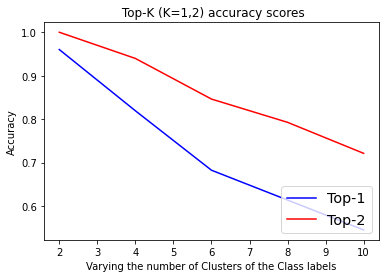

<Figure size 432x288 with 0 Axes>

In [ ]:
#Tag Clustering using Agglomerative and K-medoids Clustering  (Clustering classes)
import sys
import matplotlib.pyplot as plt
from numpy.ma.core import mean
from sentence_transformers import SentenceTransformer
from sklearn.cluster import KMeans
import sys
from sentence_transformers import SentenceTransformer
from sklearn.cluster import AgglomerativeClustering
import numpy as np
from sentence_transformers import SentenceTransformer
from sklearn.cluster import KMeans
from sentence_transformers import SentenceTransformer
from sklearn.cluster import AgglomerativeClustering
import numpy as np
import operator
from sklearn.metrics.pairwise import cosine_similarity,cosine_distances
import sys
from scipy import spatial
from sklearn_extra.cluster import KMedoids
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity,cosine_distances

import math
import sys
import random
import operator
from sentence_transformers import SentenceTransformer
from sklearn.cluster import KMeans
from sentence_transformers import SentenceTransformer
from sklearn.cluster import AgglomerativeClustering
import numpy as np
from sentence_transformers import SentenceTransformer
from sklearn.cluster import KMeans
from sentence_transformers import SentenceTransformer
from sklearn.cluster import AgglomerativeClustering
import numpy as np
from scipy import spatial
import random   


def labe_cl(n):
            #Unique Tag list
            embedder = SentenceTransformer('all-MiniLM-L12-v2')
            tagu=[]
            tagu1=[]
            stt=[]
            sent=[]
            relation_sent=[]
            for  sz in rttext_tag3:
                    s=''
                    gh=[]
                    for vb in rttext_tag3[sz]:
                        #if vb not in stt:
                            # s=str(vb)+" "+sz
                            #if vb not in tagu1:
                                #gh.append(vb)
                                #tagu1.append(vb)
                            #gh.append(sz)
                            s=s+str(vb)+" "+str(sz)+" "
                            relation_sent.append(s)
                            if vb not in gh:
                                    gh.append(vb)
                            if vb not in stt:
                                    stt.append(vb)
                            vb1=sz.split()
                            for zx in vb1:
                                    if zx not in gh:
                                        gh.append(zx)
                            sent.append(gh)
                            
            ds=set(stt)
            for kk in ds:
                tagu.append(kk)
           # print(len(tagu))
            for tt in tagu:
                pass

            corpus =tagu#tagss# tagu
            crp_txt={}
            corpus_embeddings = embedder.encode(corpus)
            for sentence, embedding in zip(tagu, corpus_embeddings):
                lst=embedding.tolist()
                crp_txt[sentence]=lst
            vectorizer = TfidfVectorizer()
            X = vectorizer.fit_transform(corpus)

            num_clusters=n #{‘random’, ‘heuristic’, ‘k-medoids++’, ‘build’
            kmedoids = KMedoids(n_clusters=num_clusters,metric='cosine', method='alternate',init='k-medoids++', max_iter=500000, random_state=1).fit(X)
            cluster_assignment,cn=kmedoids.labels_,kmedoids.cluster_centers_

            clustered_sentences = {}
            clustered_sentences1 = {}
            for sentence_id, cluster_id in enumerate(cluster_assignment):
                if cluster_id not in clustered_sentences:
                    clustered_sentences[cluster_id] = []
                    clustered_sentences1[cluster_id] = []
                if corpus[sentence_id] in tagu:
                        clustered_sentences[cluster_id].append(corpus[sentence_id])
                if len(vectorizer.inverse_transform(cn[cluster_id])[0])==2:
                    gh=str(vectorizer.inverse_transform(cn[cluster_id])[0][0])+"-"+str(vectorizer.inverse_transform(cn[cluster_id])[0][1])
                
                    if gh not in clustered_sentences1[cluster_id]:
                        clustered_sentences1[cluster_id].append(gh)
                    
                if len(vectorizer.inverse_transform(cn[cluster_id])[0])==1:
                    for vv in vectorizer.inverse_transform(cn[cluster_id])[0]:
                        if vv not in clustered_sentences1[cluster_id]:
                                clustered_sentences1[cluster_id].append(vv)
                    
            final_clut1=clustered_sentences


            final_cluh={}
            for kk in final_clut1:
                    final_cluh[kk]=clustered_sentences1[kk]
            '''
            final_cluh={}
            for kk in final_clut1:
                gh=[]
                if len(final_clut1[kk])%2==0:
                        pp=len(final_clut1[kk])//2
                        #gh.append(final_clut1[kk][pp-1])
                        gh.append(final_clut1[kk][pp])
                        final_cluh[kk]=gh         
                elif len(final_clut1[kk])%2!=0:
                        pp=len(final_clut1[kk])//2
                        gh.append(final_clut1[kk][pp])
                        final_cluh[kk]=gh

            '''
            for t in final_clut1:
               pass# print(final_cluh[t])
            #Re-assigning the labels 

            embedder = SentenceTransformer('all-MiniLM-L12-v2')


            #final_cluh={}
            rttext_tagh1={}
            rttext_tagh={}
            cc=0
            mptxt={}
            rttag={}
            allid=[]
            truhh=[]
            vbb=[]

            from sklearn.metrics.pairwise import cosine_similarity,cosine_distances
            import numpy as np
            for kk in final_clut1:
                for vz in rttext_tag3:
                    ggh=[]
                    ggh0=[]
                    ggh1=[]
                    ggh11=[]
                    ggh111=[]
                    c=0
                    #corpus_embeddings = embedder.encode(vz)
                    for zx in rttext_tag3[vz]:
                        if zx in final_clut1[kk]:
                            for vb3 in final_cluh[kk]:
                                #if vb3 in sametopic_rl:
                                    #if vz in sametopic_rl[vb3]:
                                            if vb3 not in ggh:
                                                ggh.append(vb3)
                                    #else:
                                        #continue
                            if len(ggh)>0:
                                rttext_tagh1[vz]=ggh
                            break
                        else:
                            continue
                    

            jj=[]
            for vv in rttext_tagh1:
                for jk in rttext_tagh1[vv]:
                    if jk not in jj:
                        jj.append(jk)
            #print(len(jj),len(rttext_tagh1))
            # Clustering the text with pre-processed labels
            snt=[]
            rttext_tagh={}


            truhh=[]
            for jj in rttext_tagh1:
                snt.append(jj)



            embedder = SentenceTransformer('all-MiniLM-L12-v2')#('all-distilroberta-v1')#('all-MiniLM-L12-v2')#('all-distilroberta-v1')#('all-MiniLM-L12-v2')
            # Corpus with example sentences
            corpus = snt
            corpus_embeddings = embedder.encode(corpus)

            #num_clusters = 10

            # Normalize the embeddings to unit length
            corpus_embeddings = corpus_embeddings /  np.linalg.norm(corpus_embeddings, axis=1, keepdims=True)

            # Perform Agglomerative clustering
            clustering_model = AgglomerativeClustering(n_clusters=None,distance_threshold=4.5) #, affinity='cosine', linkage='average', distance_threshold=0.4)
            clustering_model.fit(corpus_embeddings)
            cluster_assignment,dis = clustering_model.labels_,clustering_model.distances_
            #print(dis)
            clustered_sentences = {}
            for sentence_id, cluster_id in enumerate(cluster_assignment):
                if cluster_id not in clustered_sentences:
                    clustered_sentences[cluster_id] = []

                clustered_sentences[cluster_id].append(corpus[sentence_id])
            final_clut11={}

            for i, cluster in clustered_sentences.items():
                cls=[]
                vc=0
                #f len(cluster)>=10:
                for kk in cluster:
                 if vc<100:
                    if kk not in cls:
                        cls.append(kk)
                        vc=vc+1
                final_clut11[i]=cls
                #print(cluster[0])

                #print("Cluster ", i+1)
                #print(cluster)
                #print("")
            cln=0
            final_clut2={}

            for tt in final_clut11:  
                    if len(final_clut11[tt])>=10:
                    
                            final_clut2[cln]=final_clut11[tt]
                            cln=cln+1
                        # vc=vc+1
            print(len(final_clut2))
            return final_clut2,rttext_tagh1


#Clusteredtext with pre-processed labels

def lb_txt_cl(final_clut2,rttext_tagh1):
            test={}
            def tagcls_only_cls():
                            rttext_tagh={}     
                            truhh=[]  
                            #tt=random.randint(0,len(final_clut2)-1)

                            for vv in final_clut2[tt11]:
                                                if vv not in rttext_tagh:
                                                    rttext_tagh[vv]=rttext_tagh1[vv]
                            tr=[]
                            for tt in rttext_tagh:
                                #print(rttext_tagh[tt][0])
                                if rttext_tagh[tt][0] not in tr:
                                    tr.append(rttext_tagh[tt][0])
                            s=set(tr)
                            for bb in s:
                                truhh.append(bb)
                            print("Cluster: "+str(tt11))
                            print(len(truhh),len(rttext_tagh))

                            #Accuracy Computation

                            #multi tag

                            from transformers import AutoModelForSequenceClassification, AutoTokenizer
                            import numpy as np
                            import operator
                            import matplotlib.pyplot as plt
                            from transformers import pipeline
                            from pylab import rcParams
                            import sys 
                            import nltk
                            import re
                            import operator
                            #from transformers_interpret import ZeroShotClassificationExplainer
                            zero_shot_classifier = pipeline("zero-shot-classification")#,model='roberta-large-mnli')#model='facebook/bart-large-mnli')#,model='Recognai/zeroshot_selectra_medium')#,model='facebook/bart-large-mnli')
                            #tokenizer = AutoTokenizer.from_pretrained("Recognai/zeroshot_selectra_medium")#("facebook/bart-base-mnli")#("Recognai/zeroshot_selectra_medium")
                            #model = AutoModelForSequenceClassification.from_pretrained("Recognai/zeroshot_selectra_medium")#("facebook/bart-base-mnli")#("Recognai/zeroshot_selectra_medium")
                            #zero_shot_explainer = ZeroShotClassificationExplainer(model, tokenizer)
                            cn=0
                            txt_lbp={}
                            ocl_di={}
                            pred_l={}
                            ocl_dia={}
                            pred_lnk={}
                            ocl_dnk={}
                            pred_tk={}
                            ocl_tk={}
                            all_txt_label_score={}
                            all_txt_label_rank={}

                            # Zero-shot Classification
                            def review_explain(text):
                                    result = zero_shot_classifier(sequences =text,candidate_labels =truhh ,multi_label=True)
                                    
                                    return result['labels'],result['scores']

                            for tt in rttext_tagh:
                                mpd={}
                                nlb=[]
                                mpd_nk={}
                                mpd_tk={}
                                nlb_tk=[]
                                nlb_nk=[]
                                rn={}
                                rsc={}
                                clas,score= review_explain(tt)
                            
                                for bb in range(0,len(clas)):
                                    rsc[clas[bb]]=score[bb]
                                for bb in range(0,len(clas)):
                                    rn[clas[bb]]=bb+1
                                all_txt_label_score[tt]=rsc
                                all_txt_label_rank[tt]=rn
                                for k1 in rttext_tagh[tt]:
                                        for t3 in range(0,len(clas)):
                                            if str(clas[t3])==str(k1):
                                                mpd[k1]=score[t3]
                                for k1 in rttext_tagh[tt]:
                                        for t3 in range(0,len(clas)):
                                            if str(clas[t3])!=str(k1):
                                                if score[t3]>0.5:
                                                    mpd_nk[k1]=score[t3]
                                for k1 in rttext_tagh[tt]:
                                        for t3 in range(0,len(clas)):
                                            if str(clas[t3])==str(k1):
                                                if score[t3]>0.5:
                                                    mpd_tk[k1]=score[t3]
                                
                                dd=sorted(mpd.items(), key=operator.itemgetter(1),reverse=True)
                                dd1=sorted(mpd_nk.items(), key=operator.itemgetter(1),reverse=True)
                                dd2=sorted(mpd_tk.items(), key=operator.itemgetter(1),reverse=True)
                                
                                for zz in dd:
                                    nlb.append(zz[0])
                                for zz1 in dd1:
                                    nlb_nk.append(zz1[0])
                                for zz2 in dd2:
                                    nlb_tk.append(zz2[0])
                                
                                pred_lnk[tt]=nlb_nk #ranked list of the non-original labels has pribability greater than 50%
                                pred_tk[tt]=nlb_tk#ranked list of the original labels has pribability greater than and equal 90% and appear in top N labels
                                ocl_di[tt]=nlb[0:1]#single label with the highest score of the original label
                                ocl_dia[tt]=nlb#ranked list of the original label
                                

                                txt_lbp[tt]=clas[0:10]
                                pred_l[tt]=clas
                                #test[tt11]=

                            '''
                            Comparing average rank of the predicted original labels with that of it ideal rank positon
                            Coounting the number of non-original labels that have higher probability scores than that of original labels per text

                            '''
                            # average rank
                            ccc=0
                            KK=3 # number of top predicted non-original labels

                            per_txt_ori_rank_cmp={}
                            per_txt_ori_score_avg={}
                            per_txt_nonori_rank_cmp={}
                            per_txt_nonori_pred_rank_avg={}
                            per_txt_nonori_ori_rank_avg={}
                            per_txt_nonori_score_avg={}
                            per_txt_ori_pred_rank_avg={}
                            per_txt_ori_ori_rank_avg={}
                            per_txt_nonori_top_n={}


                            for v in all_txt_label_score:
                            #if v in rttext_tagh:
                                orn=(len(rttext_tagh[v])+1)/2 # Ideal average rank position
                                s=0
                                sc=0
                                cz=0
                                nr=[]
                                sno=0
                                snosc=0
                                for kz in all_txt_label_rank[v]:
                                    if kz not in rttext_tagh[v]:
                                        if cz<KK:
                                                if kz not in nr:
                                                        nr.append(kz)
                                                        #print(kz,rttext_tagu[v],all_txt_label_rank[v][kz],all_txt_label_score[v][kz])
                                                        sno=sno+float(all_txt_label_rank[v][kz])
                                                        snosc=snosc+float(all_txt_label_score[v][kz])
                                                        cz=cz+1
                                #print("\n")
                                per_txt_nonori_top_n[v]=nr
                                per_txt_nonori_rank_cmp[v]=sno/KK
                                per_txt_nonori_score_avg[v]=snosc/KK

                                for kz in all_txt_label_rank[v]:
                                    if kz in rttext_tagh[v]:
                                        s=s+float(all_txt_label_rank[v][kz])
                                        sc=sc+float(all_txt_label_score[v][kz])
                            
                                prn=s/len(rttext_tagh[v])
                                per_txt_ori_score_avg[v]=sc/len(rttext_tagh[v])
                                per_txt_ori_pred_rank_avg[v]=prn
                                per_txt_ori_ori_rank_avg[v]=orn
                                #print(prn,orn)
                                dif=abs(prn-orn)
                                per_txt_ori_rank_cmp[v]=dif
                                if dif<=0.0:
                                    ccc=ccc+1
                            print("Number of texts where the position of the original labels preserved after prediction")
                            print(ccc,len(txt_lbp))
                            print("Percentage of texts where the position of the original labels preserved after prediction")
                            print(ccc/len(txt_lbp))


                            # average scores

                            vvv=0
                            for jj in per_txt_ori_score_avg:
                                if per_txt_nonori_score_avg[jj]>per_txt_ori_score_avg[jj]:
                                            vvv=vvv+1

                            print("Number of non-original labels have higher prediction acores than original labels after prediction")
                            nmmm=vvv     
                            print(vvv)
                            #if tt11==1:
                            # for kk in txt_lbp:
                                #  pass#print(kk,txt_lbp[kk],rttext_tagh[kk])

                            '''
                            Accuracy for the clustered labels
                            '''
                            correct_txt_true_pred=[]
                            def topps(n):
                                            cc=0
                                            vb1=0
                                            for tt in txt_lbp:
                                                    #if vb1 < 1000:
                                                            #vb1=vb1+1 
                                                            try:
                                                                for vb in txt_lbp[tt][0:n]:
                                                                        #print(rttext_tagh[tt][0],vb)
                                                                        if vb in rttext_tagh[tt][0:n]:
                                                                        #if str(vb) ==str(rttext_tagh[tt][0]):
                                                                            cc=cc+1
                                                                            if tt not in correct_txt_true_pred:
                                                                                        correct_txt_true_pred.append(tt)
                                                                            break
                                                                        else:
                                                                            continue

                                                            except:
                                                                continue
                                                            
                                            #txt_lbp
                                            print("Top_"+str(n)+ " Prediction Score: ")
                                            print(cc/len(txt_lbp))
                                            ac=cc/len(txt_lbp)
                                            return ac
                            top=3
                            scc=[]
                            for zz in range(1,top+1):
                                ac=topps(zz)
                                scc.append(ac)
                            return nmmm,scc,per_txt_nonori_score_avg,per_txt_ori_score_avg,correct_txt_true_pred,per_txt_ori_pred_rank_avg,per_txt_ori_ori_rank_avg
                                
                                

            rand_acc={}
            rand_pscr_nonlb={}
            rand_pscr_orlb={}
            rand_predi_rank_orlb={}
            rand_ori_rank_orlb={}
            correct_txt_true_p={}
            count_percl_hosctxt={}
            count_percl_txt={}
            for tt11 in  final_clut2:
                nmmm,scc,per_txt_nonori_score_avg,per_txt_ori_score_avg,correct_txt_true_pred,per_txt_ori_pred_rank_avg,per_txt_ori_ori_rank_avg=tagcls_only_cls()
                rand_acc[tt11]=scc
                rand_pscr_nonlb[tt11]=per_txt_nonori_score_avg
                rand_pscr_orlb[tt11]=per_txt_ori_score_avg
                correct_txt_true_p[tt11]=correct_txt_true_pred
                rand_predi_rank_orlb[tt11]=per_txt_ori_pred_rank_avg
                rand_ori_rank_orlb[tt11]=per_txt_ori_ori_rank_avg
                count_percl_hosctxt[tt11]=nmmm
                count_percl_txt[tt11]=len(final_clut2[tt11])
                print("\n\n")
            return rand_acc,rand_pscr_nonlb,rand_pscr_orlb,rand_predi_rank_orlb,rand_ori_rank_orlb,count_percl_hosctxt,count_percl_txt









s=[]
b=[]
noc=[]
oc=[]

for j in range(2,11,2):
      print("cluster"+str(j)+"\n")
      final_clut2,rttext_tagh1=labe_cl(j)
      rand_acc,rand_pscr_nonlb,rand_pscr_orlb,rand_predi_rank_orlb,rand_ori_rank_orlb,count_percl_hosctxt,count_percl_txt=lb_txt_cl(final_clut2,rttext_tagh1)
      vr_t1=[]
      vr_t2=[]
      vr_t3=[]
      for kk in rand_acc:
            vr_t1.append(rand_acc[kk][0])
            vr_t2.append(rand_acc[kk][1])
            vr_t3.append(rand_acc[kk][2])
      non=[]
      for vv in rand_pscr_nonlb:
          s1=0
          for kk in rand_pscr_nonlb[vv]:
              #s1=0
              #for tx in rand_pscr_nonlb[vv][kk]:
              s1=s1+rand_pscr_nonlb[vv][kk]
          sv=s1/len(rand_pscr_nonlb[vv])
          non.append(sv)
      sv1=mean(non)
      noc.append(sv1)
      on=[]
      for vv in rand_pscr_orlb:
          s5=0
          for kk in rand_pscr_orlb[vv]:
              #s11=0
              #for tx in rand_pscr_orlb[vv][kk]:
                  s5=s5+rand_pscr_orlb[vv][kk]
          sv2=s5/len(rand_pscr_orlb[vv])
          on.append(sv2)
      sv3=mean(on)
      oc.append(sv3)


      vb1=mean(vr_t1)
      s.append(vb1)
      vb2=mean(vr_t2)
      b.append(vb2)
        

# Drawing Varying the cluster of the class labels  keeping the clusters of texts fixed to 40



#vr_t1=s
#vr_t2=b


'''
Accuracy
'''


#Geb_b30 = nri#[11, 10, 12, 14, 16, 19, 17, 14, 18, 17]
#years_b30 = range(0,len(nri))
#Geb_a30 = ori#[12, 10, 13, 14, 12, 13, 18, 16,0,0]
#years_a30 = range(0,len(ori))
#print(len(vr_t1))
years_a31 = range(2,11,2)

fig, ax = plt.subplots()
ax.plot(years_a31, s, label='Top-1', color='blue')
ax.plot(years_a31,b, label='Top-2', color = 'red')
#ax.plot(years_a31,vr_t3, label='Top-3', color = 'green')
legend = ax.legend(loc='lower right', fontsize='x-large')
plt.xlabel('Varying the number of Clusters of the Class labels')
plt.ylabel('Accuracy')
plt.title(' Top-K (K=1,2) accuracy scores')
plt.show()
plt.savefig("Variation_cluster_labels.pdf")







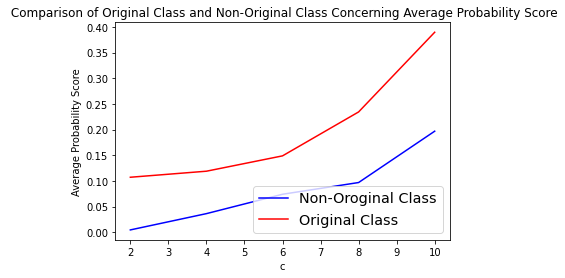

<Figure size 432x288 with 0 Axes>

In [ ]:
# Average score of non-original and original  varying cluster  of classes

years_a31 = range(2,11,2)

fig, ax = plt.subplots()
ax.plot(years_a31,noc, label='Non-Oroginal Class', color='blue')
ax.plot(years_a31,oc, label='Original Class', color = 'red')
#ax.plot(years_a31,vr_t3, label='Top-3', color = 'green')
legend = ax.legend(loc='lower right', fontsize='x-large')
plt.xlabel('c')
plt.ylabel('Average Probability Score')
plt.title(' Comparison of Original Class and Non-Original Class Concerning Average Probability Score')
plt.show()
plt.savefig("Variation_cluster_labels_probability score.pdf")

# Varying the number of clusters of the class labels results

In [ ]:
# Varying the number of clusters of the class labels
print("Top-1 ")
print(s)
print("Top-2 ")
print(b)
print("Probability Scores of the non-original labels")
print(noc)
print("Probability Scores of the original labels")
print(oc)
#accuracy
top1=[0.960186741363212, 0.8192005642836847, 0.6823846060163197, 0.6136588113506273, 0.5449648845045264]
top2=[1.0, 0.9396772622092315, 0.8461643932935494, 0.7926212803962166, 0.7212272155238908]
#avg score
noc=[0.0036356163185144656, 0.02318113055891914, 0.07288315171000227, 0.10202097218621922, 0.1597067615109478]
oc=[0.17844222727566195, 0.17674304836490043, 0.24827196253852168, 0.35157931419687255, 0.3910365437896627]

[0.960186741363212, 0.8192005642836847, 0.6823846060163197, 0.6136588113506273, 0.5449648845045264]
[1.0, 0.9396772622092315, 0.8461643932935494, 0.7926212803962166, 0.7212272155238908]
[0.0036356163185144656, 0.02318113055891914, 0.07288315171000227, 0.10202097218621922, 0.1597067615109478]
[0.17844222727566195, 0.17674304836490043, 0.24827196253852168, 0.35157931419687255, 0.3910365437896627]


# Here we have varied the number of clusters of the texts keeping the number of clusters of the class labels fixed. 

cluster 8



No model was supplied, defaulted to facebook/bart-large-mnli and revision c626438 (https://huggingface.co/facebook/bart-large-mnli).
Using a pipeline without specifying a model name and revision in production is not recommended.


11
Cluster: 0
1 100


No model was supplied, defaulted to facebook/bart-large-mnli and revision c626438 (https://huggingface.co/facebook/bart-large-mnli).
Using a pipeline without specifying a model name and revision in production is not recommended.


Number of texts where the position of the original labels preserved after prediction
100 100
Percentage of texts where the position of the original labels preserved after prediction
1.0
Number of non-original labels have higher prediction acores than original labels after prediction
0
Top_1 Prediction Score: 
1.0
Top_2 Prediction Score: 
1.0
Top_3 Prediction Score: 
1.0



Cluster: 1
1 100
Number of texts where the position of the original labels preserved after prediction
100 100
Percentage of texts where the position of the original labels preserved after prediction
1.0
Number of non-original labels have higher prediction acores than original labels after prediction
0
Top_1 Prediction Score: 
1.0
Top_2 Prediction Score: 
1.0
Top_3 Prediction Score: 
1.0


No model was supplied, defaulted to facebook/bart-large-mnli and revision c626438 (https://huggingface.co/facebook/bart-large-mnli).
Using a pipeline without specifying a model name and revision in production is not recommended.





Cluster: 2
1 100
Number of texts where the position of the original labels preserved after prediction
100 100
Percentage of texts where the position of the original labels preserved after prediction
1.0
Number of non-original labels have higher prediction acores than original labels after prediction
0
Top_1 Prediction Score: 
1.0
Top_2 Prediction Score: 
1.0
Top_3 Prediction Score: 
1.0


No model was supplied, defaulted to facebook/bart-large-mnli and revision c626438 (https://huggingface.co/facebook/bart-large-mnli).
Using a pipeline without specifying a model name and revision in production is not recommended.





Cluster: 3
2 100
Number of texts where the position of the original labels preserved after prediction
33 100
Percentage of texts where the position of the original labels preserved after prediction
0.33
Number of non-original labels have higher prediction acores than original labels after prediction
42
Top_1 Prediction Score: 
0.33
Top_2 Prediction Score: 
1.0
Top_3 Prediction Score: 
1.0



Cluster: 4


No model was supplied, defaulted to facebook/bart-large-mnli and revision c626438 (https://huggingface.co/facebook/bart-large-mnli).
Using a pipeline without specifying a model name and revision in production is not recommended.


1 100
Number of texts where the position of the original labels preserved after prediction
100 100
Percentage of texts where the position of the original labels preserved after prediction
1.0
Number of non-original labels have higher prediction acores than original labels after prediction
0
Top_1 Prediction Score: 
1.0
Top_2 Prediction Score: 
1.0
Top_3 Prediction Score: 
1.0


No model was supplied, defaulted to facebook/bart-large-mnli and revision c626438 (https://huggingface.co/facebook/bart-large-mnli).
Using a pipeline without specifying a model name and revision in production is not recommended.





Cluster: 5
1 100
Number of texts where the position of the original labels preserved after prediction
100 100
Percentage of texts where the position of the original labels preserved after prediction
1.0
Number of non-original labels have higher prediction acores than original labels after prediction
0
Top_1 Prediction Score: 
1.0
Top_2 Prediction Score: 
1.0
Top_3 Prediction Score: 
1.0


No model was supplied, defaulted to facebook/bart-large-mnli and revision c626438 (https://huggingface.co/facebook/bart-large-mnli).
Using a pipeline without specifying a model name and revision in production is not recommended.





Cluster: 6
1 100
Number of texts where the position of the original labels preserved after prediction
100 100
Percentage of texts where the position of the original labels preserved after prediction
1.0
Number of non-original labels have higher prediction acores than original labels after prediction
0
Top_1 Prediction Score: 
1.0
Top_2 Prediction Score: 
1.0
Top_3 Prediction Score: 
1.0


No model was supplied, defaulted to facebook/bart-large-mnli and revision c626438 (https://huggingface.co/facebook/bart-large-mnli).
Using a pipeline without specifying a model name and revision in production is not recommended.





Cluster: 7
1 100
Number of texts where the position of the original labels preserved after prediction
100 100
Percentage of texts where the position of the original labels preserved after prediction
1.0
Number of non-original labels have higher prediction acores than original labels after prediction
0
Top_1 Prediction Score: 
1.0
Top_2 Prediction Score: 
1.0
Top_3 Prediction Score: 
1.0


No model was supplied, defaulted to facebook/bart-large-mnli and revision c626438 (https://huggingface.co/facebook/bart-large-mnli).
Using a pipeline without specifying a model name and revision in production is not recommended.





Cluster: 8
1 100
Number of texts where the position of the original labels preserved after prediction
100 100
Percentage of texts where the position of the original labels preserved after prediction
1.0
Number of non-original labels have higher prediction acores than original labels after prediction
0
Top_1 Prediction Score: 
1.0
Top_2 Prediction Score: 
1.0
Top_3 Prediction Score: 
1.0




No model was supplied, defaulted to facebook/bart-large-mnli and revision c626438 (https://huggingface.co/facebook/bart-large-mnli).
Using a pipeline without specifying a model name and revision in production is not recommended.



Cluster: 9
2 100
Number of texts where the position of the original labels preserved after prediction
23 100
Percentage of texts where the position of the original labels preserved after prediction
0.23
Number of non-original labels have higher prediction acores than original labels after prediction
57
Top_1 Prediction Score: 
0.23
Top_2 Prediction Score: 
1.0
Top_3 Prediction Score: 
1.0


No model was supplied, defaulted to facebook/bart-large-mnli and revision c626438 (https://huggingface.co/facebook/bart-large-mnli).
Using a pipeline without specifying a model name and revision in production is not recommended.





Cluster: 10
2 100
Number of texts where the position of the original labels preserved after prediction
49 100
Percentage of texts where the position of the original labels preserved after prediction
0.49
Number of non-original labels have higher prediction acores than original labels after prediction
22
Top_1 Prediction Score: 
0.49
Top_2 Prediction Score: 
1.0
Top_3 Prediction Score: 
1.0



cluster 7



No model was supplied, defaulted to facebook/bart-large-mnli and revision c626438 (https://huggingface.co/facebook/bart-large-mnli).
Using a pipeline without specifying a model name and revision in production is not recommended.


14
Cluster: 0
1 100
Number of texts where the position of the original labels preserved after prediction
100 100
Percentage of texts where the position of the original labels preserved after prediction
1.0
Number of non-original labels have higher prediction acores than original labels after prediction
0
Top_1 Prediction Score: 
1.0
Top_2 Prediction Score: 
1.0
Top_3 Prediction Score: 
1.0


No model was supplied, defaulted to facebook/bart-large-mnli and revision c626438 (https://huggingface.co/facebook/bart-large-mnli).
Using a pipeline without specifying a model name and revision in production is not recommended.





Cluster: 1
1 100


No model was supplied, defaulted to facebook/bart-large-mnli and revision c626438 (https://huggingface.co/facebook/bart-large-mnli).
Using a pipeline without specifying a model name and revision in production is not recommended.


Number of texts where the position of the original labels preserved after prediction
100 100
Percentage of texts where the position of the original labels preserved after prediction
1.0
Number of non-original labels have higher prediction acores than original labels after prediction
0
Top_1 Prediction Score: 
1.0
Top_2 Prediction Score: 
1.0
Top_3 Prediction Score: 
1.0



Cluster: 2
1 100
Number of texts where the position of the original labels preserved after prediction
100 100
Percentage of texts where the position of the original labels preserved after prediction
1.0
Number of non-original labels have higher prediction acores than original labels after prediction
0
Top_1 Prediction Score: 
1.0
Top_2 Prediction Score: 
1.0
Top_3 Prediction Score: 
1.0





No model was supplied, defaulted to facebook/bart-large-mnli and revision c626438 (https://huggingface.co/facebook/bart-large-mnli).
Using a pipeline without specifying a model name and revision in production is not recommended.


Cluster: 3
2 100
Number of texts where the position of the original labels preserved after prediction
33 100
Percentage of texts where the position of the original labels preserved after prediction
0.33
Number of non-original labels have higher prediction acores than original labels after prediction
42
Top_1 Prediction Score: 
0.33
Top_2 Prediction Score: 
1.0
Top_3 Prediction Score: 
1.0


No model was supplied, defaulted to facebook/bart-large-mnli and revision c626438 (https://huggingface.co/facebook/bart-large-mnli).
Using a pipeline without specifying a model name and revision in production is not recommended.





Cluster: 4
1 100
Number of texts where the position of the original labels preserved after prediction
100 100
Percentage of texts where the position of the original labels preserved after prediction
1.0
Number of non-original labels have higher prediction acores than original labels after prediction
0
Top_1 Prediction Score: 
1.0
Top_2 Prediction Score: 
1.0
Top_3 Prediction Score: 
1.0


No model was supplied, defaulted to facebook/bart-large-mnli and revision c626438 (https://huggingface.co/facebook/bart-large-mnli).
Using a pipeline without specifying a model name and revision in production is not recommended.





Cluster: 5
1 100
Number of texts where the position of the original labels preserved after prediction
100 100
Percentage of texts where the position of the original labels preserved after prediction
1.0
Number of non-original labels have higher prediction acores than original labels after prediction
0
Top_1 Prediction Score: 
1.0
Top_2 Prediction Score: 
1.0
Top_3 Prediction Score: 
1.0


No model was supplied, defaulted to facebook/bart-large-mnli and revision c626438 (https://huggingface.co/facebook/bart-large-mnli).
Using a pipeline without specifying a model name and revision in production is not recommended.





Cluster: 6
1 100
Number of texts where the position of the original labels preserved after prediction
100 100
Percentage of texts where the position of the original labels preserved after prediction
1.0
Number of non-original labels have higher prediction acores than original labels after prediction
0
Top_1 Prediction Score: 
1.0
Top_2 Prediction Score: 
1.0
Top_3 Prediction Score: 
1.0


No model was supplied, defaulted to facebook/bart-large-mnli and revision c626438 (https://huggingface.co/facebook/bart-large-mnli).
Using a pipeline without specifying a model name and revision in production is not recommended.





Cluster: 7
1 100
Number of texts where the position of the original labels preserved after prediction
100 100
Percentage of texts where the position of the original labels preserved after prediction
1.0
Number of non-original labels have higher prediction acores than original labels after prediction
0
Top_1 Prediction Score: 
1.0
Top_2 Prediction Score: 
1.0
Top_3 Prediction Score: 
1.0


No model was supplied, defaulted to facebook/bart-large-mnli and revision c626438 (https://huggingface.co/facebook/bart-large-mnli).
Using a pipeline without specifying a model name and revision in production is not recommended.





Cluster: 8
1 100
Number of texts where the position of the original labels preserved after prediction
100 100
Percentage of texts where the position of the original labels preserved after prediction
1.0
Number of non-original labels have higher prediction acores than original labels after prediction
0
Top_1 Prediction Score: 
1.0
Top_2 Prediction Score: 
1.0
Top_3 Prediction Score: 
1.0


No model was supplied, defaulted to facebook/bart-large-mnli and revision c626438 (https://huggingface.co/facebook/bart-large-mnli).
Using a pipeline without specifying a model name and revision in production is not recommended.





Cluster: 9
1 100


No model was supplied, defaulted to facebook/bart-large-mnli and revision c626438 (https://huggingface.co/facebook/bart-large-mnli).
Using a pipeline without specifying a model name and revision in production is not recommended.


Number of texts where the position of the original labels preserved after prediction
100 100
Percentage of texts where the position of the original labels preserved after prediction
1.0
Number of non-original labels have higher prediction acores than original labels after prediction
0
Top_1 Prediction Score: 
1.0
Top_2 Prediction Score: 
1.0
Top_3 Prediction Score: 
1.0



Cluster: 10
1 100
Number of texts where the position of the original labels preserved after prediction
100 100
Percentage of texts where the position of the original labels preserved after prediction
1.0
Number of non-original labels have higher prediction acores than original labels after prediction
0
Top_1 Prediction Score: 
1.0
Top_2 Prediction Score: 
1.0
Top_3 Prediction Score: 
1.0


No model was supplied, defaulted to facebook/bart-large-mnli and revision c626438 (https://huggingface.co/facebook/bart-large-mnli).
Using a pipeline without specifying a model name and revision in production is not recommended.





Cluster: 11
2 100
Number of texts where the position of the original labels preserved after prediction
23 100
Percentage of texts where the position of the original labels preserved after prediction
0.23
Number of non-original labels have higher prediction acores than original labels after prediction
57
Top_1 Prediction Score: 
0.23
Top_2 Prediction Score: 
1.0
Top_3 Prediction Score: 
1.0


No model was supplied, defaulted to facebook/bart-large-mnli and revision c626438 (https://huggingface.co/facebook/bart-large-mnli).
Using a pipeline without specifying a model name and revision in production is not recommended.





Cluster: 12
1 100


No model was supplied, defaulted to facebook/bart-large-mnli and revision c626438 (https://huggingface.co/facebook/bart-large-mnli).
Using a pipeline without specifying a model name and revision in production is not recommended.


Number of texts where the position of the original labels preserved after prediction
100 100
Percentage of texts where the position of the original labels preserved after prediction
1.0
Number of non-original labels have higher prediction acores than original labels after prediction
0
Top_1 Prediction Score: 
1.0
Top_2 Prediction Score: 
1.0
Top_3 Prediction Score: 
1.0



Cluster: 13
2 100
Number of texts where the position of the original labels preserved after prediction
49 100
Percentage of texts where the position of the original labels preserved after prediction
0.49
Number of non-original labels have higher prediction acores than original labels after prediction
22
Top_1 Prediction Score: 
0.49
Top_2 Prediction Score: 
1.0
Top_3 Prediction Score: 
1.0



cluster 6



No model was supplied, defaulted to facebook/bart-large-mnli and revision c626438 (https://huggingface.co/facebook/bart-large-mnli).
Using a pipeline without specifying a model name and revision in production is not recommended.


19
Cluster: 0
1 100


No model was supplied, defaulted to facebook/bart-large-mnli and revision c626438 (https://huggingface.co/facebook/bart-large-mnli).
Using a pipeline without specifying a model name and revision in production is not recommended.


Number of texts where the position of the original labels preserved after prediction
100 100
Percentage of texts where the position of the original labels preserved after prediction
1.0
Number of non-original labels have higher prediction acores than original labels after prediction
0
Top_1 Prediction Score: 
1.0
Top_2 Prediction Score: 
1.0
Top_3 Prediction Score: 
1.0



Cluster: 1
1 100
Number of texts where the position of the original labels preserved after prediction
100 100
Percentage of texts where the position of the original labels preserved after prediction
1.0
Number of non-original labels have higher prediction acores than original labels after prediction
0
Top_1 Prediction Score: 
1.0
Top_2 Prediction Score: 
1.0
Top_3 Prediction Score: 
1.0


No model was supplied, defaulted to facebook/bart-large-mnli and revision c626438 (https://huggingface.co/facebook/bart-large-mnli).
Using a pipeline without specifying a model name and revision in production is not recommended.





Cluster: 2
1 100
Number of texts where the position of the original labels preserved after prediction
100 100
Percentage of texts where the position of the original labels preserved after prediction
1.0
Number of non-original labels have higher prediction acores than original labels after prediction
0
Top_1 Prediction Score: 
1.0
Top_2 Prediction Score: 
1.0
Top_3 Prediction Score: 
1.0


No model was supplied, defaulted to facebook/bart-large-mnli and revision c626438 (https://huggingface.co/facebook/bart-large-mnli).
Using a pipeline without specifying a model name and revision in production is not recommended.





Cluster: 3
2 100


No model was supplied, defaulted to facebook/bart-large-mnli and revision c626438 (https://huggingface.co/facebook/bart-large-mnli).
Using a pipeline without specifying a model name and revision in production is not recommended.


Number of texts where the position of the original labels preserved after prediction
33 100
Percentage of texts where the position of the original labels preserved after prediction
0.33
Number of non-original labels have higher prediction acores than original labels after prediction
42
Top_1 Prediction Score: 
0.33
Top_2 Prediction Score: 
1.0
Top_3 Prediction Score: 
1.0



Cluster: 4
1 100
Number of texts where the position of the original labels preserved after prediction
100 100
Percentage of texts where the position of the original labels preserved after prediction
1.0
Number of non-original labels have higher prediction acores than original labels after prediction
0
Top_1 Prediction Score: 
1.0
Top_2 Prediction Score: 
1.0
Top_3 Prediction Score: 
1.0


No model was supplied, defaulted to facebook/bart-large-mnli and revision c626438 (https://huggingface.co/facebook/bart-large-mnli).
Using a pipeline without specifying a model name and revision in production is not recommended.





Cluster: 5
1 100
Number of texts where the position of the original labels preserved after prediction
100 100
Percentage of texts where the position of the original labels preserved after prediction
1.0
Number of non-original labels have higher prediction acores than original labels after prediction
0
Top_1 Prediction Score: 
1.0
Top_2 Prediction Score: 
1.0
Top_3 Prediction Score: 
1.0



Cluster: 6
1 100


No model was supplied, defaulted to facebook/bart-large-mnli and revision c626438 (https://huggingface.co/facebook/bart-large-mnli).
Using a pipeline without specifying a model name and revision in production is not recommended.
No model was supplied, defaulted to facebook/bart-large-mnli and revision c626438 (https://huggingface.co/facebook/bart-large-mnli).
Using a pipeline without specifying a model name and revision in production is not recommended.


Number of texts where the position of the original labels preserved after prediction
100 100
Percentage of texts where the position of the original labels preserved after prediction
1.0
Number of non-original labels have higher prediction acores than original labels after prediction
0
Top_1 Prediction Score: 
1.0
Top_2 Prediction Score: 
1.0
Top_3 Prediction Score: 
1.0



Cluster: 7
1 100
Number of texts where the position of the original labels preserved after prediction
100 100
Percentage of texts where the position of the original labels preserved after prediction
1.0
Number of non-original labels have higher prediction acores than original labels after prediction
0
Top_1 Prediction Score: 
1.0
Top_2 Prediction Score: 
1.0
Top_3 Prediction Score: 
1.0


No model was supplied, defaulted to facebook/bart-large-mnli and revision c626438 (https://huggingface.co/facebook/bart-large-mnli).
Using a pipeline without specifying a model name and revision in production is not recommended.





Cluster: 8
1 100
Number of texts where the position of the original labels preserved after prediction
100 100
Percentage of texts where the position of the original labels preserved after prediction
1.0
Number of non-original labels have higher prediction acores than original labels after prediction
0
Top_1 Prediction Score: 
1.0
Top_2 Prediction Score: 
1.0
Top_3 Prediction Score: 
1.0


No model was supplied, defaulted to facebook/bart-large-mnli and revision c626438 (https://huggingface.co/facebook/bart-large-mnli).
Using a pipeline without specifying a model name and revision in production is not recommended.





Cluster: 9
1 100


No model was supplied, defaulted to facebook/bart-large-mnli and revision c626438 (https://huggingface.co/facebook/bart-large-mnli).
Using a pipeline without specifying a model name and revision in production is not recommended.


Number of texts where the position of the original labels preserved after prediction
100 100
Percentage of texts where the position of the original labels preserved after prediction
1.0
Number of non-original labels have higher prediction acores than original labels after prediction
0
Top_1 Prediction Score: 
1.0
Top_2 Prediction Score: 
1.0
Top_3 Prediction Score: 
1.0



Cluster: 10
1 100
Number of texts where the position of the original labels preserved after prediction
100 100
Percentage of texts where the position of the original labels preserved after prediction
1.0
Number of non-original labels have higher prediction acores than original labels after prediction
0
Top_1 Prediction Score: 
1.0
Top_2 Prediction Score: 
1.0
Top_3 Prediction Score: 
1.0


No model was supplied, defaulted to facebook/bart-large-mnli and revision c626438 (https://huggingface.co/facebook/bart-large-mnli).
Using a pipeline without specifying a model name and revision in production is not recommended.





Cluster: 11
1 100
Number of texts where the position of the original labels preserved after prediction
100 100
Percentage of texts where the position of the original labels preserved after prediction
1.0
Number of non-original labels have higher prediction acores than original labels after prediction
0
Top_1 Prediction Score: 
1.0
Top_2 Prediction Score: 
1.0
Top_3 Prediction Score: 
1.0


No model was supplied, defaulted to facebook/bart-large-mnli and revision c626438 (https://huggingface.co/facebook/bart-large-mnli).
Using a pipeline without specifying a model name and revision in production is not recommended.





Cluster: 12
1 100
Number of texts where the position of the original labels preserved after prediction
100 100
Percentage of texts where the position of the original labels preserved after prediction
1.0
Number of non-original labels have higher prediction acores than original labels after prediction
0
Top_1 Prediction Score: 
1.0
Top_2 Prediction Score: 
1.0
Top_3 Prediction Score: 
1.0


No model was supplied, defaulted to facebook/bart-large-mnli and revision c626438 (https://huggingface.co/facebook/bart-large-mnli).
Using a pipeline without specifying a model name and revision in production is not recommended.





Cluster: 13
1 100
Number of texts where the position of the original labels preserved after prediction
100 100
Percentage of texts where the position of the original labels preserved after prediction
1.0
Number of non-original labels have higher prediction acores than original labels after prediction
0
Top_1 Prediction Score: 
1.0
Top_2 Prediction Score: 
1.0
Top_3 Prediction Score: 
1.0


No model was supplied, defaulted to facebook/bart-large-mnli and revision c626438 (https://huggingface.co/facebook/bart-large-mnli).
Using a pipeline without specifying a model name and revision in production is not recommended.





Cluster: 14
1 100
Number of texts where the position of the original labels preserved after prediction
100 100
Percentage of texts where the position of the original labels preserved after prediction
1.0
Number of non-original labels have higher prediction acores than original labels after prediction
0
Top_1 Prediction Score: 
1.0
Top_2 Prediction Score: 
1.0
Top_3 Prediction Score: 
1.0


No model was supplied, defaulted to facebook/bart-large-mnli and revision c626438 (https://huggingface.co/facebook/bart-large-mnli).
Using a pipeline without specifying a model name and revision in production is not recommended.





Cluster: 15
1 100
Number of texts where the position of the original labels preserved after prediction
100 100
Percentage of texts where the position of the original labels preserved after prediction
1.0
Number of non-original labels have higher prediction acores than original labels after prediction
0
Top_1 Prediction Score: 
1.0
Top_2 Prediction Score: 
1.0
Top_3 Prediction Score: 
1.0


No model was supplied, defaulted to facebook/bart-large-mnli and revision c626438 (https://huggingface.co/facebook/bart-large-mnli).
Using a pipeline without specifying a model name and revision in production is not recommended.





Cluster: 16
2 100


No model was supplied, defaulted to facebook/bart-large-mnli and revision c626438 (https://huggingface.co/facebook/bart-large-mnli).
Using a pipeline without specifying a model name and revision in production is not recommended.


Number of texts where the position of the original labels preserved after prediction
23 100
Percentage of texts where the position of the original labels preserved after prediction
0.23
Number of non-original labels have higher prediction acores than original labels after prediction
57
Top_1 Prediction Score: 
0.23
Top_2 Prediction Score: 
1.0
Top_3 Prediction Score: 
1.0



Cluster: 17
1 100
Number of texts where the position of the original labels preserved after prediction
100 100
Percentage of texts where the position of the original labels preserved after prediction
1.0
Number of non-original labels have higher prediction acores than original labels after prediction
0
Top_1 Prediction Score: 
1.0
Top_2 Prediction Score: 
1.0
Top_3 Prediction Score: 
1.0


No model was supplied, defaulted to facebook/bart-large-mnli and revision c626438 (https://huggingface.co/facebook/bart-large-mnli).
Using a pipeline without specifying a model name and revision in production is not recommended.





Cluster: 18
2 100
Number of texts where the position of the original labels preserved after prediction
49 100
Percentage of texts where the position of the original labels preserved after prediction
0.49
Number of non-original labels have higher prediction acores than original labels after prediction
22
Top_1 Prediction Score: 
0.49
Top_2 Prediction Score: 
1.0
Top_3 Prediction Score: 
1.0



cluster 5



No model was supplied, defaulted to facebook/bart-large-mnli and revision c626438 (https://huggingface.co/facebook/bart-large-mnli).
Using a pipeline without specifying a model name and revision in production is not recommended.


35
Cluster: 0
1 100
Number of texts where the position of the original labels preserved after prediction
100 100
Percentage of texts where the position of the original labels preserved after prediction
1.0
Number of non-original labels have higher prediction acores than original labels after prediction
0
Top_1 Prediction Score: 
1.0
Top_2 Prediction Score: 
1.0
Top_3 Prediction Score: 
1.0


No model was supplied, defaulted to facebook/bart-large-mnli and revision c626438 (https://huggingface.co/facebook/bart-large-mnli).
Using a pipeline without specifying a model name and revision in production is not recommended.





Cluster: 1
1 100
Number of texts where the position of the original labels preserved after prediction
100 100
Percentage of texts where the position of the original labels preserved after prediction
1.0
Number of non-original labels have higher prediction acores than original labels after prediction
0
Top_1 Prediction Score: 
1.0
Top_2 Prediction Score: 
1.0
Top_3 Prediction Score: 
1.0


No model was supplied, defaulted to facebook/bart-large-mnli and revision c626438 (https://huggingface.co/facebook/bart-large-mnli).
Using a pipeline without specifying a model name and revision in production is not recommended.





Cluster: 2
1 100
Number of texts where the position of the original labels preserved after prediction
100 100
Percentage of texts where the position of the original labels preserved after prediction
1.0
Number of non-original labels have higher prediction acores than original labels after prediction
0
Top_1 Prediction Score: 
1.0
Top_2 Prediction Score: 
1.0
Top_3 Prediction Score: 
1.0


No model was supplied, defaulted to facebook/bart-large-mnli and revision c626438 (https://huggingface.co/facebook/bart-large-mnli).
Using a pipeline without specifying a model name and revision in production is not recommended.





Cluster: 3
4 100
Number of texts where the position of the original labels preserved after prediction
20 100
Percentage of texts where the position of the original labels preserved after prediction
0.2
Number of non-original labels have higher prediction acores than original labels after prediction
69
Top_1 Prediction Score: 
0.2
Top_2 Prediction Score: 
0.34
Top_3 Prediction Score: 
0.72


No model was supplied, defaulted to facebook/bart-large-mnli and revision c626438 (https://huggingface.co/facebook/bart-large-mnli).
Using a pipeline without specifying a model name and revision in production is not recommended.





Cluster: 4
1 100
Number of texts where the position of the original labels preserved after prediction
100 100
Percentage of texts where the position of the original labels preserved after prediction
1.0
Number of non-original labels have higher prediction acores than original labels after prediction
0
Top_1 Prediction Score: 
1.0
Top_2 Prediction Score: 
1.0
Top_3 Prediction Score: 
1.0


No model was supplied, defaulted to facebook/bart-large-mnli and revision c626438 (https://huggingface.co/facebook/bart-large-mnli).
Using a pipeline without specifying a model name and revision in production is not recommended.





Cluster: 5
1 100
Number of texts where the position of the original labels preserved after prediction
100 100
Percentage of texts where the position of the original labels preserved after prediction
1.0
Number of non-original labels have higher prediction acores than original labels after prediction
0
Top_1 Prediction Score: 
1.0
Top_2 Prediction Score: 
1.0
Top_3 Prediction Score: 
1.0


No model was supplied, defaulted to facebook/bart-large-mnli and revision c626438 (https://huggingface.co/facebook/bart-large-mnli).
Using a pipeline without specifying a model name and revision in production is not recommended.





Cluster: 6
1 100
Number of texts where the position of the original labels preserved after prediction
100 100
Percentage of texts where the position of the original labels preserved after prediction
1.0
Number of non-original labels have higher prediction acores than original labels after prediction
0
Top_1 Prediction Score: 
1.0
Top_2 Prediction Score: 
1.0
Top_3 Prediction Score: 
1.0


No model was supplied, defaulted to facebook/bart-large-mnli and revision c626438 (https://huggingface.co/facebook/bart-large-mnli).
Using a pipeline without specifying a model name and revision in production is not recommended.





Cluster: 7
1 100
Number of texts where the position of the original labels preserved after prediction
100 100
Percentage of texts where the position of the original labels preserved after prediction
1.0
Number of non-original labels have higher prediction acores than original labels after prediction
0
Top_1 Prediction Score: 
1.0
Top_2 Prediction Score: 
1.0
Top_3 Prediction Score: 
1.0



Cluster: 8
1 100


No model was supplied, defaulted to facebook/bart-large-mnli and revision c626438 (https://huggingface.co/facebook/bart-large-mnli).
Using a pipeline without specifying a model name and revision in production is not recommended.
No model was supplied, defaulted to facebook/bart-large-mnli and revision c626438 (https://huggingface.co/facebook/bart-large-mnli).
Using a pipeline without specifying a model name and revision in production is not recommended.


Number of texts where the position of the original labels preserved after prediction
100 100
Percentage of texts where the position of the original labels preserved after prediction
1.0
Number of non-original labels have higher prediction acores than original labels after prediction
0
Top_1 Prediction Score: 
1.0
Top_2 Prediction Score: 
1.0
Top_3 Prediction Score: 
1.0



Cluster: 9
1 100
Number of texts where the position of the original labels preserved after prediction
100 100
Percentage of texts where the position of the original labels preserved after prediction
1.0
Number of non-original labels have higher prediction acores than original labels after prediction
0
Top_1 Prediction Score: 
1.0
Top_2 Prediction Score: 
1.0
Top_3 Prediction Score: 
1.0


No model was supplied, defaulted to facebook/bart-large-mnli and revision c626438 (https://huggingface.co/facebook/bart-large-mnli).
Using a pipeline without specifying a model name and revision in production is not recommended.





Cluster: 10
1 100


No model was supplied, defaulted to facebook/bart-large-mnli and revision c626438 (https://huggingface.co/facebook/bart-large-mnli).
Using a pipeline without specifying a model name and revision in production is not recommended.


Number of texts where the position of the original labels preserved after prediction
100 100
Percentage of texts where the position of the original labels preserved after prediction
1.0
Number of non-original labels have higher prediction acores than original labels after prediction
0
Top_1 Prediction Score: 
1.0
Top_2 Prediction Score: 
1.0
Top_3 Prediction Score: 
1.0



Cluster: 11
1 100
Number of texts where the position of the original labels preserved after prediction
100 100
Percentage of texts where the position of the original labels preserved after prediction
1.0
Number of non-original labels have higher prediction acores than original labels after prediction
0
Top_1 Prediction Score: 
1.0
Top_2 Prediction Score: 
1.0
Top_3 Prediction Score: 
1.0


No model was supplied, defaulted to facebook/bart-large-mnli and revision c626438 (https://huggingface.co/facebook/bart-large-mnli).
Using a pipeline without specifying a model name and revision in production is not recommended.





Cluster: 12
1 100
Number of texts where the position of the original labels preserved after prediction
100 100
Percentage of texts where the position of the original labels preserved after prediction
1.0
Number of non-original labels have higher prediction acores than original labels after prediction
0
Top_1 Prediction Score: 
1.0
Top_2 Prediction Score: 
1.0
Top_3 Prediction Score: 
1.0




No model was supplied, defaulted to facebook/bart-large-mnli and revision c626438 (https://huggingface.co/facebook/bart-large-mnli).
Using a pipeline without specifying a model name and revision in production is not recommended.



Cluster: 13
1 100
Number of texts where the position of the original labels preserved after prediction
100 100
Percentage of texts where the position of the original labels preserved after prediction
1.0
Number of non-original labels have higher prediction acores than original labels after prediction
0
Top_1 Prediction Score: 
1.0
Top_2 Prediction Score: 
1.0
Top_3 Prediction Score: 
1.0


No model was supplied, defaulted to facebook/bart-large-mnli and revision c626438 (https://huggingface.co/facebook/bart-large-mnli).
Using a pipeline without specifying a model name and revision in production is not recommended.





Cluster: 14
1 100
Number of texts where the position of the original labels preserved after prediction
100 100
Percentage of texts where the position of the original labels preserved after prediction
1.0
Number of non-original labels have higher prediction acores than original labels after prediction
0
Top_1 Prediction Score: 
1.0
Top_2 Prediction Score: 
1.0
Top_3 Prediction Score: 
1.0


No model was supplied, defaulted to facebook/bart-large-mnli and revision c626438 (https://huggingface.co/facebook/bart-large-mnli).
Using a pipeline without specifying a model name and revision in production is not recommended.





Cluster: 15
1 100
Number of texts where the position of the original labels preserved after prediction
100 100
Percentage of texts where the position of the original labels preserved after prediction
1.0
Number of non-original labels have higher prediction acores than original labels after prediction
0
Top_1 Prediction Score: 
1.0
Top_2 Prediction Score: 
1.0
Top_3 Prediction Score: 
1.0


No model was supplied, defaulted to facebook/bart-large-mnli and revision c626438 (https://huggingface.co/facebook/bart-large-mnli).
Using a pipeline without specifying a model name and revision in production is not recommended.





Cluster: 16
1 100
Number of texts where the position of the original labels preserved after prediction
100 100
Percentage of texts where the position of the original labels preserved after prediction
1.0
Number of non-original labels have higher prediction acores than original labels after prediction
0
Top_1 Prediction Score: 
1.0
Top_2 Prediction Score: 
1.0
Top_3 Prediction Score: 
1.0




No model was supplied, defaulted to facebook/bart-large-mnli and revision c626438 (https://huggingface.co/facebook/bart-large-mnli).
Using a pipeline without specifying a model name and revision in production is not recommended.
No model was supplied, defaulted to facebook/bart-large-mnli and revision c626438 (https://huggingface.co/facebook/bart-large-mnli).
Using a pipeline without specifying a model name and revision in production is not recommended.



Cluster: 17
1 100
Number of texts where the position of the original labels preserved after prediction
100 100
Percentage of texts where the position of the original labels preserved after prediction
1.0
Number of non-original labels have higher prediction acores than original labels after prediction
0
Top_1 Prediction Score: 
1.0
Top_2 Prediction Score: 
1.0
Top_3 Prediction Score: 
1.0



Cluster: 18
1 100
Number of texts where the position of the original labels preserved after prediction
100 100
Percentage of texts where the position of the original labels preserved after prediction
1.0
Number of non-original labels have higher prediction acores than original labels after prediction
0
Top_1 Prediction Score: 
1.0
Top_2 Prediction Score: 
1.0
Top_3 Prediction Score: 
1.0


No model was supplied, defaulted to facebook/bart-large-mnli and revision c626438 (https://huggingface.co/facebook/bart-large-mnli).
Using a pipeline without specifying a model name and revision in production is not recommended.





Cluster: 19
1 100
Number of texts where the position of the original labels preserved after prediction
100 100
Percentage of texts where the position of the original labels preserved after prediction
1.0
Number of non-original labels have higher prediction acores than original labels after prediction
0
Top_1 Prediction Score: 
1.0
Top_2 Prediction Score: 
1.0
Top_3 Prediction Score: 
1.0


No model was supplied, defaulted to facebook/bart-large-mnli and revision c626438 (https://huggingface.co/facebook/bart-large-mnli).
Using a pipeline without specifying a model name and revision in production is not recommended.





Cluster: 20
1 100
Number of texts where the position of the original labels preserved after prediction
100 100
Percentage of texts where the position of the original labels preserved after prediction
1.0
Number of non-original labels have higher prediction acores than original labels after prediction
0
Top_1 Prediction Score: 
1.0
Top_2 Prediction Score: 
1.0
Top_3 Prediction Score: 
1.0


No model was supplied, defaulted to facebook/bart-large-mnli and revision c626438 (https://huggingface.co/facebook/bart-large-mnli).
Using a pipeline without specifying a model name and revision in production is not recommended.





Cluster: 21
1 100
Number of texts where the position of the original labels preserved after prediction
100 100
Percentage of texts where the position of the original labels preserved after prediction
1.0
Number of non-original labels have higher prediction acores than original labels after prediction
0
Top_1 Prediction Score: 
1.0
Top_2 Prediction Score: 
1.0
Top_3 Prediction Score: 
1.0


No model was supplied, defaulted to facebook/bart-large-mnli and revision c626438 (https://huggingface.co/facebook/bart-large-mnli).
Using a pipeline without specifying a model name and revision in production is not recommended.





Cluster: 22
5 84
Number of texts where the position of the original labels preserved after prediction
50 84
Percentage of texts where the position of the original labels preserved after prediction
0.5952380952380952
Number of non-original labels have higher prediction acores than original labels after prediction
26
Top_1 Prediction Score: 
0.5952380952380952
Top_2 Prediction Score: 
0.7380952380952381
Top_3 Prediction Score: 
0.7857142857142857


No model was supplied, defaulted to facebook/bart-large-mnli and revision c626438 (https://huggingface.co/facebook/bart-large-mnli).
Using a pipeline without specifying a model name and revision in production is not recommended.





Cluster: 23
1 100


No model was supplied, defaulted to facebook/bart-large-mnli and revision c626438 (https://huggingface.co/facebook/bart-large-mnli).
Using a pipeline without specifying a model name and revision in production is not recommended.


Number of texts where the position of the original labels preserved after prediction
100 100
Percentage of texts where the position of the original labels preserved after prediction
1.0
Number of non-original labels have higher prediction acores than original labels after prediction
0
Top_1 Prediction Score: 
1.0
Top_2 Prediction Score: 
1.0
Top_3 Prediction Score: 
1.0



Cluster: 24
1 100
Number of texts where the position of the original labels preserved after prediction
100 100
Percentage of texts where the position of the original labels preserved after prediction
1.0
Number of non-original labels have higher prediction acores than original labels after prediction
0
Top_1 Prediction Score: 
1.0
Top_2 Prediction Score: 
1.0
Top_3 Prediction Score: 
1.0


No model was supplied, defaulted to facebook/bart-large-mnli and revision c626438 (https://huggingface.co/facebook/bart-large-mnli).
Using a pipeline without specifying a model name and revision in production is not recommended.





Cluster: 25
1 100


No model was supplied, defaulted to facebook/bart-large-mnli and revision c626438 (https://huggingface.co/facebook/bart-large-mnli).
Using a pipeline without specifying a model name and revision in production is not recommended.


Number of texts where the position of the original labels preserved after prediction
100 100
Percentage of texts where the position of the original labels preserved after prediction
1.0
Number of non-original labels have higher prediction acores than original labels after prediction
0
Top_1 Prediction Score: 
1.0
Top_2 Prediction Score: 
1.0
Top_3 Prediction Score: 
1.0



Cluster: 26
2 100
Number of texts where the position of the original labels preserved after prediction
23 100
Percentage of texts where the position of the original labels preserved after prediction
0.23
Number of non-original labels have higher prediction acores than original labels after prediction
57
Top_1 Prediction Score: 
0.23
Top_2 Prediction Score: 
1.0
Top_3 Prediction Score: 
1.0


No model was supplied, defaulted to facebook/bart-large-mnli and revision c626438 (https://huggingface.co/facebook/bart-large-mnli).
Using a pipeline without specifying a model name and revision in production is not recommended.





Cluster: 27
1 100
Number of texts where the position of the original labels preserved after prediction
100 100
Percentage of texts where the position of the original labels preserved after prediction
1.0
Number of non-original labels have higher prediction acores than original labels after prediction
0
Top_1 Prediction Score: 
1.0
Top_2 Prediction Score: 
1.0
Top_3 Prediction Score: 
1.0


No model was supplied, defaulted to facebook/bart-large-mnli and revision c626438 (https://huggingface.co/facebook/bart-large-mnli).
Using a pipeline without specifying a model name and revision in production is not recommended.





Cluster: 28
4 100
Number of texts where the position of the original labels preserved after prediction
14 100
Percentage of texts where the position of the original labels preserved after prediction
0.14
Number of non-original labels have higher prediction acores than original labels after prediction
74
Top_1 Prediction Score: 
0.14
Top_2 Prediction Score: 
0.31
Top_3 Prediction Score: 
0.85


No model was supplied, defaulted to facebook/bart-large-mnli and revision c626438 (https://huggingface.co/facebook/bart-large-mnli).
Using a pipeline without specifying a model name and revision in production is not recommended.





Cluster: 29
3 100
Number of texts where the position of the original labels preserved after prediction
57 100
Percentage of texts where the position of the original labels preserved after prediction
0.57
Number of non-original labels have higher prediction acores than original labels after prediction
27
Top_1 Prediction Score: 
0.57
Top_2 Prediction Score: 
0.76
Top_3 Prediction Score: 
1.0


No model was supplied, defaulted to facebook/bart-large-mnli and revision c626438 (https://huggingface.co/facebook/bart-large-mnli).
Using a pipeline without specifying a model name and revision in production is not recommended.





Cluster: 30
1 100
Number of texts where the position of the original labels preserved after prediction
100 100
Percentage of texts where the position of the original labels preserved after prediction
1.0
Number of non-original labels have higher prediction acores than original labels after prediction
0
Top_1 Prediction Score: 
1.0
Top_2 Prediction Score: 
1.0
Top_3 Prediction Score: 
1.0


No model was supplied, defaulted to facebook/bart-large-mnli and revision c626438 (https://huggingface.co/facebook/bart-large-mnli).
Using a pipeline without specifying a model name and revision in production is not recommended.





Cluster: 31
2 100
Number of texts where the position of the original labels preserved after prediction
49 100
Percentage of texts where the position of the original labels preserved after prediction
0.49
Number of non-original labels have higher prediction acores than original labels after prediction
22
Top_1 Prediction Score: 
0.49
Top_2 Prediction Score: 
1.0
Top_3 Prediction Score: 
1.0


No model was supplied, defaulted to facebook/bart-large-mnli and revision c626438 (https://huggingface.co/facebook/bart-large-mnli).
Using a pipeline without specifying a model name and revision in production is not recommended.





Cluster: 32
1 100


No model was supplied, defaulted to facebook/bart-large-mnli and revision c626438 (https://huggingface.co/facebook/bart-large-mnli).
Using a pipeline without specifying a model name and revision in production is not recommended.


Number of texts where the position of the original labels preserved after prediction
100 100
Percentage of texts where the position of the original labels preserved after prediction
1.0
Number of non-original labels have higher prediction acores than original labels after prediction
0
Top_1 Prediction Score: 
1.0
Top_2 Prediction Score: 
1.0
Top_3 Prediction Score: 
1.0



Cluster: 33
4 100
Number of texts where the position of the original labels preserved after prediction
24 100
Percentage of texts where the position of the original labels preserved after prediction
0.24
Number of non-original labels have higher prediction acores than original labels after prediction
66
Top_1 Prediction Score: 
0.24
Top_2 Prediction Score: 
0.51
Top_3 Prediction Score: 
0.65


No model was supplied, defaulted to facebook/bart-large-mnli and revision c626438 (https://huggingface.co/facebook/bart-large-mnli).
Using a pipeline without specifying a model name and revision in production is not recommended.





Cluster: 34
4 100
Number of texts where the position of the original labels preserved after prediction
27 100
Percentage of texts where the position of the original labels preserved after prediction
0.27
Number of non-original labels have higher prediction acores than original labels after prediction
44
Top_1 Prediction Score: 
0.27
Top_2 Prediction Score: 
0.59
Top_3 Prediction Score: 
0.81



cluster 4



No model was supplied, defaulted to facebook/bart-large-mnli and revision c626438 (https://huggingface.co/facebook/bart-large-mnli).
Using a pipeline without specifying a model name and revision in production is not recommended.


63
Cluster: 0
1 100
Number of texts where the position of the original labels preserved after prediction
100 100
Percentage of texts where the position of the original labels preserved after prediction
1.0
Number of non-original labels have higher prediction acores than original labels after prediction
0
Top_1 Prediction Score: 
1.0
Top_2 Prediction Score: 
1.0
Top_3 Prediction Score: 
1.0


No model was supplied, defaulted to facebook/bart-large-mnli and revision c626438 (https://huggingface.co/facebook/bart-large-mnli).
Using a pipeline without specifying a model name and revision in production is not recommended.





Cluster: 1
4 100
Number of texts where the position of the original labels preserved after prediction
26 100
Percentage of texts where the position of the original labels preserved after prediction
0.26
Number of non-original labels have higher prediction acores than original labels after prediction
53
Top_1 Prediction Score: 
0.26
Top_2 Prediction Score: 
0.58
Top_3 Prediction Score: 
0.94


No model was supplied, defaulted to facebook/bart-large-mnli and revision c626438 (https://huggingface.co/facebook/bart-large-mnli).
Using a pipeline without specifying a model name and revision in production is not recommended.





Cluster: 2
2 100
Number of texts where the position of the original labels preserved after prediction
32 100
Percentage of texts where the position of the original labels preserved after prediction
0.32
Number of non-original labels have higher prediction acores than original labels after prediction
45
Top_1 Prediction Score: 
0.32
Top_2 Prediction Score: 
1.0
Top_3 Prediction Score: 
1.0


No model was supplied, defaulted to facebook/bart-large-mnli and revision c626438 (https://huggingface.co/facebook/bart-large-mnli).
Using a pipeline without specifying a model name and revision in production is not recommended.





Cluster: 3
5 72


No model was supplied, defaulted to facebook/bart-large-mnli and revision c626438 (https://huggingface.co/facebook/bart-large-mnli).
Using a pipeline without specifying a model name and revision in production is not recommended.


Number of texts where the position of the original labels preserved after prediction
12 72
Percentage of texts where the position of the original labels preserved after prediction
0.16666666666666666
Number of non-original labels have higher prediction acores than original labels after prediction
54
Top_1 Prediction Score: 
0.16666666666666666
Top_2 Prediction Score: 
0.3333333333333333
Top_3 Prediction Score: 
0.5416666666666666



Cluster: 4
4 100
Number of texts where the position of the original labels preserved after prediction
13 100
Percentage of texts where the position of the original labels preserved after prediction
0.13
Number of non-original labels have higher prediction acores than original labels after prediction
77
Top_1 Prediction Score: 
0.13
Top_2 Prediction Score: 
0.27
Top_3 Prediction Score: 
0.66



Cluster: 5
1 100


No model was supplied, defaulted to facebook/bart-large-mnli and revision c626438 (https://huggingface.co/facebook/bart-large-mnli).
Using a pipeline without specifying a model name and revision in production is not recommended.


Number of texts where the position of the original labels preserved after prediction
100 100
Percentage of texts where the position of the original labels preserved after prediction
1.0
Number of non-original labels have higher prediction acores than original labels after prediction
0
Top_1 Prediction Score: 
1.0
Top_2 Prediction Score: 
1.0
Top_3 Prediction Score: 
1.0


No model was supplied, defaulted to facebook/bart-large-mnli and revision c626438 (https://huggingface.co/facebook/bart-large-mnli).
Using a pipeline without specifying a model name and revision in production is not recommended.





Cluster: 6
1 100


No model was supplied, defaulted to facebook/bart-large-mnli and revision c626438 (https://huggingface.co/facebook/bart-large-mnli).
Using a pipeline without specifying a model name and revision in production is not recommended.


Number of texts where the position of the original labels preserved after prediction
100 100
Percentage of texts where the position of the original labels preserved after prediction
1.0
Number of non-original labels have higher prediction acores than original labels after prediction
0
Top_1 Prediction Score: 
1.0
Top_2 Prediction Score: 
1.0
Top_3 Prediction Score: 
1.0



Cluster: 7
1 100


No model was supplied, defaulted to facebook/bart-large-mnli and revision c626438 (https://huggingface.co/facebook/bart-large-mnli).
Using a pipeline without specifying a model name and revision in production is not recommended.


Number of texts where the position of the original labels preserved after prediction
100 100
Percentage of texts where the position of the original labels preserved after prediction
1.0
Number of non-original labels have higher prediction acores than original labels after prediction
0
Top_1 Prediction Score: 
1.0
Top_2 Prediction Score: 
1.0
Top_3 Prediction Score: 
1.0



Cluster: 8
1 100
Number of texts where the position of the original labels preserved after prediction
100 100
Percentage of texts where the position of the original labels preserved after prediction
1.0
Number of non-original labels have higher prediction acores than original labels after prediction
0
Top_1 Prediction Score: 
1.0
Top_2 Prediction Score: 
1.0
Top_3 Prediction Score: 
1.0


No model was supplied, defaulted to facebook/bart-large-mnli and revision c626438 (https://huggingface.co/facebook/bart-large-mnli).
Using a pipeline without specifying a model name and revision in production is not recommended.
No model was supplied, defaulted to facebook/bart-large-mnli and revision c626438 (https://huggingface.co/facebook/bart-large-mnli).
Using a pipeline without specifying a model name and revision in production is not recommended.





Cluster: 9
1 100
Number of texts where the position of the original labels preserved after prediction
100 100
Percentage of texts where the position of the original labels preserved after prediction
1.0
Number of non-original labels have higher prediction acores than original labels after prediction
0
Top_1 Prediction Score: 
1.0
Top_2 Prediction Score: 
1.0
Top_3 Prediction Score: 
1.0



Cluster: 10
1 100
Number of texts where the position of the original labels preserved after prediction
100 100
Percentage of texts where the position of the original labels preserved after prediction
1.0
Number of non-original labels have higher prediction acores than original labels after prediction
0
Top_1 Prediction Score: 
1.0
Top_2 Prediction Score: 
1.0
Top_3 Prediction Score: 
1.0


No model was supplied, defaulted to facebook/bart-large-mnli and revision c626438 (https://huggingface.co/facebook/bart-large-mnli).
Using a pipeline without specifying a model name and revision in production is not recommended.





Cluster: 11
1 100
Number of texts where the position of the original labels preserved after prediction
100 100
Percentage of texts where the position of the original labels preserved after prediction
1.0
Number of non-original labels have higher prediction acores than original labels after prediction
0
Top_1 Prediction Score: 
1.0
Top_2 Prediction Score: 
1.0
Top_3 Prediction Score: 
1.0


No model was supplied, defaulted to facebook/bart-large-mnli and revision c626438 (https://huggingface.co/facebook/bart-large-mnli).
Using a pipeline without specifying a model name and revision in production is not recommended.





Cluster: 12
1 100


No model was supplied, defaulted to facebook/bart-large-mnli and revision c626438 (https://huggingface.co/facebook/bart-large-mnli).
Using a pipeline without specifying a model name and revision in production is not recommended.


Number of texts where the position of the original labels preserved after prediction
100 100
Percentage of texts where the position of the original labels preserved after prediction
1.0
Number of non-original labels have higher prediction acores than original labels after prediction
0
Top_1 Prediction Score: 
1.0
Top_2 Prediction Score: 
1.0
Top_3 Prediction Score: 
1.0



Cluster: 13
5 50
Number of texts where the position of the original labels preserved after prediction
12 50
Percentage of texts where the position of the original labels preserved after prediction
0.24
Number of non-original labels have higher prediction acores than original labels after prediction
30
Top_1 Prediction Score: 
0.24
Top_2 Prediction Score: 
0.44
Top_3 Prediction Score: 
0.74


No model was supplied, defaulted to facebook/bart-large-mnli and revision c626438 (https://huggingface.co/facebook/bart-large-mnli).
Using a pipeline without specifying a model name and revision in production is not recommended.





Cluster: 14
1 100
Number of texts where the position of the original labels preserved after prediction
100 100
Percentage of texts where the position of the original labels preserved after prediction
1.0
Number of non-original labels have higher prediction acores than original labels after prediction
0
Top_1 Prediction Score: 
1.0
Top_2 Prediction Score: 
1.0
Top_3 Prediction Score: 
1.0


No model was supplied, defaulted to facebook/bart-large-mnli and revision c626438 (https://huggingface.co/facebook/bart-large-mnli).
Using a pipeline without specifying a model name and revision in production is not recommended.





Cluster: 15
1 100
Number of texts where the position of the original labels preserved after prediction
100 100
Percentage of texts where the position of the original labels preserved after prediction
1.0
Number of non-original labels have higher prediction acores than original labels after prediction
0
Top_1 Prediction Score: 
1.0
Top_2 Prediction Score: 
1.0
Top_3 Prediction Score: 
1.0



Cluster: 16
3 100

No model was supplied, defaulted to facebook/bart-large-mnli and revision c626438 (https://huggingface.co/facebook/bart-large-mnli).
Using a pipeline without specifying a model name and revision in production is not recommended.



Number of texts where the position of the original labels preserved after prediction
18 100
Percentage of texts where the position of the original labels preserved after prediction
0.18
Number of non-original labels have higher prediction acores than original labels after prediction
48
Top_1 Prediction Score: 
0.18
Top_2 Prediction Score: 
0.56
Top_3 Prediction Score: 
1.0


No model was supplied, defaulted to facebook/bart-large-mnli and revision c626438 (https://huggingface.co/facebook/bart-large-mnli).
Using a pipeline without specifying a model name and revision in production is not recommended.





Cluster: 17
1 100
Number of texts where the position of the original labels preserved after prediction
100 100
Percentage of texts where the position of the original labels preserved after prediction
1.0
Number of non-original labels have higher prediction acores than original labels after prediction
0
Top_1 Prediction Score: 
1.0
Top_2 Prediction Score: 
1.0
Top_3 Prediction Score: 
1.0


No model was supplied, defaulted to facebook/bart-large-mnli and revision c626438 (https://huggingface.co/facebook/bart-large-mnli).
Using a pipeline without specifying a model name and revision in production is not recommended.





Cluster: 18
1 100
Number of texts where the position of the original labels preserved after prediction
100 100
Percentage of texts where the position of the original labels preserved after prediction
1.0
Number of non-original labels have higher prediction acores than original labels after prediction
0
Top_1 Prediction Score: 
1.0
Top_2 Prediction Score: 
1.0
Top_3 Prediction Score: 
1.0


No model was supplied, defaulted to facebook/bart-large-mnli and revision c626438 (https://huggingface.co/facebook/bart-large-mnli).
Using a pipeline without specifying a model name and revision in production is not recommended.





Cluster: 19
5 95
Number of texts where the position of the original labels preserved after prediction
28 95
Percentage of texts where the position of the original labels preserved after prediction
0.29473684210526313
Number of non-original labels have higher prediction acores than original labels after prediction
54
Top_1 Prediction Score: 
0.29473684210526313
Top_2 Prediction Score: 
0.5263157894736842
Top_3 Prediction Score: 
0.7789473684210526


No model was supplied, defaulted to facebook/bart-large-mnli and revision c626438 (https://huggingface.co/facebook/bart-large-mnli).
Using a pipeline without specifying a model name and revision in production is not recommended.





Cluster: 20
1 100
Number of texts where the position of the original labels preserved after prediction
100 100
Percentage of texts where the position of the original labels preserved after prediction
1.0
Number of non-original labels have higher prediction acores than original labels after prediction
0
Top_1 Prediction Score: 
1.0
Top_2 Prediction Score: 
1.0
Top_3 Prediction Score: 
1.0


No model was supplied, defaulted to facebook/bart-large-mnli and revision c626438 (https://huggingface.co/facebook/bart-large-mnli).
Using a pipeline without specifying a model name and revision in production is not recommended.





Cluster: 21
1 100
Number of texts where the position of the original labels preserved after prediction
100 100
Percentage of texts where the position of the original labels preserved after prediction
1.0
Number of non-original labels have higher prediction acores than original labels after prediction
0
Top_1 Prediction Score: 
1.0
Top_2 Prediction Score: 
1.0
Top_3 Prediction Score: 
1.0


No model was supplied, defaulted to facebook/bart-large-mnli and revision c626438 (https://huggingface.co/facebook/bart-large-mnli).
Using a pipeline without specifying a model name and revision in production is not recommended.





Cluster: 22
4 37


No model was supplied, defaulted to facebook/bart-large-mnli and revision c626438 (https://huggingface.co/facebook/bart-large-mnli).
Using a pipeline without specifying a model name and revision in production is not recommended.


Number of texts where the position of the original labels preserved after prediction
6 37
Percentage of texts where the position of the original labels preserved after prediction
0.16216216216216217
Number of non-original labels have higher prediction acores than original labels after prediction
25
Top_1 Prediction Score: 
0.16216216216216217
Top_2 Prediction Score: 
0.5135135135135135
Top_3 Prediction Score: 
0.7837837837837838



Cluster: 23
3 100
Number of texts where the position of the original labels preserved after prediction
19 100
Percentage of texts where the position of the original labels preserved after prediction
0.19
Number of non-original labels have higher prediction acores than original labels after prediction
67
Top_1 Prediction Score: 
0.19
Top_2 Prediction Score: 
0.42
Top_3 Prediction Score: 
1.0


No model was supplied, defaulted to facebook/bart-large-mnli and revision c626438 (https://huggingface.co/facebook/bart-large-mnli).
Using a pipeline without specifying a model name and revision in production is not recommended.





Cluster: 24
2 100
Number of texts where the position of the original labels preserved after prediction
34 100
Percentage of texts where the position of the original labels preserved after prediction
0.34
Number of non-original labels have higher prediction acores than original labels after prediction
39
Top_1 Prediction Score: 
0.34
Top_2 Prediction Score: 
1.0
Top_3 Prediction Score: 
1.0


No model was supplied, defaulted to facebook/bart-large-mnli and revision c626438 (https://huggingface.co/facebook/bart-large-mnli).
Using a pipeline without specifying a model name and revision in production is not recommended.





Cluster: 25
1 100
Number of texts where the position of the original labels preserved after prediction
100 100
Percentage of texts where the position of the original labels preserved after prediction
1.0
Number of non-original labels have higher prediction acores than original labels after prediction
0
Top_1 Prediction Score: 
1.0
Top_2 Prediction Score: 
1.0
Top_3 Prediction Score: 
1.0


No model was supplied, defaulted to facebook/bart-large-mnli and revision c626438 (https://huggingface.co/facebook/bart-large-mnli).
Using a pipeline without specifying a model name and revision in production is not recommended.





Cluster: 26
5 84
Number of texts where the position of the original labels preserved after prediction
50 84
Percentage of texts where the position of the original labels preserved after prediction
0.5952380952380952
Number of non-original labels have higher prediction acores than original labels after prediction
26
Top_1 Prediction Score: 
0.5952380952380952
Top_2 Prediction Score: 
0.7380952380952381
Top_3 Prediction Score: 
0.7857142857142857


No model was supplied, defaulted to facebook/bart-large-mnli and revision c626438 (https://huggingface.co/facebook/bart-large-mnli).
Using a pipeline without specifying a model name and revision in production is not recommended.





Cluster: 27
1 100
Number of texts where the position of the original labels preserved after prediction
100 100
Percentage of texts where the position of the original labels preserved after prediction
1.0
Number of non-original labels have higher prediction acores than original labels after prediction
0
Top_1 Prediction Score: 
1.0
Top_2 Prediction Score: 
1.0
Top_3 Prediction Score: 
1.0


No model was supplied, defaulted to facebook/bart-large-mnli and revision c626438 (https://huggingface.co/facebook/bart-large-mnli).
Using a pipeline without specifying a model name and revision in production is not recommended.





Cluster: 28
2 100
Number of texts where the position of the original labels preserved after prediction
27 100
Percentage of texts where the position of the original labels preserved after prediction
0.27
Number of non-original labels have higher prediction acores than original labels after prediction
43
Top_1 Prediction Score: 
0.27
Top_2 Prediction Score: 
1.0
Top_3 Prediction Score: 
1.0


No model was supplied, defaulted to facebook/bart-large-mnli and revision c626438 (https://huggingface.co/facebook/bart-large-mnli).
Using a pipeline without specifying a model name and revision in production is not recommended.





Cluster: 29
5 92
Number of texts where the position of the original labels preserved after prediction
13 92
Percentage of texts where the position of the original labels preserved after prediction
0.14130434782608695
Number of non-original labels have higher prediction acores than original labels after prediction
69
Top_1 Prediction Score: 
0.14130434782608695
Top_2 Prediction Score: 
0.31521739130434784
Top_3 Prediction Score: 
0.6086956521739131


No model was supplied, defaulted to facebook/bart-large-mnli and revision c626438 (https://huggingface.co/facebook/bart-large-mnli).
Using a pipeline without specifying a model name and revision in production is not recommended.





Cluster: 30
1 100
Number of texts where the position of the original labels preserved after prediction
100 100
Percentage of texts where the position of the original labels preserved after prediction
1.0
Number of non-original labels have higher prediction acores than original labels after prediction
0
Top_1 Prediction Score: 
1.0
Top_2 Prediction Score: 
1.0
Top_3 Prediction Score: 
1.0


No model was supplied, defaulted to facebook/bart-large-mnli and revision c626438 (https://huggingface.co/facebook/bart-large-mnli).
Using a pipeline without specifying a model name and revision in production is not recommended.





Cluster: 31
1 100


No model was supplied, defaulted to facebook/bart-large-mnli and revision c626438 (https://huggingface.co/facebook/bart-large-mnli).
Using a pipeline without specifying a model name and revision in production is not recommended.


Number of texts where the position of the original labels preserved after prediction
100 100
Percentage of texts where the position of the original labels preserved after prediction
1.0
Number of non-original labels have higher prediction acores than original labels after prediction
0
Top_1 Prediction Score: 
1.0
Top_2 Prediction Score: 
1.0
Top_3 Prediction Score: 
1.0



Cluster: 32
1 31


No model was supplied, defaulted to facebook/bart-large-mnli and revision c626438 (https://huggingface.co/facebook/bart-large-mnli).
Using a pipeline without specifying a model name and revision in production is not recommended.


Number of texts where the position of the original labels preserved after prediction
31 31
Percentage of texts where the position of the original labels preserved after prediction
1.0
Number of non-original labels have higher prediction acores than original labels after prediction
0
Top_1 Prediction Score: 
1.0
Top_2 Prediction Score: 
1.0
Top_3 Prediction Score: 
1.0



Cluster: 33
3 100
Number of texts where the position of the original labels preserved after prediction
39 100
Percentage of texts where the position of the original labels preserved after prediction
0.39
Number of non-original labels have higher prediction acores than original labels after prediction
44
Top_1 Prediction Score: 
0.39
Top_2 Prediction Score: 
0.62
Top_3 Prediction Score: 
1.0


No model was supplied, defaulted to facebook/bart-large-mnli and revision c626438 (https://huggingface.co/facebook/bart-large-mnli).
Using a pipeline without specifying a model name and revision in production is not recommended.





Cluster: 34
1 100
Number of texts where the position of the original labels preserved after prediction
100 100
Percentage of texts where the position of the original labels preserved after prediction
1.0
Number of non-original labels have higher prediction acores than original labels after prediction
0
Top_1 Prediction Score: 
1.0
Top_2 Prediction Score: 
1.0
Top_3 Prediction Score: 
1.0


No model was supplied, defaulted to facebook/bart-large-mnli and revision c626438 (https://huggingface.co/facebook/bart-large-mnli).
Using a pipeline without specifying a model name and revision in production is not recommended.





Cluster: 35
1 100
Number of texts where the position of the original labels preserved after prediction
100 100
Percentage of texts where the position of the original labels preserved after prediction
1.0
Number of non-original labels have higher prediction acores than original labels after prediction
0
Top_1 Prediction Score: 
1.0
Top_2 Prediction Score: 
1.0
Top_3 Prediction Score: 
1.0


No model was supplied, defaulted to facebook/bart-large-mnli and revision c626438 (https://huggingface.co/facebook/bart-large-mnli).
Using a pipeline without specifying a model name and revision in production is not recommended.





Cluster: 36
4 100
Number of texts where the position of the original labels preserved after prediction
14 100
Percentage of texts where the position of the original labels preserved after prediction
0.14
Number of non-original labels have higher prediction acores than original labels after prediction
74
Top_1 Prediction Score: 
0.14
Top_2 Prediction Score: 
0.31
Top_3 Prediction Score: 
0.85


No model was supplied, defaulted to facebook/bart-large-mnli and revision c626438 (https://huggingface.co/facebook/bart-large-mnli).
Using a pipeline without specifying a model name and revision in production is not recommended.





Cluster: 37
3 38
Number of texts where the position of the original labels preserved after prediction
12 38
Percentage of texts where the position of the original labels preserved after prediction
0.3157894736842105
Number of non-original labels have higher prediction acores than original labels after prediction
11
Top_1 Prediction Score: 
0.3157894736842105
Top_2 Prediction Score: 
0.7894736842105263
Top_3 Prediction Score: 
1.0


No model was supplied, defaulted to facebook/bart-large-mnli and revision c626438 (https://huggingface.co/facebook/bart-large-mnli).
Using a pipeline without specifying a model name and revision in production is not recommended.





Cluster: 38
3 100
Number of texts where the position of the original labels preserved after prediction
57 100
Percentage of texts where the position of the original labels preserved after prediction
0.57
Number of non-original labels have higher prediction acores than original labels after prediction
27
Top_1 Prediction Score: 
0.57
Top_2 Prediction Score: 
0.76
Top_3 Prediction Score: 
1.0


No model was supplied, defaulted to facebook/bart-large-mnli and revision c626438 (https://huggingface.co/facebook/bart-large-mnli).
Using a pipeline without specifying a model name and revision in production is not recommended.





Cluster: 39
2 100
Number of texts where the position of the original labels preserved after prediction
22 100
Percentage of texts where the position of the original labels preserved after prediction
0.22
Number of non-original labels have higher prediction acores than original labels after prediction
58
Top_1 Prediction Score: 
0.22
Top_2 Prediction Score: 
1.0
Top_3 Prediction Score: 
1.0


No model was supplied, defaulted to facebook/bart-large-mnli and revision c626438 (https://huggingface.co/facebook/bart-large-mnli).
Using a pipeline without specifying a model name and revision in production is not recommended.





Cluster: 40
1 100


No model was supplied, defaulted to facebook/bart-large-mnli and revision c626438 (https://huggingface.co/facebook/bart-large-mnli).
Using a pipeline without specifying a model name and revision in production is not recommended.


Number of texts where the position of the original labels preserved after prediction
100 100
Percentage of texts where the position of the original labels preserved after prediction
1.0
Number of non-original labels have higher prediction acores than original labels after prediction
0
Top_1 Prediction Score: 
1.0
Top_2 Prediction Score: 
1.0
Top_3 Prediction Score: 
1.0



Cluster: 41
5 56


No model was supplied, defaulted to facebook/bart-large-mnli and revision c626438 (https://huggingface.co/facebook/bart-large-mnli).
Using a pipeline without specifying a model name and revision in production is not recommended.


Number of texts where the position of the original labels preserved after prediction
16 56
Percentage of texts where the position of the original labels preserved after prediction
0.2857142857142857
Number of non-original labels have higher prediction acores than original labels after prediction
31
Top_1 Prediction Score: 
0.2857142857142857
Top_2 Prediction Score: 
0.4642857142857143
Top_3 Prediction Score: 
0.7142857142857143



Cluster: 42
2 100
Number of texts where the position of the original labels preserved after prediction
14 100
Percentage of texts where the position of the original labels preserved after prediction
0.14
Number of non-original labels have higher prediction acores than original labels after prediction
65
Top_1 Prediction Score: 
0.14
Top_2 Prediction Score: 
1.0
Top_3 Prediction Score: 
1.0


No model was supplied, defaulted to facebook/bart-large-mnli and revision c626438 (https://huggingface.co/facebook/bart-large-mnli).
Using a pipeline without specifying a model name and revision in production is not recommended.





Cluster: 43
1 100
Number of texts where the position of the original labels preserved after prediction
100 100
Percentage of texts where the position of the original labels preserved after prediction
1.0
Number of non-original labels have higher prediction acores than original labels after prediction
0
Top_1 Prediction Score: 
1.0
Top_2 Prediction Score: 
1.0
Top_3 Prediction Score: 
1.0


No model was supplied, defaulted to facebook/bart-large-mnli and revision c626438 (https://huggingface.co/facebook/bart-large-mnli).
Using a pipeline without specifying a model name and revision in production is not recommended.





Cluster: 44
2 100
Number of texts where the position of the original labels preserved after prediction
48 100
Percentage of texts where the position of the original labels preserved after prediction
0.48
Number of non-original labels have higher prediction acores than original labels after prediction
34
Top_1 Prediction Score: 
0.48
Top_2 Prediction Score: 
1.0
Top_3 Prediction Score: 
1.0


No model was supplied, defaulted to facebook/bart-large-mnli and revision c626438 (https://huggingface.co/facebook/bart-large-mnli).
Using a pipeline without specifying a model name and revision in production is not recommended.





Cluster: 45
2 100
Number of texts where the position of the original labels preserved after prediction
52 100
Percentage of texts where the position of the original labels preserved after prediction
0.52
Number of non-original labels have higher prediction acores than original labels after prediction
13
Top_1 Prediction Score: 
0.52
Top_2 Prediction Score: 
1.0
Top_3 Prediction Score: 
1.0


No model was supplied, defaulted to facebook/bart-large-mnli and revision c626438 (https://huggingface.co/facebook/bart-large-mnli).
Using a pipeline without specifying a model name and revision in production is not recommended.





Cluster: 46
1 100
Number of texts where the position of the original labels preserved after prediction
100 100
Percentage of texts where the position of the original labels preserved after prediction
1.0
Number of non-original labels have higher prediction acores than original labels after prediction
0
Top_1 Prediction Score: 
1.0
Top_2 Prediction Score: 
1.0
Top_3 Prediction Score: 
1.0


No model was supplied, defaulted to facebook/bart-large-mnli and revision c626438 (https://huggingface.co/facebook/bart-large-mnli).
Using a pipeline without specifying a model name and revision in production is not recommended.





Cluster: 47
5 100
Number of texts where the position of the original labels preserved after prediction
25 100
Percentage of texts where the position of the original labels preserved after prediction
0.25
Number of non-original labels have higher prediction acores than original labels after prediction
62
Top_1 Prediction Score: 
0.25
Top_2 Prediction Score: 
0.42
Top_3 Prediction Score: 
0.67




No model was supplied, defaulted to facebook/bart-large-mnli and revision c626438 (https://huggingface.co/facebook/bart-large-mnli).
Using a pipeline without specifying a model name and revision in production is not recommended.



Cluster: 48
1 100
Number of texts where the position of the original labels preserved after prediction
100 100
Percentage of texts where the position of the original labels preserved after prediction
1.0
Number of non-original labels have higher prediction acores than original labels after prediction
0
Top_1 Prediction Score: 
1.0
Top_2 Prediction Score: 
1.0
Top_3 Prediction Score: 
1.0



Cluster: 49
1 

No model was supplied, defaulted to facebook/bart-large-mnli and revision c626438 (https://huggingface.co/facebook/bart-large-mnli).
Using a pipeline without specifying a model name and revision in production is not recommended.


100
Number of texts where the position of the original labels preserved after prediction
100 100
Percentage of texts where the position of the original labels preserved after prediction
1.0
Number of non-original labels have higher prediction acores than original labels after prediction
0
Top_1 Prediction Score: 
1.0
Top_2 Prediction Score: 
1.0
Top_3 Prediction Score: 
1.0


No model was supplied, defaulted to facebook/bart-large-mnli and revision c626438 (https://huggingface.co/facebook/bart-large-mnli).
Using a pipeline without specifying a model name and revision in production is not recommended.





Cluster: 50
4 68
Number of texts where the position of the original labels preserved after prediction
17 68
Percentage of texts where the position of the original labels preserved after prediction
0.25
Number of non-original labels have higher prediction acores than original labels after prediction
42
Top_1 Prediction Score: 
0.25
Top_2 Prediction Score: 
0.7058823529411765
Top_3 Prediction Score: 
0.8970588235294118


No model was supplied, defaulted to facebook/bart-large-mnli and revision c626438 (https://huggingface.co/facebook/bart-large-mnli).
Using a pipeline without specifying a model name and revision in production is not recommended.





Cluster: 51
1 100
Number of texts where the position of the original labels preserved after prediction
100 100
Percentage of texts where the position of the original labels preserved after prediction
1.0
Number of non-original labels have higher prediction acores than original labels after prediction
0
Top_1 Prediction Score: 
1.0
Top_2 Prediction Score: 
1.0
Top_3 Prediction Score: 
1.0


No model was supplied, defaulted to facebook/bart-large-mnli and revision c626438 (https://huggingface.co/facebook/bart-large-mnli).
Using a pipeline without specifying a model name and revision in production is not recommended.





Cluster: 52
5 100
Number of texts where the position of the original labels preserved after prediction
20 100
Percentage of texts where the position of the original labels preserved after prediction
0.2
Number of non-original labels have higher prediction acores than original labels after prediction
62
Top_1 Prediction Score: 
0.2
Top_2 Prediction Score: 
0.45
Top_3 Prediction Score: 
0.67


No model was supplied, defaulted to facebook/bart-large-mnli and revision c626438 (https://huggingface.co/facebook/bart-large-mnli).
Using a pipeline without specifying a model name and revision in production is not recommended.





Cluster: 53
5 88
Number of texts where the position of the original labels preserved after prediction
16 88
Percentage of texts where the position of the original labels preserved after prediction
0.18181818181818182
Number of non-original labels have higher prediction acores than original labels after prediction
58
Top_1 Prediction Score: 
0.18181818181818182
Top_2 Prediction Score: 
0.4318181818181818
Top_3 Prediction Score: 
0.5681818181818182


No model was supplied, defaulted to facebook/bart-large-mnli and revision c626438 (https://huggingface.co/facebook/bart-large-mnli).
Using a pipeline without specifying a model name and revision in production is not recommended.





Cluster: 54
5 100
Number of texts where the position of the original labels preserved after prediction
10 100
Percentage of texts where the position of the original labels preserved after prediction
0.1
Number of non-original labels have higher prediction acores than original labels after prediction
82
Top_1 Prediction Score: 
0.1
Top_2 Prediction Score: 
0.29
Top_3 Prediction Score: 
0.54


No model was supplied, defaulted to facebook/bart-large-mnli and revision c626438 (https://huggingface.co/facebook/bart-large-mnli).
Using a pipeline without specifying a model name and revision in production is not recommended.





Cluster: 55
2 100
Number of texts where the position of the original labels preserved after prediction
54 100
Percentage of texts where the position of the original labels preserved after prediction
0.54
Number of non-original labels have higher prediction acores than original labels after prediction
22
Top_1 Prediction Score: 
0.54
Top_2 Prediction Score: 
1.0
Top_3 Prediction Score: 
1.0


No model was supplied, defaulted to facebook/bart-large-mnli and revision c626438 (https://huggingface.co/facebook/bart-large-mnli).
Using a pipeline without specifying a model name and revision in production is not recommended.





Cluster: 56
5 48


No model was supplied, defaulted to facebook/bart-large-mnli and revision c626438 (https://huggingface.co/facebook/bart-large-mnli).
Using a pipeline without specifying a model name and revision in production is not recommended.


Number of texts where the position of the original labels preserved after prediction
4 48
Percentage of texts where the position of the original labels preserved after prediction
0.08333333333333333
Number of non-original labels have higher prediction acores than original labels after prediction
40
Top_1 Prediction Score: 
0.08333333333333333
Top_2 Prediction Score: 
0.20833333333333334
Top_3 Prediction Score: 
0.6458333333333334



Cluster: 57
5 41


No model was supplied, defaulted to facebook/bart-large-mnli and revision c626438 (https://huggingface.co/facebook/bart-large-mnli).
Using a pipeline without specifying a model name and revision in production is not recommended.


Number of texts where the position of the original labels preserved after prediction
4 41
Percentage of texts where the position of the original labels preserved after prediction
0.0975609756097561
Number of non-original labels have higher prediction acores than original labels after prediction
32
Top_1 Prediction Score: 
0.0975609756097561
Top_2 Prediction Score: 
0.3170731707317073
Top_3 Prediction Score: 
0.6585365853658537



Cluster: 58
3 100
Number of texts where the position of the original labels preserved after prediction
29 100
Percentage of texts where the position of the original labels preserved after prediction
0.29
Number of non-original labels have higher prediction acores than original labels after prediction
55
Top_1 Prediction Score: 
0.29
Top_2 Prediction Score: 
0.49
Top_3 Prediction Score: 
1.0


No model was supplied, defaulted to facebook/bart-large-mnli and revision c626438 (https://huggingface.co/facebook/bart-large-mnli).
Using a pipeline without specifying a model name and revision in production is not recommended.





Cluster: 59
3 100
Number of texts where the position of the original labels preserved after prediction
55 100
Percentage of texts where the position of the original labels preserved after prediction
0.55
Number of non-original labels have higher prediction acores than original labels after prediction
40
Top_1 Prediction Score: 
0.55
Top_2 Prediction Score: 
0.7
Top_3 Prediction Score: 
1.0


No model was supplied, defaulted to facebook/bart-large-mnli and revision c626438 (https://huggingface.co/facebook/bart-large-mnli).
Using a pipeline without specifying a model name and revision in production is not recommended.





Cluster: 60
4 100


No model was supplied, defaulted to facebook/bart-large-mnli and revision c626438 (https://huggingface.co/facebook/bart-large-mnli).
Using a pipeline without specifying a model name and revision in production is not recommended.


Number of texts where the position of the original labels preserved after prediction
24 100
Percentage of texts where the position of the original labels preserved after prediction
0.24
Number of non-original labels have higher prediction acores than original labels after prediction
66
Top_1 Prediction Score: 
0.24
Top_2 Prediction Score: 
0.51
Top_3 Prediction Score: 
0.65



Cluster: 61
4 100
Number of texts where the position of the original labels preserved after prediction
27 100
Percentage of texts where the position of the original labels preserved after prediction
0.27
Number of non-original labels have higher prediction acores than original labels after prediction
44
Top_1 Prediction Score: 
0.27
Top_2 Prediction Score: 
0.59
Top_3 Prediction Score: 
0.81



Cluster: 62
3 

No model was supplied, defaulted to facebook/bart-large-mnli and revision c626438 (https://huggingface.co/facebook/bart-large-mnli).
Using a pipeline without specifying a model name and revision in production is not recommended.


100
Number of texts where the position of the original labels preserved after prediction
15 100
Percentage of texts where the position of the original labels preserved after prediction
0.15
Number of non-original labels have higher prediction acores than original labels after prediction
77
Top_1 Prediction Score: 
0.15
Top_2 Prediction Score: 
0.39
Top_3 Prediction Score: 
1.0





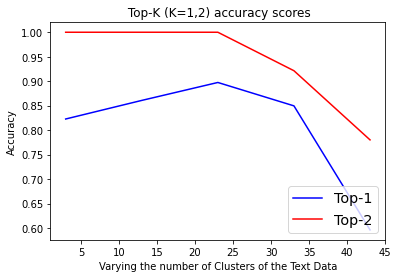

<Figure size 432x288 with 0 Axes>

In [ ]:
#Tag Clustering using Agglomerative and K-medoids Clustering  (clustering texts in data)
import sys
import matplotlib.pyplot as plt
from numpy.ma.core import mean
from sentence_transformers import SentenceTransformer
from sklearn.cluster import KMeans
import sys
from sentence_transformers import SentenceTransformer
from sklearn.cluster import AgglomerativeClustering
import numpy as np
from sentence_transformers import SentenceTransformer
from sklearn.cluster import KMeans
from sentence_transformers import SentenceTransformer
from sklearn.cluster import AgglomerativeClustering
import numpy as np
import operator
from sklearn.metrics.pairwise import cosine_similarity,cosine_distances
import sys
from scipy import spatial
from sklearn_extra.cluster import KMedoids
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity,cosine_distances
import math
import sys
import random
import operator
from sentence_transformers import SentenceTransformer
from sklearn.cluster import KMeans
from sentence_transformers import SentenceTransformer
from sklearn.cluster import AgglomerativeClustering
import numpy as np
from sentence_transformers import SentenceTransformer
from sklearn.cluster import KMeans
from sentence_transformers import SentenceTransformer
from sklearn.cluster import AgglomerativeClustering
import numpy as np
from scipy import spatial



def labe_cl(n):
            #Unique Tag list
            embedder = SentenceTransformer('all-MiniLM-L12-v2')
            tagu=[]
            tagu1=[]
            stt=[]
            sent=[]
            relation_sent=[]
            for  sz in rttext_tag3:
                    s=''
                    gh=[]
                    for vb in rttext_tag3[sz]:
                        #if vb not in stt:
                            # s=str(vb)+" "+sz
                            #if vb not in tagu1:
                                #gh.append(vb)
                                #tagu1.append(vb)
                            #gh.append(sz)
                            s=s+str(vb)+" "+str(sz)+" "
                            relation_sent.append(s)
                            if vb not in gh:
                                    gh.append(vb)
                            if vb not in stt:
                                    stt.append(vb)
                            vb1=sz.split()
                            for zx in vb1:
                                    if zx not in gh:
                                        gh.append(zx)
                            sent.append(gh)
                            
            ds=set(stt)
            for kk in ds:
                tagu.append(kk)
           # print(len(tagu))
            for tt in tagu:
                pass

            corpus =tagu#tagss# tagu
            crp_txt={}
            corpus_embeddings = embedder.encode(corpus)
            for sentence, embedding in zip(tagu, corpus_embeddings):
                lst=embedding.tolist()
                crp_txt[sentence]=lst
            vectorizer = TfidfVectorizer()
            X = vectorizer.fit_transform(corpus)

            num_clusters=5 #{‘random’, ‘heuristic’, ‘k-medoids++’, ‘build’
            kmedoids = KMedoids(n_clusters=5,metric='cosine', method='alternate',init='k-medoids++', max_iter=500000, random_state=1).fit(X)
            cluster_assignment,cn=kmedoids.labels_,kmedoids.cluster_centers_

            clustered_sentences = {}
            clustered_sentences1 = {}
            for sentence_id, cluster_id in enumerate(cluster_assignment):
                if cluster_id not in clustered_sentences:
                    clustered_sentences[cluster_id] = []
                    clustered_sentences1[cluster_id] = []
                if corpus[sentence_id] in tagu:
                        clustered_sentences[cluster_id].append(corpus[sentence_id])
                if len(vectorizer.inverse_transform(cn[cluster_id])[0])==2:
                    gh=str(vectorizer.inverse_transform(cn[cluster_id])[0][0])+"-"+str(vectorizer.inverse_transform(cn[cluster_id])[0][1])
                
                    if gh not in clustered_sentences1[cluster_id]:
                        clustered_sentences1[cluster_id].append(gh)
                    
                if len(vectorizer.inverse_transform(cn[cluster_id])[0])==1:
                    for vv in vectorizer.inverse_transform(cn[cluster_id])[0]:
                        if vv not in clustered_sentences1[cluster_id]:
                                clustered_sentences1[cluster_id].append(vv)
                    
            final_clut1=clustered_sentences


            final_cluh={}
            for kk in final_clut1:
                    final_cluh[kk]=clustered_sentences1[kk]
            '''
            final_cluh={}
            for kk in final_clut1:
                gh=[]
                if len(final_clut1[kk])%2==0:
                        pp=len(final_clut1[kk])//2
                        #gh.append(final_clut1[kk][pp-1])
                        gh.append(final_clut1[kk][pp])
                        final_cluh[kk]=gh         
                elif len(final_clut1[kk])%2!=0:
                        pp=len(final_clut1[kk])//2
                        gh.append(final_clut1[kk][pp])
                        final_cluh[kk]=gh

            '''
            for t in final_clut1:
               pass# print(final_cluh[t])
            #Re-assigning the labels 

            embedder = SentenceTransformer('all-MiniLM-L12-v2')


            #final_cluh={}
            rttext_tagh1={}
            rttext_tagh={}
            cc=0
            mptxt={}
            rttag={}
            allid=[]
            truhh=[]
            vbb=[]

            from sklearn.metrics.pairwise import cosine_similarity,cosine_distances
            import numpy as np
            for kk in final_clut1:
                for vz in rttext_tag3:
                    ggh=[]
                    ggh0=[]
                    ggh1=[]
                    ggh11=[]
                    ggh111=[]
                    c=0
                    #corpus_embeddings = embedder.encode(vz)
                    for zx in rttext_tag3[vz]:
                        if zx in final_clut1[kk]:
                            for vb3 in final_cluh[kk]:
                                #if vb3 in sametopic_rl:
                                    #if vz in sametopic_rl[vb3]:
                                            if vb3 not in ggh:
                                                ggh.append(vb3)
                                    #else:
                                        #continue
                            if len(ggh)>0:
                                rttext_tagh1[vz]=ggh
                            break
                        else:
                            continue
                    

            jj=[]
            for vv in rttext_tagh1:
                for jk in rttext_tagh1[vv]:
                    if jk not in jj:
                        jj.append(jk)
            #print(len(jj),len(rttext_tagh1))
            # Clustering the text with pre-processed labels
            snt=[]
            rttext_tagh={}


            truhh=[]
            for jj in rttext_tagh1:
                snt.append(jj)



            embedder = SentenceTransformer('all-MiniLM-L12-v2')#('all-distilroberta-v1')#('all-MiniLM-L12-v2')#('all-distilroberta-v1')#('all-MiniLM-L12-v2')
            # Corpus with example sentences
            corpus = snt
            corpus_embeddings = embedder.encode(corpus)

            #num_clusters = 10

            # Normalize the embeddings to unit length
            corpus_embeddings = corpus_embeddings /  np.linalg.norm(corpus_embeddings, axis=1, keepdims=True)

            # Perform Agglomerative clustering
            clustering_model = AgglomerativeClustering(n_clusters=None,distance_threshold=n) #, affinity='cosine', linkage='average', distance_threshold=0.4)
            clustering_model.fit(corpus_embeddings)
            cluster_assignment,dis = clustering_model.labels_,clustering_model.distances_
            #print(dis)
            clustered_sentences = {}
            for sentence_id, cluster_id in enumerate(cluster_assignment):
                if cluster_id not in clustered_sentences:
                    clustered_sentences[cluster_id] = []

                clustered_sentences[cluster_id].append(corpus[sentence_id])
            final_clut11={}

            for i, cluster in clustered_sentences.items():
                cls=[]
                vc=0
                #f len(cluster)>=10:
                for kk in cluster:
                 if vc<100:
                    if kk not in cls:
                        cls.append(kk)
                        vc=vc+1
                final_clut11[i]=cls
                #print(cluster[0])

                #print("Cluster ", i+1)
                #print(cluster)
                #print("")
            cln=0
            final_clut2={}

            for tt in final_clut11:  
                    if len(final_clut11[tt])>=6:
                    
                            final_clut2[cln]=final_clut11[tt]
                            cln=cln+1
                        # vc=vc+1
            print(len(final_clut2))
            return final_clut2,rttext_tagh1


#Clusteredtext with pre-processed labels
import random   
def lb_txt_cl(final_clut2,rttext_tagh1):
            test={}
            def tagcls_only_cls():
                            rttext_tagh={}     
                            truhh=[]  
                            #tt=random.randint(0,len(final_clut2)-1)

                            for vv in final_clut2[tt11]:
                                                if vv not in rttext_tagh:
                                                    rttext_tagh[vv]=rttext_tagh1[vv]
                            tr=[]
                            for tt in rttext_tagh:
                                #print(rttext_tagh[tt][0])
                                if rttext_tagh[tt][0] not in tr:
                                    tr.append(rttext_tagh[tt][0])
                            s=set(tr)
                            for bb in s:
                                truhh.append(bb)
                            print("Cluster: "+str(tt11))
                            print(len(truhh),len(rttext_tagh))

                            #Accuracy Computation

                            #multi tag

                            from transformers import AutoModelForSequenceClassification, AutoTokenizer
                            import numpy as np
                            import operator
                            import matplotlib.pyplot as plt
                            from transformers import pipeline
                            from pylab import rcParams
                            import sys 
                            import nltk
                            import re
                            import operator
                            #from transformers_interpret import ZeroShotClassificationExplainer
                            zero_shot_classifier = pipeline("zero-shot-classification")#,model='roberta-large-mnli')#model='facebook/bart-large-mnli')#,model='Recognai/zeroshot_selectra_medium')#,model='facebook/bart-large-mnli')
                            #tokenizer = AutoTokenizer.from_pretrained("Recognai/zeroshot_selectra_medium")#("facebook/bart-base-mnli")#("Recognai/zeroshot_selectra_medium")
                            #model = AutoModelForSequenceClassification.from_pretrained("Recognai/zeroshot_selectra_medium")#("facebook/bart-base-mnli")#("Recognai/zeroshot_selectra_medium")
                            #zero_shot_explainer = ZeroShotClassificationExplainer(model, tokenizer)
                            cn=0
                            txt_lbp={}
                            ocl_di={}
                            pred_l={}
                            ocl_dia={}
                            pred_lnk={}
                            ocl_dnk={}
                            pred_tk={}
                            ocl_tk={}
                            all_txt_label_score={}
                            all_txt_label_rank={}

                            # Zero-shot Classification
                            def review_explain(text):
                                    result = zero_shot_classifier(sequences =text,candidate_labels =truhh ,multi_label=True)
                                    
                                    return result['labels'],result['scores']

                            for tt in rttext_tagh:
                                mpd={}
                                nlb=[]
                                mpd_nk={}
                                mpd_tk={}
                                nlb_tk=[]
                                nlb_nk=[]
                                rn={}
                                rsc={}
                                clas,score= review_explain(tt)
                            
                                for bb in range(0,len(clas)):
                                    rsc[clas[bb]]=score[bb]
                                for bb in range(0,len(clas)):
                                    rn[clas[bb]]=bb+1
                                all_txt_label_score[tt]=rsc
                                all_txt_label_rank[tt]=rn
                                for k1 in rttext_tagh[tt]:
                                        for t3 in range(0,len(clas)):
                                            if str(clas[t3])==str(k1):
                                                mpd[k1]=score[t3]
                                for k1 in rttext_tagh[tt]:
                                        for t3 in range(0,len(clas)):
                                            if str(clas[t3])!=str(k1):
                                                if score[t3]>0.5:
                                                    mpd_nk[k1]=score[t3]
                                for k1 in rttext_tagh[tt]:
                                        for t3 in range(0,len(clas)):
                                            if str(clas[t3])==str(k1):
                                                if score[t3]>0.5:
                                                    mpd_tk[k1]=score[t3]
                                
                                dd=sorted(mpd.items(), key=operator.itemgetter(1),reverse=True)
                                dd1=sorted(mpd_nk.items(), key=operator.itemgetter(1),reverse=True)
                                dd2=sorted(mpd_tk.items(), key=operator.itemgetter(1),reverse=True)
                                
                                for zz in dd:
                                    nlb.append(zz[0])
                                for zz1 in dd1:
                                    nlb_nk.append(zz1[0])
                                for zz2 in dd2:
                                    nlb_tk.append(zz2[0])
                                
                                pred_lnk[tt]=nlb_nk #ranked list of the non-original labels has pribability greater than 50%
                                pred_tk[tt]=nlb_tk#ranked list of the original labels has pribability greater than and equal 90% and appear in top N labels
                                ocl_di[tt]=nlb[0:1]#single label with the highest score of the original label
                                ocl_dia[tt]=nlb#ranked list of the original label
                                

                                txt_lbp[tt]=clas[0:10]
                                pred_l[tt]=clas
                                #test[tt11]=

                            '''
                            Comparing average rank of the predicted original labels with that of it ideal rank positon
                            Coounting the number of non-original labels that have higher probability scores than that of original labels per text

                            '''
                            # average rank
                            ccc=0
                            KK=3 # number of top predicted non-original labels

                            per_txt_ori_rank_cmp={}
                            per_txt_ori_score_avg={}
                            per_txt_nonori_rank_cmp={}
                            per_txt_nonori_pred_rank_avg={}
                            per_txt_nonori_ori_rank_avg={}
                            per_txt_nonori_score_avg={}
                            per_txt_ori_pred_rank_avg={}
                            per_txt_ori_ori_rank_avg={}
                            per_txt_nonori_top_n={}


                            for v in all_txt_label_score:
                            #if v in rttext_tagh:
                                orn=(len(rttext_tagh[v])+1)/2 # Ideal average rank position
                                s=0
                                sc=0
                                cz=0
                                nr=[]
                                sno=0
                                snosc=0
                                for kz in all_txt_label_rank[v]:
                                    if kz not in rttext_tagh[v]:
                                        if cz<KK:
                                                if kz not in nr:
                                                        nr.append(kz)
                                                        #print(kz,rttext_tagu[v],all_txt_label_rank[v][kz],all_txt_label_score[v][kz])
                                                        sno=sno+float(all_txt_label_rank[v][kz])
                                                        snosc=snosc+float(all_txt_label_score[v][kz])
                                                        cz=cz+1
                                #print("\n")
                                per_txt_nonori_top_n[v]=nr
                                per_txt_nonori_rank_cmp[v]=sno/KK
                                per_txt_nonori_score_avg[v]=snosc/KK

                                for kz in all_txt_label_rank[v]:
                                    if kz in rttext_tagh[v]:
                                        s=s+float(all_txt_label_rank[v][kz])
                                        sc=sc+float(all_txt_label_score[v][kz])
                            
                                prn=s/len(rttext_tagh[v])
                                per_txt_ori_score_avg[v]=sc/len(rttext_tagh[v])
                                per_txt_ori_pred_rank_avg[v]=prn
                                per_txt_ori_ori_rank_avg[v]=orn
                                #print(prn,orn)
                                dif=abs(prn-orn)
                                per_txt_ori_rank_cmp[v]=dif
                                if dif<=0.0:
                                    ccc=ccc+1
                            print("Number of texts where the position of the original labels preserved after prediction")
                            print(ccc,len(txt_lbp))
                            print("Percentage of texts where the position of the original labels preserved after prediction")
                            print(ccc/len(txt_lbp))


                            # average scores

                            vvv=0
                            for jj in per_txt_ori_score_avg:
                                if per_txt_nonori_score_avg[jj]>per_txt_ori_score_avg[jj]:
                                            vvv=vvv+1

                            print("Number of non-original labels have higher prediction acores than original labels after prediction")
                            nmmm=vvv     
                            print(vvv)
                            #if tt11==1:
                            # for kk in txt_lbp:
                                #  pass#print(kk,txt_lbp[kk],rttext_tagh[kk])

                            '''
                            Accuracy for the clustered labels
                            '''
                            correct_txt_true_pred=[]
                            def topps(n):
                                            cc=0
                                            vb1=0
                                            for tt in txt_lbp:
                                                    #if vb1 < 1000:
                                                            #vb1=vb1+1 
                                                            try:
                                                                for vb in txt_lbp[tt][0:n]:
                                                                        #print(rttext_tagh[tt][0],vb)
                                                                        if vb in rttext_tagh[tt][0:n]:
                                                                        #if str(vb) ==str(rttext_tagh[tt][0]):
                                                                            cc=cc+1
                                                                            if tt not in correct_txt_true_pred:
                                                                                        correct_txt_true_pred.append(tt)
                                                                            break
                                                                        else:
                                                                            continue

                                                            except:
                                                                continue
                                                            
                                            #txt_lbp
                                            print("Top_"+str(n)+ " Prediction Score: ")
                                            print(cc/len(txt_lbp))
                                            ac=cc/len(txt_lbp)
                                            return ac
                            top=3
                            scc=[]
                            for zz in range(1,top+1):
                                ac=topps(zz)
                                scc.append(ac)
                            return nmmm,scc,per_txt_nonori_score_avg,per_txt_ori_score_avg,correct_txt_true_pred,per_txt_ori_pred_rank_avg,per_txt_ori_ori_rank_avg
                                
                                

            rand_acc={}
            rand_pscr_nonlb={}
            rand_pscr_orlb={}
            rand_predi_rank_orlb={}
            rand_ori_rank_orlb={}
            correct_txt_true_p={}
            count_percl_hosctxt={}
            count_percl_txt={}
            for tt11 in  final_clut2:
                nmmm,scc,per_txt_nonori_score_avg,per_txt_ori_score_avg,correct_txt_true_pred,per_txt_ori_pred_rank_avg,per_txt_ori_ori_rank_avg=tagcls_only_cls()
                rand_acc[tt11]=scc
                rand_pscr_nonlb[tt11]=per_txt_nonori_score_avg
                rand_pscr_orlb[tt11]=per_txt_ori_score_avg
                correct_txt_true_p[tt11]=correct_txt_true_pred
                rand_predi_rank_orlb[tt11]=per_txt_ori_pred_rank_avg
                rand_ori_rank_orlb[tt11]=per_txt_ori_ori_rank_avg
                count_percl_hosctxt[tt11]=nmmm
                count_percl_txt[tt11]=len(final_clut2[tt11])
                print("\n\n")
            return rand_acc,rand_pscr_nonlb,rand_pscr_orlb,rand_predi_rank_orlb,rand_ori_rank_orlb,count_percl_hosctxt,count_percl_txt









s0=[]
b0=[]
noc0=[]
oc0=[]
clsize=[]
for j in range(8,3,-1):
      print("cluster "+str(j)+"\n")
      final_clut2,rttext_tagh1=labe_cl(j)
      rand_acc,rand_pscr_nonlb,rand_pscr_orlb,rand_predi_rank_orlb,rand_ori_rank_orlb,count_percl_hosctxt,count_percl_txt=lb_txt_cl(final_clut2,rttext_tagh1)
      vr_t1=[]
      vr_t2=[]
      vr_t3=[]
      for kk in rand_acc:
            vr_t1.append(rand_acc[kk][0])
            vr_t2.append(rand_acc[kk][1])
            vr_t3.append(rand_acc[kk][2])
      non=[]
      for vv in rand_pscr_nonlb:
          s1=0
          for kk in rand_pscr_nonlb[vv]:
              #s1=0
              #for tx in rand_pscr_nonlb[vv][kk]:
              s1=s1+rand_pscr_nonlb[vv][kk]
          sv=s1/len(rand_pscr_nonlb[vv])
          non.append(sv)
      sv1=mean(non)
      noc0.append(sv1)
      on=[]
      for vv in rand_pscr_orlb:
          s5=0
          for kk in rand_pscr_orlb[vv]:
              #s11=0
              #for tx in rand_pscr_orlb[vv][kk]:
                  s5=s5+rand_pscr_orlb[vv][kk]
          sv2=s5/len(rand_pscr_orlb[vv])
          on.append(sv2)
      sv3=mean(on)
      oc0.append(sv3)


      vb1=mean(vr_t1)
      s0.append(vb1)
      vb2=mean(vr_t2)
      b0.append(vb2)
      clsize.append(len(final_clut2))
        

# Drawing Varying the cluster of the texts  keeping the clusters of class labels fixed to 5


'''
Accuracy
'''


#Geb_b30 = nri#[11, 10, 12, 14, 16, 19, 17, 14, 18, 17]
#years_b30 = range(0,len(nri))
#Geb_a30 = ori#[12, 10, 13, 14, 12, 13, 18, 16,0,0]
#years_a30 = range(0,len(ori))
#print(len(vr_t1))
years_a31 = range(3,45,10)

fig, ax = plt.subplots()
ax.plot(years_a31, s0, label='Top-1', color='blue')
ax.plot(years_a31,b0, label='Top-2', color = 'red')
#ax.plot(years_a31,vr_t3, label='Top-3', color = 'green')
legend = ax.legend(loc='lower right', fontsize='x-large')
plt.xlabel('Varying the number of Clusters of the Text Data')
plt.ylabel('Accuracy')
plt.title(' Top-K (K=1,2) accuracy scores')
plt.show()
plt.savefig("Variation_cluster_labels.pdf")







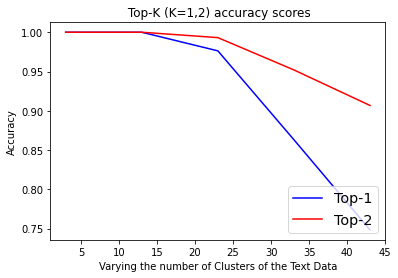

<Figure size 432x288 with 0 Axes>

In [ ]:
years_a31 = range(3,45,10)

fig, ax = plt.subplots()
ax.plot(years_a31, s0, label='Top-1', color='blue')
ax.plot(years_a31,b0, label='Top-2', color = 'red')
#ax.plot(years_a31,vr_t3, label='Top-3', color = 'green')
legend = ax.legend(loc='lower right', fontsize='x-large')
plt.xlabel('Varying the number of Clusters of the Text Data')
plt.ylabel('Accuracy')
plt.title(' Top-K (K=1,2) accuracy scores')
plt.show()
plt.savefig("Variation_cluster_labels.pdf")


In [ ]:
#Before Cluster
import statistics
t1=[0.37, 0.52, 0.46, 0.51, 0.27, 0.44, 0.4, 0.36, 0.39, 0.38]
t2=[0.46, 0.62, 0.58, 0.6, 0.41, 0.58, 0.56, 0.5, 0.53, 0.49]
t3=[0.57, 0.71, 0.62, 0.68, 0.55, 0.67, 0.64, 0.6, 0.63, 0.65]
print(statistics.mean(t1))
print(statistics.mean(t2))
#print(statistics.mean(t3))

mm=(statistics.mean(t1)+statistics.mean(t2)+statistics.mean(t3))/3.0
#print(mm)

rt1=[0.21491020917892456, 0.38946402072906494, 0.44452662269274396, 0.37992316484451294, 0.007512751268222928, 0.11786925699561834, 0.07246450272699197, 0.11524473611886303, 0.23028473556041718, 0.11055991053581238, 0.49605123202006024, 0.243117179411153, 0.5377172629038492, 0.3653033673763275, 0.5045728931824366, 0.1367266612748305, 0.8763640920321146, 0.012622965538563827, 0.11496083810925484, 0.445539911588033, 0.22809302310148874, 0.013490105979144573, 0.10814340164264043, 0.22137570629517236, 0.341701219479243, 0.016261936553443473, 0.4183301329612732, 0.6452850103378296, 0.3812853544950485, 0.24731979767481485, 0.4503905574480693, 0.0003155793043940018, 0.2472795695066452, 0.510092576344808, 0.4182273745536804, 0.09179491301377614, 0.19648592919111252, 0.3011133074760437, 0.001424918242264539, 0.055397448518003024, 0.007269236259162426, 0.4728938142458598, 0.16486858576536179, 0.032318319814900555, 0.10415183007717133, 0.2386182894309362, 0.7846844792366028, 0.15259367848436037, 0.35066652297973633, 0.11300497502088547, 0.2827206136037906, 0.5922438005606333, 0.20813052356243134, 0.0014025451770673196, 0.3817777633666992, 0.09583628177642822, 0.25515848646561307, 0.0007676063493515054, 0.002408507435272137, 0.13081897050142288, 0.357490470012029, 0.4718608061472575, 0.03284292093788584, 0.07402996843059857, 0.10900659176210563, 0.000689615165659537, 0.5809845427672068, 0.37419358392556507, 0.3038742045561473, 0.11247124491880338, 0.11176827146361272, 0.1988338828086853, 0.38965405027071637, 0.44984416166941327, 0.7469007968902588, 0.3466273695230484, 0.11299004902442296, 0.4913947582244873, 0.024355047692855198, 0.6561469038327535, 0.15133784338831902, 0.3849714050690333, 0.49574925502141315, 0.2929747651020686, 0.26475462317466736, 0.02889134657258789, 0.01504362653940916, 0.04796365570897857, 0.32442912459373474, 0.003967634751461446, 0.23374215761820474, 0.40517640113830566, 0.3192748924096425, 0.4378526707490285, 0.08451221138238907, 0.03738397421936194, 0.0026715846421817937, 0.0862114851673444, 0.26231083273887634, 0.38493724664052326]
rt2=[0.9241938591003418, 0.7367197275161743, 0.21639913320541382, 0.3195682764053345, 0.038738805800676346, 0.9552150964736938, 0.9197854995727539, 0.17160028219223022, 0.08036279678344727, 0.8767749071121216, 0.6057561039924622, 0.9181716442108154, 0.7930189967155457, 0.7571248412132263, 0.3231652081012726, 0.023924579843878746, 0.06353949755430222, 0.06403729319572449, 0.6256919503211975, 0.04529276862740517, 0.20169003307819366, 0.003975301515311003, 0.9618076086044312, 0.9204502105712891, 0.10041476786136627, 0.08137097954750061, 0.21201156079769135, 0.3264712989330292, 0.5588770508766174, 0.8744772672653198, 0.6136395931243896, 0.9956649541854858, 0.2943129241466522, 0.43794330954551697, 0.019115328788757324, 0.8992026448249817, 0.7581858038902283, 0.6614176630973816, 0.0028422335162758827, 0.9890663623809814, 0.03523511067032814, 0.11623463779687881, 0.5585242509841919, 0.8681044578552246, 0.7528952956199646, 0.9002770781517029, 0.6224725842475891, 0.00040980096673592925, 0.9446305632591248, 0.5935901999473572, 0.0007988148718141019, 0.31017816066741943, 0.011013109236955643, 0.9423914551734924, 0.6271137595176697, 0.8537060022354126, 0.7434672713279724, 0.9972900748252869, 0.0001934265164891258, 0.0026546544395387173, 0.010629221796989441, 0.7138959765434265, 0.8669854998588562, 0.9424169063568115, 0.2580873966217041, 0.0002695077273529023, 0.9442596435546875, 0.3971192538738251, 0.19927562773227692, 0.7523756623268127, 0.005481052678078413, 0.13971105217933655, 0.6316596865653992, 0.7355905771255493, 0.18567216396331787, 0.4699362516403198, 0.01851232349872589, 0.47659048438072205, 0.003904041601344943, 0.47878167033195496, 0.39481210708618164, 0.6853355169296265, 0.44132161140441895, 0.377511590719223, 0.01781119778752327, 0.8748887181282043, 0.001657834043726325, 0.9654383063316345, 0.06612971425056458, 0.001493797404691577, 0.03805963322520256, 0.2311369925737381, 0.3613589107990265, 0.38177862763404846, 0.38547566533088684, 6.755351205356419e-05, 0.00013896975724492222, 0.9802578687667847, 0.4568617641925812, 0.2216285914182663]
print(statistics.mean(rt1))
print(statistics.mean(rt2))

0.41000000000000003
0.533
0.2529199498297142
0.44367517844453686


In [ ]:
#After Cluster

print(statistics.mean(s0))
print(statistics.mean(b0))
print(statistics.mean(noc0))
print(statistics.mean(oc0))

0.883366359525713
0.9566481385989318
0.03529414771221974
0.3082768405994928


In [ ]:
len(noc0)

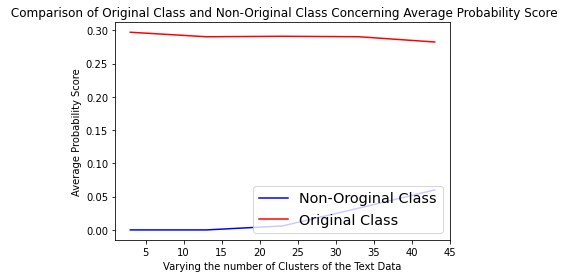

<Figure size 432x288 with 0 Axes>

In [ ]:
# Average score of non-original and original  varying cluster of texts

years_a31 = range(3,45,10)

fig, ax = plt.subplots()
ax.plot(years_a31,noc0, label='Non-Oroginal Class', color='blue')
ax.plot(years_a31,oc0, label='Original Class', color = 'red')
#ax.plot(years_a31,vr_t3, label='Top-3', color = 'green')
legend = ax.legend(loc='lower right', fontsize='x-large')
plt.xlabel('Varying the number of Clusters of the Text Data')
plt.ylabel('Average Probability Score')
plt.title(' Comparison of Original Class and Non-Original Class Concerning Average Probability Score')
plt.show()
plt.savefig("Variation_cluster_labels_probability score.pdf")

In [ ]:
print(noc0)
print(oc0)
#varying the cluster of texts for zero shot top1,2 accuracy
top1=[1.0, 1.0, 0.9763157894736842, 0.8631428571428572, 0.7483609258641104]
yp2=[1.0, 1.0, 0.9931578947368421, 0.9519999999999998, 0.9067872552889393]

#varying cluster of texts for zero probsability score
noc[0.0, 0.0, 0.005950407744758037, 0.03269647543682679, 0.06013910709756284]
oc[0.2971572327967905, 0.29038034204944324, 0.2910788445502227, 0.2904225259417747, 0.2824884464660927]

[0.0, 0.0, 0.005950407744758037, 0.03269647543682679, 0.06013910709756284]
[0.2971572327967905, 0.29038034204944324, 0.2910788445502227, 0.2904225259417747, 0.2824884464660927]


# Varying the number of clusters for Texts results

In [ ]:
# Varying the number of clusters for Texts

print("Top 1")
print(s0)
print("Top 2")
print(b0)
print("Probability Scores of thw non-original labels")
print(noc0)
print("Probability Scores of thw original labels")
print(oc0)

[0.8227272727272728, 0.8607142857142858, 0.8973684210526316, 0.8495782312925169, 0.5961003867326673]
[1.0, 1.0, 1.0, 0.921374149659864, 0.780053042905409]
[0.016420329325999114, 0.012901687327570731, 0.009506506451894223, 0.031423581692636746, 0.08255579547532998]
[0.171485830981887, 0.16975806183645803, 0.18083705192564303, 0.1907123141631589, 0.19990203437641127]
